In [795]:
### DISCOVERED AN ERROR IN SCB'S AGE GRP PREL DATA (TABELL 2) , VERIFIED FOR 2015, PROBABLY SAME UP INC 2019 ###
### 90+ AGE GRP CONTAINS TOO FEW (22167) DEATHS. FETCHING THE DATA FROM THE OFFICIAL DATABASE - ###
### GIVES 24083 ###

#### EXPLANATION OF THE DIFFERENCE IS THAT THE PREL.DATA IS AGE REACHED AT TIME OF DEATH ####
#### WHILE THE OFFICIAL DATA I USED INITIALLY IS AGE AT END-OF-YEAR ####
#### REPLACING THE URL TO OFFICIAL DATA TO POINT AT A PAGE WHERE DEATHS ARE COUNTED AS FOR THE PREL.DATA ####
#### REMOVES THE DIFFERENCE ! ####

### ALL CODE BELOW PREFIXED BY 'BUG' IS DUE TO THIS PROBLEM ###

In [796]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import requests

sns.set()

In [797]:
# define parameters for SCB's JSON API for population data #
# don't forget to change the default 'px' response format to 'json' bottom of the pop_query data struct # 

pop_url = 'http://api.scb.se/OV0104/v1/doris/en/ssd/START/BE/BE0101/BE0101A/FolkmangdNov'

pop_query = {
  "query": [
    {
      "code": "Region",
      "selection": {
        "filter": "vs:RegionRiket99",
        "values": [
          "00"
        ]
      }
    },
    {
      "code": "Alder",
      "selection": {
        "filter": "vs:Ålder1årA",
        "values": [
          "0",
          "1",
          "2",
          "3",
          "4",
          "5",
          "6",
          "7",
          "8",
          "9",
          "10",
          "11",
          "12",
          "13",
          "14",
          "15",
          "16",
          "17",
          "18",
          "19",
          "20",
          "21",
          "22",
          "23",
          "24",
          "25",
          "26",
          "27",
          "28",
          "29",
          "30",
          "31",
          "32",
          "33",
          "34",
          "35",
          "36",
          "37",
          "38",
          "39",
          "40",
          "41",
          "42",
          "43",
          "44",
          "45",
          "46",
          "47",
          "48",
          "49",
          "50",
          "51",
          "52",
          "53",
          "54",
          "55",
          "56",
          "57",
          "58",
          "59",
          "60",
          "61",
          "62",
          "63",
          "64",
          "65",
          "66",
          "67",
          "68",
          "69",
          "70",
          "71",
          "72",
          "73",
          "74",
          "75",
          "76",
          "77",
          "78",
          "79",
          "80",
          "81",
          "82",
          "83",
          "84",
          "85",
          "86",
          "87",
          "88",
          "89",
          "90",
          "91",
          "92",
          "93",
          "94",
          "95",
          "96",
          "97",
          "98",
          "99",
          "100+"
        ]
      }
    },
    {
      "code": "Kon",
      "selection": {
        "filter": "item",
        "values": [
          "1",
          "2"
        ]
      }
    }
  ],
  "response": {
    "format": "json"
  }
}

In [798]:
# define parameters for SCB's JSON API for death data #
# don't forget to change the default 'px' response format to 'json' bottom of the dead_query data struct #

# DEAD AT AGE BY END OF YEAR #
#dead_url = 'http://api.scb.se/OV0104/v1/doris/en/ssd/START/BE/BE0101/BE0101I/DodaFodelsearK'

# DEAD AT AGE REACHED AT TIME OF DEATH #
dead_url = 'http://api.scb.se/OV0104/v1/doris/sv/ssd/START/BE/BE0101/BE0101I/DodaHandelseK'

dead_query = {
  "query": [
    {
      "code": "Region",
      "selection": {
        "filter": "vs:RegionRiket99",
        "values": [
          "00"
        ]
      }
    },
    {
      "code": "Alder",
      "selection": {
        "filter": "vs:Ålder1årA",
        "values": [
          "0",
          "1",
          "2",
          "3",
          "4",
          "5",
          "6",
          "7",
          "8",
          "9",
          "10",
          "11",
          "12",
          "13",
          "14",
          "15",
          "16",
          "17",
          "18",
          "19",
          "20",
          "21",
          "22",
          "23",
          "24",
          "25",
          "26",
          "27",
          "28",
          "29",
          "30",
          "31",
          "32",
          "33",
          "34",
          "35",
          "36",
          "37",
          "38",
          "39",
          "40",
          "41",
          "42",
          "43",
          "44",
          "45",
          "46",
          "47",
          "48",
          "49",
          "50",
          "51",
          "52",
          "53",
          "54",
          "55",
          "56",
          "57",
          "58",
          "59",
          "60",
          "61",
          "62",
          "63",
          "64",
          "65",
          "66",
          "67",
          "68",
          "69",
          "70",
          "71",
          "72",
          "73",
          "74",
          "75",
          "76",
          "77",
          "78",
          "79",
          "80",
          "81",
          "82",
          "83",
          "84",
          "85",
          "86",
          "87",
          "88",
          "89",
          "90",
          "91",
          "92",
          "93",
          "94",
          "95",
          "96",
          "97",
          "98",
          "99",
          "100+"
        ]
      }
    },
    {
      "code": "Kon",
      "selection": {
        "filter": "item",
        "values": [
          "1",
          "2"
        ]
      }
    },
    {
      "code": "Tid",
      "selection": {
        "filter": "item",
        "values": [
          "2002",
          "2003",
          "2004",
          "2005",
          "2006",
          "2007",
          "2008",
          "2009",
          "2010",
          "2011",
          "2012",
          "2013",
          "2014",
          "2015",
          "2016",
          "2017",
          "2018",
          "2019",
          "2020"
        ]
      }
    }
  ],
  "response": {
    "format": "json"
  }
}

In [799]:
### function to fetch SCB population or death data, returns 3 DataFrames w. different age binnings ### 

def fetch_scb_data(url,query,param='pop'):
    
    # call the API, check HTML status code (should be 200 for success) #

    r= requests.post(url,json=query)
    print ('HTML status code fetching {}: '.format(param),r.status_code)
    
    # extract the json data section from the response #

    json_data = r.json()['data'] # get the data section (skip metadata) #

    # we get two dictionaries : 'key' and 'values' #
    # 'key' attributes are : 'geo' (all of sweden), 'age','gender','year' #
    # 'values' attribute is : 'population' / 'dead' #
    
    # check the first record to figure out the structure of the data #
    print ('record layout for {}: '.format(param),json_data[0])
    
    # create a Pandas DataFrame from the list of dictionaries, and massage it to a decent structure #

    age_df = pd.DataFrame.from_dict(json_data)
    age_df[['area','age','gender','year']] = age_df['key'].to_list() # split keys to separate columns #

    age_df[param] = age_df['values'].apply(
        lambda x : x[0]).astype(int) # extract size from the values list #

    age_df['num_age'] = age_df['age'].apply(
        lambda x :x.replace('+','')).astype(int) # create numeric age column #

    age_df = age_df.drop(['key','values','area'],axis=1) # delete unwanted columns #

    # combine the two genders #
    age_df = age_df.groupby(['year','num_age']).sum()

    # bin the data to the same age bins that are used in SCB's prel. death data #
    age_df['scb_prel_age_bin'] = pd.cut(age_df.index.get_level_values(1),[-1,64,79,89,200],
                                        labels=['-64','65-79','80-89','90+'])
    
    # and finally, for each year, combine the 1 year age bin sums to match the 4 age bins of the prel death data #

    age_scb_prel_df = age_df.groupby([age_df.index.get_level_values(0),
                                                      'scb_prel_age_bin']).sum()
    
    # create a df with total yearly values #
    df = age_scb_prel_df.groupby('year').sum()
    
    
    

    return age_df,age_scb_prel_df,df
    

In [800]:
### get the population & death data from SCB ###
pop_age_df,pop_age_scb_prel_df,pop_df = fetch_scb_data(pop_url,pop_query,param='pop')
dead_age_df,dead_age_scb_prel_df,dead_df = fetch_scb_data(dead_url,dead_query,param='dead')
print (pop_age_df.head())
print (pop_age_scb_prel_df.head())
print(pop_df.head())

ConnectionError: HTTPConnectionPool(host='api.scb.se', port=80): Max retries exceeded with url: /OV0104/v1/doris/en/ssd/START/BE/BE0101/BE0101A/FolkmangdNov (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x7f226b58da90>: Failed to establish a new connection: [Errno -2] Name or service not known'))

In [ ]:
### combine the pop & death data to 3 separate, complete df's with: ###
### 1) 1 year age bins; 2) 4 age bins as with scb prel death data, 3) no age bins ###

one_year_binned = pd.DataFrame(pop_age_df['pop']).join(dead_age_df['dead'])
scb_prel_binned = pd.DataFrame(pop_age_scb_prel_df['pop']).join(dead_age_scb_prel_df['dead'])
no_bins = pd.DataFrame(pop_df['pop']).join(dead_df['dead'])


In [ ]:
one_year_binned

In [ ]:
scb_prel_binned

In [ ]:
### now we need to fetch the 2020 prel death data which do no yet reside in the scb database ###
'''
scb_prel_url = "https://www.scb.se/hitta-statistik/statistik-efter-amne/befolkning/'\
'befolkningens-sammansattning/befolkningsstatistik/pong/tabell-och-diagram/preliminar-statistik-over-doda/"

scb_prel_url = "https://scb.se/link/0fec627c501e476aacf7ae328c7a4a8b.aspx"

scb_prel_url = "https://www.scb.se/hitta-statistik/statistik-efter-amne/befolkning/befolkningens-sammansattning/befolkningsstatistik/pong/tabell-och-diagram/preliminar-statistik-over-doda-publicerad-2021-05-17/"
'''

scb_prel_url = "https://scb.se/hitta-statistik/statistik-efter-amne/befolkning/befolkningens-sammansattning/befolkningsstatistik/pong/tabell-och-diagram/preliminar-statistik-over-doda/"
scb_prel_file = pd.ExcelFile(scb_prel_url)

In [ ]:
# check the sheet names #
# Tabell 1 contains the daily, non age-binned data #

scb_prel_file.sheet_names

In [ ]:
last_reported_date = scb_prel_file.parse('Info',usecols=[15]).dropna()
last_reported_date

In [ ]:
# parse the prel daily death data #

scb_prel_daily = scb_prel_file.parse(sheet_name='Tabell 1',skiprows=6,usecols=range(10))

scb_prel_daily


In [ ]:
# get the deaths occurred on unknown days #
unknown_death_day = scb_prel_daily.iloc[-1,1:]

# remove the unknown deaths from the df and drop the DagMånad column #

scb_prel_daily = scb_prel_daily.iloc[:-1,1:]
scb_prel_daily

In [ ]:
# let's allocate the unknown deaths proportionally to the days of year #

daily_proportion_of_total_deaths = scb_prel_daily / scb_prel_daily.sum()
deaths_to_add = daily_proportion_of_total_deaths * unknown_death_day
scb_prel_daily += deaths_to_add
scb_prel_daily

In [ ]:
total_deaths = scb_prel_daily.sum()
total_deaths

In [ ]:
### let's add the prel 2020 daily death total to no_bins df ###
no_bins

### NO NEED - offical 2020 numbers now available ###
#no_bins.loc['2020','dead'] = total_deaths['2020']
#no_bins

In [ ]:
### get the age group binned prel death data ###
scb_prel_age = scb_prel_file.parse('Tabell 2',skiprows=7,usecols=[0,1,4,5,6,7,9,10,11,12])

scb_prel_age = scb_prel_age.loc[scb_prel_age['År'] == 2020]
scb_prel_age = scb_prel_age[::-1] # reverse order
scb_prel_age.drop(['År','DagMånad'],axis=1,inplace=True)

scb_prel_age


In [ ]:
### function to combine gender specific deaths per age group to age grp total ###

def combine_ages(col):
    
    class AgeError(Exception):
        pass
    
    if '0-64' in col:
        return '-64'
    if '65-79' in col:
        return '65-79'
    if '80-89' in col:
        return '80-89'
    if '90+' in col:
        return '90+'
    else:
        return AgeError('no such age group')
    

In [ ]:
### combine the two genders ###
scb_prel_age = scb_prel_age.groupby(combine_ages,axis=1).sum()
scb_prel_age

In [ ]:
unknown_2020_age_date = scb_prel_age.iloc[0] # get deaths with unknown date #
scb_prel_age = scb_prel_age.iloc[1:] # drop unknown dates from df #


In [ ]:
### add unknown deaths proportionally to the days ###
prop_deaths_per_day = scb_prel_age / scb_prel_age.sum()
add_ons = prop_deaths_per_day * unknown_2020_age_date
scb_prel_age += add_ons
scb_prel_age.sum().sum()

In [ ]:
### set datetime index ###
scb_prel_age.index = pd.date_range('2020-01-01','2020-12-31')
scb_prel_age

In [ ]:
### totals per age group ###
scb_age_2020_total = scb_prel_age.sum()
scb_age_2020_total

In [ ]:
### total totals for 2020 ###
scb_age_2020_total.sum()

In [ ]:
### now, let's add the 2020 prel death data to the age binned death dataframe from above ###

# first we need a multi-index for 2020 for the 4 age groups # 

idx = pd.MultiIndex.from_arrays([ ['2020'] * len (scb_prel_age.columns), scb_prel_age.columns ])

scb_age_2020_total.index = idx
scb_age_2020_total.name='dead'
scb_age_2020_total = pd.DataFrame(scb_age_2020_total)
scb_age_2020_total

In [ ]:
scb_prel_binned

In [ ]:
### and now let's add 2020 to the scb_prel_binned_df ###

### NO NEED - official numbers now available ###
#scb_prel_binned.at['2020','dead'] = scb_age_2020_total
scb_prel_binned

In [ ]:
### yearly totals calculated on the age binned data ###

scb_prel_binned.groupby('year').sum()

In [ ]:
### now, let's add age group based mortality ###
scb_prel_binned['mortality'] = scb_prel_binned['dead'] / scb_prel_binned['pop']
scb_prel_binned.loc['2015':]

In [ ]:
### let's define 2019 as our standard population, for age adjusted overall mortality ###
### and then add 'standardized deaths', that is, absolute deaths based on ACTUAL yearly mortality ###
### acting on the standard population. I.e we are computing the number absolute deaths given actual ###
### mortality but as if the population age group sizes had been equal to that of the std year (2019) ###

std_pop = scb_prel_binned.loc['2019','pop']

scb_prel_binned['std_deaths'] = scb_prel_binned['mortality'] * std_pop
scb_prel_binned

In [ ]:
### now, to compute age adj mortality, for each year we sum the age_group std_deaths ###
### and divide by total std_population ###

age_adj_mortality = scb_prel_binned.groupby('year').sum()['std_deaths'] / std_pop.sum()
age_adj_mortality

In [ ]:
title = 'SWEDEN Age Adj. Mortality (std.pop : 2019) 2002-2020\nDataSource : scb.se'
colors = ['b'] * len (age_adj_mortality)
colors[-1] = 'orange'

age_adj_mortality.plot(kind='bar',figsize=(18,12),color=colors,title=title)
plt.ylabel('age adjusted mortality')
_= plt.yticks(np.arange(0,0.012,0.0005))

plt.savefig('SCB_excess_age_adj_mortality.jpg',format='jpg')

In [ ]:
### lets compute non-age-adj mortality ###
no_bins['mortality'] = no_bins['dead'] / no_bins['pop']
no_bins.to_pickle('no_bins.pkl')
no_bins

In [ ]:
title = 'SWEDEN Mortality (deaths / capita) 2002-2020\nDataSource : scb.se'
colors = ['b'] * len (age_adj_mortality)
colors[-1] = 'orange'

no_bins.plot(y='mortality',kind='bar',figsize=(18,12),color=colors,title=title)
plt.ylabel('mortality')
_= plt.yticks(np.arange(0,0.011,0.0005))
plt.savefig('SCB_excess_mortality.jpg',format='jpg')

In [ ]:
### age adj Mortality baselines ###

age_adj_grp_mort_base_15_18 = scb_prel_binned.loc['2015':'2018','mortality'].groupby('scb_prel_age_bin').mean()
age_adj_grp_mort_base_15_19 = scb_prel_binned.loc['2015' :'2019','mortality'].groupby('scb_prel_age_bin').mean()

print ('base_15_18_mortality :',age_adj_grp_mort_base_15_18)
print ()
print ('base_15_19_mortality :',age_adj_grp_mort_base_15_19)

In [ ]:
### compute expected age grp deaths given mortality per age group is baseline mortality ###
scb_prel_binned['exp_dead_base_15_18'] = scb_prel_binned['pop'] * age_adj_grp_mort_base_15_18
scb_prel_binned['exp_dead_base_15_19'] = scb_prel_binned['pop'] * age_adj_grp_mort_base_15_19

In [ ]:
### compute excess age grp deaths as diff actual age grp deaths - expected age grp deaths ### 
scb_prel_binned['excess_15_18'] = scb_prel_binned['dead'] - scb_prel_binned['exp_dead_base_15_18']
scb_prel_binned['excess_15_19'] = scb_prel_binned['dead'] - scb_prel_binned['exp_dead_base_15_19'] 

scb_prel_binned

In [ ]:
### compute yearly sums of total excess deaths based on age groups ###
age_grp_based_excess_deaths = scb_prel_binned.groupby('year')[['excess_15_18','excess_15_19']].sum()
age_grp_based_excess_deaths

In [ ]:
### compute non-age-adj baselines ###
mort_15_18_base = no_bins.loc['2015':'2018']['mortality'].mean()
mort_15_19_base = no_bins.loc['2015' : '2019']['mortality'].mean()

print ('non-age-adj-mort_base_15_18 :',mort_15_18_base)
print ()
print ('non-age_adj-mort_base_15_19 :',mort_15_19_base)

In [ ]:
### compute expected deaths given these baselines ###
no_bins['exp_dead_base_15_18'] = no_bins['pop'] * mort_15_18_base
no_bins['exp_dead_base_15_19'] = no_bins['pop'] * mort_15_19_base

no_bins

In [ ]:
### compute excess deaths given the two expectations ###

no_bins['excess_15_18'] = no_bins['dead'] - no_bins['exp_dead_base_15_18']
no_bins['excess_15_19'] = no_bins['dead'] - no_bins['exp_dead_base_15_19']

no_bins[['pop','dead']].to_pickle('pop_and_dead_2002_2020.pkl')
no_bins

In [ ]:
### finally, let's compute the excess for absolute deaths, with the same baseline years ###
abs_base_15_18 = no_bins.loc['2015' : '2018','dead'].mean()
abs_base_15_19 = no_bins.loc['2015' : '2019','dead'].mean()

print ('abs_base_15_18 :',abs_base_15_18)
print ('abs_base_15_19 :',abs_base_15_19)

In [ ]:
abs_excess = pd.DataFrame({'15_18_base' : no_bins['dead'] - abs_base_15_18,
                          '15_19_base' : no_bins['dead'] - abs_base_15_19})
abs_excess


In [ ]:
### summary of excess deaths, computed in different ways, with two different baselines (15-18,15-19) ###

print ('\n2020 excess deaths :\n'.upper())

print ('Absolute excess deaths cmp baseline 15-18 :',abs_excess.loc['2020','15_18_base'].astype(int))
print ('\nAbsolute excess deaths cmp baseline 15-19 :',abs_excess.loc['2020','15_19_base'].astype(int))
print ('\nPopulation adjusted excess deaths cmp baseline 15-18 :',no_bins.loc['2020','excess_15_18'].astype(int))
print ('\nPopulation adjusted excess deaths cmp baseline 15-19 :',no_bins.loc['2020','excess_15_19'].astype(int))

print ('\nAge adjusted excess deaths cmp baseline 15-18 :',
       age_grp_based_excess_deaths.loc['2020','excess_15_18'].astype(int))

print ('\nAge adjusted excess deaths cmp baseline 15-19 :',
       age_grp_based_excess_deaths.loc['2020','excess_15_19'].astype(int))

print ('\n2019 death deficit :\n'.upper())

print ('Absolute death deficit cmp baseline 15-18 :',abs_excess.loc['2019','15_18_base'].astype(int))
print ('\nAbsolute death deficit cmp baseline 15-19 :',abs_excess.loc['2019','15_19_base'].astype(int))
print ('\nPopulation adjusted death deficit cmp baseline 15-18 :',no_bins.loc['2019','excess_15_18'].astype(int))
print ('\nPopulation adjusted death deficit cmp baseline 15-19 :',no_bins.loc['2019','excess_15_19'].astype(int))

print ('\nAge adjusted death deficit cmp baseline 15-18 :',
       age_grp_based_excess_deaths.loc['2019','excess_15_18'].astype(int))

print ('\nAge adjusted death deficit cmp baseline 15-19 :',
       age_grp_based_excess_deaths.loc['2019','excess_15_19'].astype(int))




In [ ]:
title = 'SWEDEN population & absolute deaths 2002 - 2020\nDataSource : scb.se'
ax = no_bins['dead'].plot(style='ro--',figsize=(18,12),label='abs deaths',title=title)
ax.set_ylim([80000,100000])

ax2 = plt.twinx()

no_bins['pop'].plot(ax=ax2,style='bo--',label='population')

ax.legend(loc='upper left')
ax2.legend(loc='upper center')

ax.set_ylabel('absolute deaths')
ax2.set_ylabel('population')

In [ ]:
title = 'SWEDEN mortality (deaths/capita) 2002 - 2020\nDataSource : scb.se'
no_bins.plot(y='mortality',figsize=(18,12),style='o--',title=title)
plt.ylabel('population adj. absolute excess deaths')



In [ ]:
title = 'SWEDEN age adjusted mortality 2002-2020 (std.pop : 2019)\nDataSource : scb.se'
age_adj_mortality.plot(figsize=(18,12),style='ro--',title=title)
plt.ylabel('age adj. mortality')

In [ ]:
title = 'SWEDEN absolute excess deaths 2002-2020, two different baselines\nDataSource : scb.se'
abs_excess.plot(figsize=(18,12),style='o--',title=title)
plt.ylabel('absolute excess deaths')

In [ ]:
title = 'SWEDEN population adjusted excess deaths 2002-2020\nDataSource : scb.se'
no_bins.plot(y=['excess_15_18','excess_15_19'],style='o--',figsize=(18,12),title=title)
plt.ylabel('population adjusted excess deaths')
plt.axhline(0,ls='dashed',color='k')

In [ ]:
title = 'SWEDEN age adjusted excess deaths 2002-2020 (std pop 2019), two different baselines\nDataSource : scb.se'
age_grp_based_excess_deaths.plot(figsize=(18,12),style='o--',title=title)
plt.ylabel('age adj. excess deaths')
plt.axhline(0,ls='dashed',color='k')
_= plt.yticks(np.arange(-5000,21000,1000))
plt.savefig('SCB_excess_excess_deaths_2002_2020.jpg',format='jpg')

In [ ]:
age_mortality_flat = scb_prel_binned['mortality'].unstack()
age_mortality_flat

In [ ]:
### age group mortality growth vs base  15-18 ###
age_mort_growth_vs_base = age_mortality_flat / age_adj_grp_mort_base_15_18
age_mort_growth_vs_base

In [ ]:
### non-age-adj growth vs base 15-18 ###
no_bins['mortality'] / no_bins.loc['2015' : '2019','mortality'].mean()


In [ ]:
### abs growth ### 
scb_prel_daily['2020'].sum() / scb_prel_daily['2015-2019'].sum()

In [ ]:
#### sanity check ####
(scb_prel_binned.loc['2020','pop'] * scb_prel_binned.loc['2020','mortality']).sum()

In [ ]:
fig,axes = plt.subplots(2,2,figsize=(18,12))

x_labels = [age_mortality_flat.index[i] for i in range(len(age_mortality_flat))]

rows = [0,0,1,1]

plt.suptitle('SWEDEN Mortality Trend 2002 - 2020 per Age Group\nDataSource : SCB.se')

for i,grp in enumerate(age_mortality_flat.columns):
    
    axes[rows[i],i%2].plot(age_mortality_flat[grp],'o--')
    axes[rows[i],i%2].set_title('Age Group {}'.format(grp))
    axes[rows[i],i%2].set_xticklabels(x_labels,rotation=90)
    axes[rows[i],i%2].set_ylabel('mortality')
    
    axes[rows[i],i%2].axhline(age_adj_grp_mort_base_15_18.iloc[i],
                              ls='dashed',color='orange',label='baseline_15_18')
    
    axes[rows[i],i%2].axhline(age_adj_grp_mort_base_15_19.iloc[i],
                              ls='dashed',color='red',label='baseline_15_19')
    
    axes[rows[i],i%2].legend(['mortality','baseline_15_18','baseline_15_19'],loc='upper right')
    
plt.tight_layout()
plt.savefig('Age_grp_mortality_trends.jpg',format='jpg')

In [ ]:
excess_vals = [abs_excess.loc['2020'].values,
 no_bins.loc['2020',['excess_15_18','excess_15_19']].values,
 age_grp_based_excess_deaths.loc['2020',['excess_15_18','excess_15_19']].values ]

excess = pd.DataFrame(excess_vals)
excess.columns = ['excess_rel_baseline_2015_2018','excess_rel_baseline_2015_2019']
excess.index = ['abs_deaths','pop_adj_deaths','age_adj_deaths']
excess = excess.astype(int)
excess

In [ ]:
title = 'SWEDEN "Excess Deaths" 2020 by three different methods. Two different baselines\nDataSource : SCB.se'
excess.plot(kind='bar',figsize=(18,12),title=title)
plt.ylabel('Excess deaths')
plt.xlabel('excess calculation method')

plt.savefig('SCB_excess_excess_deaths.jpg',format='jpg')

In [ ]:
#### let's do one for seasonal deaths as well ####
### SECTION ###
scb_prel_daily

In [ ]:
### find out the last reported day of 2021, and define last_good_day ###

days_of_2021 = len(scb_prel_daily['2021'].loc[scb_prel_daily['2021'] != 0 ])
last_data_day = pd.date_range('2021-01-01',periods=days_of_2021)[-1]
last_good_day = last_data_day - pd.DateOffset(weeks=2)
last_good_day

In [ ]:
scb_prel_daily.iloc[59].replace(np.nan,0,inplace=True)
scb_prel_daily.iloc[59]

In [ ]:
#### leap_day_idx : 60:th day of year in the prel datafame ####
leap_day_idx = 59
leap_year_mask = scb_prel_daily.iloc[leap_day_idx] != 0
print (leap_year_mask)
leap_years = scb_prel_daily.columns[leap_year_mask][:-2]
leap_years



In [ ]:
scb_prel_daily

In [ ]:
#### serialize the dataframe by years ####

serialized_daily_15_21 = []

for c in scb_prel_daily.columns[:-2]:
    if c not in leap_years:
        scb_prel_daily[c].drop(leap_day_idx,inplace=True) # drop the leap day for non-leap years #
        print (c,'dropped')
    serialized_daily_15_21.extend(scb_prel_daily[c])

serialized_daily_15_21 = pd.DataFrame(serialized_daily_15_21)
serialized_daily_15_21.columns = ['dead']
serialized_daily_15_21

In [ ]:
#### since scb_prel_daily has 366 days for each year, even those without leap days, ####
#### we can't do a straight datetimeindex for 2015-2021 using pd.date_range(). ####
#### Instead, we build it up year-by-year #### 

def build_multi_year_idx(start_year,end_year):
    
    serialized_idx = list(pd.date_range(str(start_year) + '-01-01',str(start_year) + '-12-31'))
    
    for y in range(start_year + 1,end_year + 1):
        serialized_idx.extend(list(pd.date_range(str(y) + '-01-01',str(y) + '-12-31')))
    return serialized_idx
        
serialized_idx = pd.DatetimeIndex(build_multi_year_idx(2015,2021))
serialized_idx

In [ ]:
### assume population 2021 initially is same as 2020 ###
pop_df.at['2021','pop'] = pop_df.loc['2020','pop']


In [ ]:
serialized_daily_15_21.iloc[58]

In [ ]:
scb_prel_daily.iloc[59]

In [ ]:
7 * 366 - 5

In [ ]:
#### add year,month,day explicit for convenience ####
#### compute daily mortality ####

serialized_daily_15_21.index = serialized_idx

### skip the last two weeks of data ###
serialized_daily_stable = serialized_daily_15_21.loc[:last_good_day].copy()
serialized_daily_stable['year'] = serialized_daily_stable.index.year.astype(str)

serialized_daily_stable['month'] = serialized_daily_stable.index.month
serialized_daily_stable['day'] = serialized_daily_stable.index.day

serialized_daily_stable['daily_mortality'] = serialized_daily_stable.apply(
    lambda row : row.dead / pop_df.loc[row.year,'pop'],axis=1)

serialized_daily_stable['pop'] = serialized_daily_stable.apply(lambda row : pop_df.loc[row.year,'pop'],axis=1)

serialized_daily_stable

In [ ]:
### proof summing daily mortality rates yields same result as by dividing dead/pop for year ###
mort_by_div = serialized_daily_stable.groupby(
    serialized_daily_stable.index.year)['dead'].sum() / serialized_daily_stable.groupby(
serialized_daily_stable.index.year)['pop'].mean()

mort_by_daily_sum = serialized_daily_stable.resample('Y')['daily_mortality'].sum()

print (mort_by_div)
print (mort_by_daily_sum)

In [ ]:
#### define season e.g. as starting from oct 1:st to sep last ####

season_start = 10 # month number
season_end = 9

#### this drops the first season of the first year (2015) from the data ####

def seasonal(df,start_year,next_year):
    first_part = df.loc[(df['month'] >= season_start) & (df['year'] == start_year)]
    second_part = df.loc[(df['month'] <= season_end) & (df['year'] == next_year)]
    
    return pd.concat([first_part,second_part])



In [ ]:
### drop all days not yet occurred ###
serialized_daily_stable = serialized_daily_stable[~serialized_daily_stable['dead'].isna()]
serialized_daily_stable

In [ ]:
season_latest_day = serialized_daily_stable.index[-1].date()
season_latest_day

In [ ]:
#### collect the different seasons into a single df ####
all_seasons_df = pd.DataFrame()

years = scb_prel_daily.columns.values

for y in range(len(years[:-2]) - 1):
    season_df = pd.DataFrame(seasonal(serialized_daily_stable,years[y],years[y+1]))
    season_df['season'] = years[y] + '/' + years[y+1]
    all_seasons_df = pd.concat([all_seasons_df,season_df])
    
all_seasons_df

In [ ]:
all_seasons_df.loc[all_seasons_df['season'] == '2016/2017']

In [ ]:
### age not taken into account ###
title = 'SWEDEN seasonal mortality 2015/2016 - 2020/2021 YTD {}\nSeason : Oct-Sep\nDataSource : scb.se'.format(
season_latest_day)

seasonal_mortality = all_seasons_df.groupby('season')['daily_mortality'].sum()
ax = seasonal_mortality[:-1].plot(figsize=(18,12),kind='bar',title=title,color='r')
print (ax.get_xticks())
seasonal_mortality.plot(kind = 'bar',ax=ax,edgecolor='k',color='r',alpha=0.1)
plt.yticks(np.arange(0,0.01,0.0005))
plt.ylabel('mortality')
plt.savefig('seasonal_deaths.jpg',format='jpg')


In [ ]:
### age not taken into account ###
title = 'SWEDEN seasonal monthly cumulative mortality 2015/2016 - 2020/2021 YTD {}\nSeason : Oct-Sep\nDataSource : scb.se'.format(
season_latest_day)

seasonal_monthly_mortality = pd.DataFrame()

seasons = all_seasons_df.groupby('season')
for g in seasons.groups:
    seasonal_monthly_mortality = pd.concat([seasonal_monthly_mortality,seasons.get_group(g)['daily_mortality'].resample('M').sum().cumsum()])
    
idx = seasonal_monthly_mortality.index.date

seasonal_monthly_mortality.columns=['cumulative mortality']

last_seasonal_month = seasonal_monthly_mortality.loc['2021'].index[-1].month

last_month_mask = seasonal_monthly_mortality.index.month == last_seasonal_month -1

avg_by_latest_month = seasonal_monthly_mortality[last_month_mask]['cumulative mortality'].mean()

ax = seasonal_monthly_mortality[:-1].plot(kind='bar',figsize=(18,12),color='r',title=title)
seasonal_monthly_mortality.plot(kind='bar',alpha=0.3,color='r',title=title,ax=ax)

ax.axhline(avg_by_latest_month,color='k',ls='dashed',
           xmax=len(seasonal_monthly_mortality[:-1]) / len(seasonal_monthly_mortality),
           label='season avg. up to latest complete month')


label = 'latest month of current season'

for i in range(len(seasonal_monthly_mortality)):
    if seasonal_monthly_mortality.index[i].month == last_seasonal_month:
        plt.axvline(i,color='orange',ls='dashed',label=label)
        label=None
    
plt.ylabel('mortality')
plt.yticks(np.arange(0,0.01,0.0005))
plt.legend(['season avg. up to latest complete month','latest month'],
           framealpha=0.2,loc='upper left')

_=plt.xticks(range(len(idx)),idx)
plt.savefig('seasonal_monthly_cumulative_deaths.jpg',format='jpg')


In [ ]:
title = 'SWEDEN seasonal monthly cumulative mortality 2015/2016 - 2020/2021 YTD, grouped by month of year\nSeason : Oct-Sep\nDataSource : scb.se'


seasonal_monthly_mortality['cat'] = pd.Categorical(seasonal_monthly_mortality.index.month, [10,11,12,1,2,3,4,5,6,7,8,9])
seasonal_monthly_mortality['year'] = seasonal_monthly_mortality.index.year
    
ax = seasonal_monthly_mortality.sort_values(['cat','year']).plot(
    figsize=(18,12),kind='bar',y='cumulative mortality',title=title,color='r')

vticks = [5,11,17,23,29,35,41,46,51,56,61,66]

month_names =['Oct','Nov','Dec','Jan','Feb','Mar','Apr','May','Jun',
             'Jul','Aug','Sep']

label='month of year'
for i, vt in enumerate(vticks):
    ax.axvline(vt,color='orange',ls='dashed',label=label)
    ax.text(vt-4,0.0085,month_names[i],color='orange',size=15)
    label=None

plt.legend(loc='upper left')

plt.ylabel('mortality')
_=plt.xticks(range(len(seasonal_monthly_mortality)),seasonal_monthly_mortality.sort_values(
    ['cat','year']).index.date)

plt.savefig('seasonal_monthly_cumulative_deaths_grp_by_month.jpg',format='jpg')


In [ ]:
title = 'SWEDEN monthly absolute deaths 2015-\nDataSource : scb.se'
monthly_dead = serialized_daily_stable.resample('M')['dead'].sum()[:-1]
monthly_dead.plot(kind='bar',figsize=(18,12),style='o--',title=title)
x_labels = [ monthly_dead.index[i].date() for i in range(len(monthly_dead))]
plt.xticks(range(len(monthly_dead)),x_labels)
[ plt.axvline(11 + i * 12,color='orange',ls='dashed') for i in range(0,6) ]

plt.ylabel('number of deaths per month')
monthly_dead

In [ ]:
title = 'SWEDEN monthly mortality 2015 - 2020\nDataSource : scb.se'
monthly_mortality = serialized_daily_stable.resample('M')['daily_mortality'].sum()[:-1]
monthly_mortality.plot(kind='bar',figsize=(18,12))
plt.xticks(range(len(monthly_mortality)),x_labels)
plt.ylabel('monthly mortality')
[ plt.axvline(11 + i * 12,color='orange',ls='dashed') for i in range(0,6) ]
monthly_mortality

In [ ]:
#### summaries for Prof. Levitt #### 

summary_age_adj_flat = scb_prel_binned.reset_index().groupby('year')[['pop','dead','std_deaths',
                                               'exp_dead_base_15_18','exp_dead_base_15_19',
                                               'excess_15_18','excess_15_19']].sum()

summary_age_adj_flat.to_excel('scb_yearly_age_adjusted_deaths_summary.xlsx')
scb_prel_binned.to_excel('scb_age_binned_data_2002_2020.xlsx')

In [ ]:
### cmp mortality vs age adj. mortality std.pop 2019 ###

In [ ]:
ax = no_bins.plot(y='mortality',figsize=(18,12),style='o--')
age_adj_mortality.plot(ax=ax,style='o--')

x_labels = [ no_bins.index[i] for i in range(len(no_bins)) ]
ax.set_xticks(range(len(no_bins)))
_= ax.set_xticklabels(labels=x_labels,rotation=90)
ax.legend(['mortality','age adj. mortality'])


In [ ]:
##### NEXT - AGE BINNED CORRECTED DAILY TIMELINE 2015-2021 ytd #####
##### NOTE the scb data error notice on top of this notebook ####

In [ ]:
#### create a corrected age binned timeline 2015 and forward ####
#### all data inc. 2021 YTD #####

### get the age group binned prel death data again ###
scb_prel_age_TD = scb_prel_file.parse('Tabell 2',skiprows=7,usecols=[0,1,4,5,6,7,9,10,11,12])

# scb_prel_age_TD = scb_prel_age_TD[::-1] # reverse order
# scb_prel_age_TD.drop(['År','DagMånad'],axis=1,inplace=True)

scb_prel_age_TD

In [ ]:
#### unknowns ####
unknowns_TD = scb_prel_age_TD.loc[scb_prel_age_TD['DagMånad'].str.strip() == 'Okänd dödsdag']
unknowns_TD = unknowns_TD.drop('DagMånad',axis=1).set_index('År')

scb_prel_age_TD = (scb_prel_age_TD[scb_prel_age_TD['DagMånad'].str.strip() != 'Okänd dödsdag']).copy()

scb_prel_age_TD

In [ ]:
#### map swedish month names to month numbers ####
swe_2_eng_month = dict(zip(['januari','februari','mars','april','maj','juni',
                           'juli','augusti','september','oktober','november','december'],
                          list(range(1,13))))
    
scb_prel_age_TD[['day','month']] = scb_prel_age_TD['DagMånad'].str.split(expand=True)
scb_prel_age_TD['month'] = scb_prel_age_TD['month'].apply(lambda m : swe_2_eng_month[m])
scb_prel_age_TD = scb_prel_age_TD.drop('DagMånad',axis=1)
scb_prel_age_TD.rename(columns={'År':'year'},inplace=True)

scb_prel_age_TD

In [ ]:
#### create DatetimeIndex ####
scb_prel_age_TD['date'] = pd.to_datetime(scb_prel_age_TD[['year','month','day']])
scb_prel_age_TD = scb_prel_age_TD.drop(['year','day','month'],axis=1).set_index('date')
scb_prel_age_TD

In [ ]:
#### reverse order ####
scb_prel_age_TD = scb_prel_age_TD[::-1]
scb_prel_age_TD

In [ ]:
#### combine both genders to single death count ####
scb_prel_age_TD = scb_prel_age_TD.groupby(combine_ages,axis=1).sum()


In [ ]:
scb_prel_age_TD

In [ ]:
scb_prel_age_TD.groupby(scb_prel_age_TD.index.year).sum()

In [ ]:
dead_age_scb_prel_df.loc['2015']

In [ ]:
#### combine genders for unknown death dates ####
unknowns_TD = unknowns_TD.groupby(combine_ages,axis=1).sum()
unknowns_TD

In [ ]:
unknowns_TD

In [ ]:
unknowns_TD.loc[2020]

In [ ]:
#### get the deaths with known dates from the timeline ####
knowns_TD = scb_prel_age_TD.groupby(
    scb_prel_age_TD.index.get_level_values(0).year)[['-64','65-79','80-89','90+']].sum()

knowns_TD

In [ ]:
unknowns_TD + knowns_TD

In [ ]:
### compute daily proportion of all known deaths ###
###

def calc_daily_proportion(dead):
    return dead / dead.sum() 

prop_age_TD = scb_prel_age_TD.groupby(
    scb_prel_age_TD.index.get_level_values(0).year).transform(calc_daily_proportion)


### create groups by year ###
g = prop_age_TD.groupby(prop_age_TD.index.get_level_values(0).year)

### df to store all corrected daily data for all years ###
grp_daily_corrected = pd.DataFrame()

### for each year, multiply the daily proportions with the unknowns and add the knowns ###
for grp in g.groups.keys():
    
    foo = g.get_group(grp) * unknowns_TD.loc[grp] + scb_prel_age_TD.loc[str(grp)]
    grp_daily_corrected = pd.concat([grp_daily_corrected,foo])
    


In [ ]:
### check that yearly totals are still correct ###
grp_daily_corrected.groupby(grp_daily_corrected.index.get_level_values(0).year).sum().sum(axis=1)

In [ ]:
grp_daily_corrected.plot(figsize=(18,12))

In [ ]:
#### monthly deaths ####
grp_daily_corrected_monthly = grp_daily_corrected.resample('M').sum()
grp_daily_corrected_monthly.plot(figsize=(18,12),style='o--')

In [ ]:
pop_age_scb_prel_df

In [ ]:
### add population for 2021 ###
### for now assume population 2021 == population 2020. UPDATE when new 2021 pop numbers arrive ###

pop_2021 = pop_age_scb_prel_df.loc['2020']
pop_2021.name='2021'
idx = pd.MultiIndex.from_arrays([['2021'] * 4,['-64','65-79','80-89','90+']])
pop_2021.index = idx
pop_age_scb_prel_df = pd.concat([pop_age_scb_prel_df,pop_2021])
pop_age_scb_prel_df

In [ ]:
### check total population sizes ###
pop_age_scb_prel_df.groupby('year').sum()

In [ ]:
### HERE scb data error illustrated! 
grp_daily_corrected.loc['2015'].sum()

In [ ]:
### vs HERE! 
scb_prel_binned.loc['2015','dead']

In [ ]:
grp_daily_corrected.loc['2015'].sum() / pop_age_scb_prel_df.loc['2015','pop']

In [ ]:
#### BUG !!!! Identifed : scb data error, see top of notebook.
#### FOR SOME REASON, CALCULATING MORTALITY THIS WAY (DAILY) RESULTS IN age grp 90+ ALL YEARS BUT 2020 
#### HAVING DIFFERENT OUTCOME COMPARED TO WHEN CALCULATED ON YEARLY BASIS AS FOR  scb_prel_binned.
#### can it be a rounding error....? 

#### compute binned daily mortality for each year ####
gg = grp_daily_corrected.groupby(grp_daily_corrected.index.get_level_values(0).year)

mortality_all_grp_TD = pd.DataFrame().astype('uint64')

for grp in gg.groups.keys():
    foo = gg.get_group(grp)
    year = foo.index.get_level_values(0).year[0] # use the first index year for the pop.lookup below #
    pop = pop_age_scb_prel_df.loc[str(year),'pop']

    mortality_all_grp_TD = pd.concat([mortality_all_grp_TD,foo.div(pop,axis=1)])
    
mortality_all_grp_TD

In [ ]:
### check yearly mortality per age group ###
mortality_all_grp_TD.groupby(mortality_all_grp_TD.index.year).sum()

In [ ]:
### plot weekly mortality per age grp over the years 2015-2021 YTD, skip last two weeks to be updated) ###
last_date = mortality_all_grp_TD.index[-1]
last_good_date = last_date - pd.DateOffset(weeks=2)
print ('last_date : ',last_date)
print ('last_good_date : ',last_good_date)

weekly_age_mortality = mortality_all_grp_TD.resample('W').sum()
title='SWEDEN weekly mortality per age group, 2015 - 2021 YTD {}\nDataSource : scb.se'.format(last_good_date.date())
axes = weekly_age_mortality.loc[:last_good_date].plot(figsize=(18,12),style='o--',subplots=True,title=title)

for ax in axes:
    ax.set_ylabel('mortality')

In [ ]:
from pandas.tseries.offsets import MonthEnd

### plot monthly mortality per age grp over the years 2015-2021 YTD, skip last two weeks to be updated) ###
last_date = mortality_all_grp_TD.index[-1]
last_good_date = last_date - MonthEnd(1)

print ('last_date : ',last_date)
print ('last_good_date : ',last_good_date)

monthly_age_mortality = mortality_all_grp_TD.resample('M').sum()

title='SWEDEN monthly mortality per age group, 2015 - 2021 YTD {}\nDataSource : scb.se'.format(last_good_date.date())
axes = monthly_age_mortality.loc[:last_good_date].plot(figsize=(18,12),style='o--',subplots=True,title=title)

for ax in axes:
    ax.set_ylabel('mortality')

In [ ]:
### other stuff ###


In [ ]:
### age grp daily mortality from 2015 to latest scb latest update ###
mortality_all_grp_TD

In [ ]:
#### BUG !!!! Identified : error in scb data - see note on top of notebook. 
#### FOR SOME REASON, CALCULATING MORTALITY THIS WAY (DAILY) RESULTS IN age grp 90+ ALL YEARS BUT 2020 
#### HAVING DIFFERENT OUTCOME COMPARED TO WHEN CALCULATED ON YEARLY BASIS AS FOR  scb_prel_binned.
#### can it be a rounding error....? 

mortality_all_grp_TD.groupby(mortality_all_grp_TD.index.year).sum()

In [ ]:
### create a 2015-2018 daily mortality baseline ###
mortality_all_grp_2015_2018 = mortality_all_grp_TD.loc[:'2018']

### min,max,mean for each day of year ###
baseline_15_18_min_max_mean = mortality_all_grp_2015_2018.groupby([mortality_all_grp_2015_2018.index.month,
                                    mortality_all_grp_2015_2018.index.day]).agg(['min','max','mean'])

baseline_15_18_min_max_mean.index=pd.date_range('2020-01-01','2020-12-31')
baseline_15_18_min_max_mean

In [ ]:
### drop leap day from non-leap years, create one df for leap years, one for non-leap years ###
baseline_15_18_min_max_mean_no_leap = baseline_15_18_min_max_mean.drop(pd.Timestamp('2020-02-29'))
baseline_15_18_min_max_mean_leap = baseline_15_18_min_max_mean
baseline_15_18_min_max_mean_no_leap.index=range(1,366)
baseline_15_18_min_max_mean_leap

In [ ]:
### concatenate the leap and non-leap baselines for the period of 2015 - 2021 ###
baseline_stats = pd.concat([baseline_15_18_min_max_mean_no_leap,baseline_15_18_min_max_mean_leap,
                          baseline_15_18_min_max_mean_no_leap,baseline_15_18_min_max_mean_no_leap,
                          baseline_15_18_min_max_mean_no_leap,baseline_15_18_min_max_mean_leap,
                          baseline_15_18_min_max_mean_no_leap],axis=0)

baseline_stats.index = pd.date_range('2015-01-01','2021-12-31')

baseline_stats

In [ ]:
#### select the desired attribute from the multi-columns using xs ####
mean = baseline_stats.xs('mean',level=1,axis=1)
min_ = baseline_stats.xs('min',level=1,axis=1)
max_ = baseline_stats.xs('max',level=1,axis=1)


In [ ]:
### reduce the daily fill shading to every 30:th day for clarity ###  
axes = mortality_all_grp_TD[:-14].plot(figsize=(18,12),subplots=True)
axes[0].fill_between(min_.index[::30],min_['-64'][::30],max_['-64'][::30],color='lightgrey')
axes[1].fill_between(min_.index[::30],min_['65-79'][::30],max_['65-79'][::30],color='lightgrey')
axes[2].fill_between(min_.index[::30],min_['80-89'][::30],max_['80-89'][::30],color='lightgrey')
axes[3].fill_between(min_.index[::30],min_['90+'][::30],max_['90+'][::30],color='lightgrey')

mortality_all_grp_TD[:-14]

In [ ]:
grp_64 = weekly_age_mortality.loc['2015':'2018','-64']
weekly_mean_64 = grp_64.groupby(grp_64.index.weekofyear).mean()
weekly_min_64 = grp_64.groupby(grp_64.index.weekofyear).min()
weekly_max_64 = grp_64.groupby(grp_64.index.weekofyear).max()

fig,ax = plt.subplots()

ax.plot(weekly_age_mortality.loc['2020','-64'].index,weekly_mean_64[1:],color='k',ls='dashed')
weekly_age_mortality.loc['2020','-64'].plot(color='red',marker='o',ax=ax)
ax.fill_between(weekly_age_mortality.loc['2020','-64'].index,weekly_min_64[1:],weekly_max_64[1:],
               color='lightgrey')


In [ ]:
weekly_age_mortality.index[-3]

In [ ]:
### resample on weekly basis ###
### the shadow for the years does not look exactly identical, since the week numbers are not aligned ###
### year by year ###
weekly_baseline_stats = baseline_stats.resample('W-WED').sum()

weekly_mean = weekly_baseline_stats.xs('mean',level=1,axis=1)
weekly_min_ = weekly_baseline_stats.xs('min',level=1,axis=1)
weekly_max_ = weekly_baseline_stats.xs('max',level=1,axis=1)

title='SWEDEN age group [-64,65-79,80-89,90+] weekly mortality 2015-2021 YTD {}\nDataSource : scb.se'.format(
    weekly_age_mortality.index[-3].date() )

axes = weekly_age_mortality[:-2].plot(figsize=(18,12),subplots=True,title=title)

axes[0].fill_between(weekly_min_.index,weekly_min_['-64'],weekly_max_['-64'],
                     color='lightgrey',label='range 2015-2018 : -64')

weekly_mean['-64'][:-1].plot(ax=axes[0],style='k--',label='-64 avg.')

axes[1].fill_between(weekly_min_.index,weekly_min_['65-79'],weekly_max_['65-79'],
                     color='lightgrey',label='range 2015-2018 : 65-79')

weekly_mean['65-79'][:-1].plot(ax=axes[1],style='k--',label='65-79 avg.')


axes[2].fill_between(weekly_min_.index,weekly_min_['80-89'],weekly_max_['80-89'],
                     color='lightgrey',label='range 2015-2018 : 80-89')

weekly_mean['80-89'][:-1].plot(ax=axes[2],style='k--',label='80-89 avg.')


axes[3].fill_between(weekly_min_.index,weekly_min_['90+'],weekly_max_['90+'],
                     color='lightgrey',label='range 2015-2018 : 90+')

weekly_mean['90+'][:-1].plot(ax=axes[3],style='k--',label='90+ avg.')


for a in axes:
    a.set_ylabel('weekly mortality')
    a.legend(loc='lower left')


plt.savefig('SCB_excess_weekly_age_mortality.jpg',format='jpg')

weekly_age_mortality[:-2]


In [ ]:
monthly_age_mortality = mortality_all_grp_TD.resample('M').sum()

monthly_baseline_stats = baseline_stats.resample('M').sum()
monthly_mean = monthly_baseline_stats.xs('mean',level=1,axis=1)
monthly_min_ = monthly_baseline_stats.xs('min',level=1,axis=1)
monthly_max_ = monthly_baseline_stats.xs('max',level=1,axis=1)

title='SWEDEN age group [-64,65-79,80-89,90+] monthly mortality 2015-2021 YTD {}\nDataSource : scb.se'.format(
    monthly_age_mortality.index[-2].date() )

axes = monthly_age_mortality[:-1].plot(figsize=(18,12),style='ro--',subplots=True,title=title)

axes[0].fill_between(monthly_min_.index,monthly_min_['-64'],monthly_max_['-64'],
                     color='lightgrey',label='range 2015-2018 : -64')

monthly_mean['-64'].plot(ax=axes[0],style='k--',label='baseline -64')

axes[1].fill_between(monthly_min_.index,monthly_min_['65-79'],monthly_max_['65-79'],
                     color='lightgrey',label='range 2015-2018 : 65-79')

monthly_mean['65-79'].plot(ax=axes[1],style='k--',label='baseline 65-79')


axes[2].fill_between(monthly_min_.index,monthly_min_['80-89'],monthly_max_['80-89'],
                     color='lightgrey',label='range 2015-2018 : 80-89')

monthly_mean['80-89'].plot(ax=axes[2],style='k--',label='baseline 80-89')

axes[3].fill_between(monthly_min_.index,monthly_min_['90+'],monthly_max_['90+'],
                     color='lightgrey',label='range 2015-2018 : 90+')

monthly_mean['90+'].plot(ax=axes[3],style='k--',label='baseline 90+')

for a in axes:
    a.set_ylabel('monthly mortality')
    a.legend(loc='lower left')


plt.savefig('SCB_excess_monthly_age_mortality.jpg',format='jpg')

monthly_age_mortality[:-1]


In [ ]:
last_data_day

In [ ]:
baseline_stats

In [ ]:
mortality_all_grp_TD.loc['2021']

In [ ]:
last_data_day = mortality_all_grp_TD.loc['2021'].index[-1]
last_data_day

In [ ]:
disclaimer = '\nData older than 3W from report date can be considered stable\n'
title = 'SWEDEN 2021 daily age grp mortality YTD {}\nDataSource : scb.se'.format(last_data_day.date()) + disclaimer

axes = mortality_all_grp_TD.loc['2021'][:last_data_day].plot(figsize=(18,12),
                                                             style='r--',subplots=True,title=title)
min_2021 = min_.loc['2021': last_data_day]
max_2021 = max_.loc['2021' : last_data_day]

axes[0].fill_between(min_2021.index,min_2021['-64'],max_2021['-64'],color='lightgrey',label='2015-2018 range')
axes[1].fill_between(min_2021.index,min_2021['65-79'],max_2021['65-79'],color='lightgrey',label='2015-2018 range')
axes[2].fill_between(min_2021.index,min_2021['80-89'],max_2021['80-89'],color='lightgrey',label='2015-2018 range')
axes[3].fill_between(min_2021.index,min_2021['90+'],max_2021['90+'],color='lightgrey',label='2015-2018 range')

mean.loc['2021':last_data_day,'-64'].plot(ax=axes[0],style='k--',label='baseline -64')
mean.loc['2021':last_data_day,'65-79'].plot(ax=axes[1],style='k--',label='baseline 65-79')
mean.loc['2021':last_data_day,'80-89'].plot(ax=axes[2],style='k--',label='baseline 80-89')
mean.loc['2021':last_data_day,'90+'].plot(ax=axes[3],style='k--',label='baseline 90+')


for a in axes:
    a.set_ylabel('daily mortality')
    a.axvline (mortality_all_grp_TD.index[-21],ls='dashed',color='orange',label='stable data to the left')
    a.legend(loc='lower left')

plt.savefig('SCB_excess_daily_age_grp_2021_mortality.jpg',format='jpg')

In [ ]:
title = 'SWEDEN 2021 cumulative daily age grp mortality YTD {}\nDataSource : scb.se'.format(last_data_day.date())
axes = mortality_all_grp_TD.loc['2021'][:last_data_day].cumsum().plot(subplots=True,
                                                                      title=title,figsize=(18,12),style='r--')

mean.loc['2021','-64'][:last_data_day].cumsum().plot(ax=axes[0],ls='dashed',color='k')
axes[0].fill_between(min_2021.index,min_2021['-64'].cumsum(),max_2021['-64'].cumsum(),color='lightgrey')

mean.loc['2021','65-79'][:last_data_day].cumsum().plot(ax=axes[1],ls='dashed',color='k')
axes[1].fill_between(min_2021.index,min_2021['65-79'].cumsum(),max_2021['65-79'].cumsum(),color='lightgrey')

mean.loc['2021','80-89'][:last_data_day].cumsum().plot(ax=axes[2],ls='dashed',color='k')
axes[2].fill_between(min_2021.index,min_2021['80-89'].cumsum(),max_2021['80-89'].cumsum(),color='lightgrey')

mean.loc['2021','90+'][:last_data_day].cumsum().plot(ax=axes[3],ls='dashed',color='k')
axes[3].fill_between(min_2021.index,min_2021['90+'].cumsum(),max_2021['90+'].cumsum(),color='lightgrey')

for i,a in enumerate(axes):
    a.axvline (mortality_all_grp_TD.index[-21],ls='dashed',color='orange',label='stable data to the left')

    a.legend([mean.columns[i],'avg 2015-2018','stable data to the left','range 2015-2018'],loc='upper left')
    a.set_ylabel('cum. daily mort.')
    
plt.savefig('SCB_excess_daily_age_grp_2021_cum_mortality.jpg',format='jpg')


In [ ]:
monthly_age_grp_mortality = mortality_all_grp_TD.groupby(
    [mortality_all_grp_TD.index.year,mortality_all_grp_TD.index.month]).sum()

monthly_age_grp_mortality

In [ ]:
title = 'SWEDEN monthly age group mortality 2015-2021 YTD\nDataSource : scb.se'
axes = monthly_age_grp_mortality.plot(kind='bar',figsize=(18,12),subplots=True,title=title)

for a in axes:
    for i in range(len(monthly_age_grp_mortality)):
        a.axvline(i*12,ls='dashed',color='grey')

In [ ]:


title='SWEDEN age group [-64,65-79,80-89,90+] monthly mortality 2020 \nDataSource : scb.se' 

monthly_age_mortality_2020 = monthly_age_mortality.loc['2020-01-01' : '2020-12-31']

monthly_mean_2020 = monthly_baseline_stats.loc['2020-01-01' :'2020-12-31'].xs('mean',level=1,axis=1)
monthly_min_2020 = monthly_baseline_stats.loc['2020-01-01' : '2020-12-31'].xs('min',level=1,axis=1)
monthly_max_2020 = monthly_baseline_stats.loc['2020-01-01' : '2020-12-31'].xs('max',level=1,axis=1)

axes = monthly_age_mortality_2020.plot(figsize=(18,12),style='ro--',subplots=True,title=title)

axes[0].fill_between(monthly_min_2020.index,monthly_min_2020['-64'],monthly_max_2020['-64'],
                     color='lightgrey',label='range 2015-2018 : -64')

monthly_mean_2020.plot(ax=axes[0],y='-64',style='k--',label='mean')


axes[1].fill_between(monthly_min_2020.index,monthly_min_2020['65-79'],monthly_max_2020['65-79'],
                     color='lightgrey',label='range 2015-2018 : 65-79')

monthly_mean_2020.plot(ax=axes[1],y='65-79',style='k--',label='mean')


axes[2].fill_between(monthly_min_2020.index,monthly_min_2020['80-89'],monthly_max_2020['80-89'],
                     color='lightgrey',label='range 2015-2018 : 80-89')

monthly_mean_2020.plot(ax=axes[2],y='80-89',style='k--',label='mean')


axes[3].fill_between(monthly_min_2020.index,monthly_min_2020['90+'],monthly_max_2020['90+'],
                     color='lightgrey',label='range 2015-2018 : 90+')

monthly_mean_2020.plot(ax=axes[3],y='90+',style='k--',label='mean')


for a in axes:
    a.set_ylabel('monthly mortality')
    a.legend(loc='lower left')


plt.savefig('SCB_excess_2020_monthly_age_mortality.jpg',format='jpg')



monthly_age_mortality_2020


In [ ]:
monthly_age_grp_mortality

In [ ]:
### monthly mortality indexed by DatetimeIndex ###

monthly_age_grp_mortality_long = monthly_age_grp_mortality.copy()
monthly_age_grp_mortality_long.index = pd.date_range('2015',periods=len(monthly_age_grp_mortality),freq='M')

In [ ]:
monthly_age_grp_mortality_long

In [ ]:
monthly_age_grp_mortality_long.groupby(monthly_age_grp_mortality_long.index.year).sum()

In [ ]:
### get the monthly age grp specific mortality for baseline 2015 - 2018 ###

### PARAM : set start and end year for baseline. Normally 2015,2018 ###
baseline_start = '2015-01-01'
baseline_end = '2018-12-31'
###                                                  ###

baseline_monthly_mort = monthly_age_grp_mortality_long.loc[baseline_start : baseline_end]
baseline_mort_15_18 = baseline_monthly_mort.groupby([baseline_monthly_mort.index.month]).mean()
baseline_mort_15_18

In [ ]:
nr_years = len(pop_age_scb_prel_df.index.get_level_values(0).unique())

In [ ]:
### create a repeating baseline based on the above monthly baseline ###
baseline_mort_monthly = pd.concat([baseline_mort_15_18] * nr_years)
baseline_mort_monthly.index = pd.date_range('2002-01-01','2021-12-31',freq='M')

In [ ]:
baseline_mort_15_18

In [ ]:

baseline_mort_monthly.loc['2020']

In [801]:
pop_age_scb_prel_df_long = pd.DataFrame(
    np.tile(pop_age_scb_prel_df.unstack().droplevel(0,axis=1).values,12).reshape((-1,4)),
columns=monthly_age_grp_mortality_long.columns,index=pd.date_range('2002-01-01','2021-12-31',freq='M'))

In [802]:
pop_age_scb_prel_df_long

-64    65-79   80-89     90+
2002-01-31  7391436  1068690  407646   71595
2002-02-28  7391436  1068690  407646   71595
2002-03-31  7391436  1068690  407646   71595
2002-04-30  7391436  1068690  407646   71595
2002-05-31  7391436  1068690  407646   71595
...             ...      ...     ...     ...
2021-08-31  8273794  1549655  451009  104025
2021-09-30  8273794  1549655  451009  104025
2021-10-31  8273794  1549655  451009  104025
2021-11-30  8273794  1549655  451009  104025
2021-12-31  8273794  1549655  451009  104025

[240 rows x 4 columns]

In [803]:

monthly_expected_deaths = baseline_mort_monthly * pop_age_scb_prel_df_long
print (monthly_expected_deaths.sum(axis=1).groupby(monthly_expected_deaths.index.year).sum())
monthly_expected_deaths

2002    75840.678102
2003    76621.667383
2004    77608.284190
2005    78264.148359
2006    79088.327146
2007    79874.993942
2008    80863.717165
2009    82036.608972
2010    84000.276789
2011    85558.009022
2012    86572.514166
2013    87604.419893
2014    88813.887314
2015    89837.566288
2016    91003.774596
2017    92001.188433
2018    93250.420784
2019    94943.153341
2020    96084.544604
2021    96084.544604
dtype: float64


-64        65-79        80-89          90+
2002-01-31  895.856960  1771.855988  3081.113023  1624.602795
2002-02-28  824.855902  1592.771525  2816.069581  1488.028752
2002-03-31  910.352158  1754.317352  2952.615996  1553.463060
2002-04-30  835.603880  1600.814847  2624.975313  1347.311974
2002-05-31  833.623317  1526.134957  2420.717947  1236.958761
...                ...          ...          ...          ...
2021-08-31  886.275398  2148.307412  2563.770669  1731.338928
2021-09-30  888.275808  2148.620272  2558.725643  1702.457695
2021-10-31  934.934656  2273.825621  2773.353440  1847.517759
2021-11-30  875.535171  2244.417509  2738.401087  1866.508304
2021-12-31  929.385593  2426.657409  3070.997426  2142.556831

[240 rows x 4 columns]

In [804]:
grp_daily_corrected_monthly

-64        65-79        80-89          90+
date                                                          
2015-01-31   968.239607  2365.062885  3155.484134  2236.338094
2015-02-28   913.296674  2093.928583  2990.780315  2150.170946
2015-03-31  1032.512472  2368.109338  3099.243805  2209.285617
2015-04-30   943.359788  2241.173803  2709.578674  1882.652007
2015-05-31   947.506425  2084.789224  2557.930646  1800.492632
...                 ...          ...          ...          ...
2021-03-31   891.096897  2477.360772  2659.012837  1775.888638
2021-04-30   902.193994  2370.011946  2433.123365  1641.214571
2021-05-31   915.510511  2285.591995  2438.188152  1627.144146
2021-06-30   796.771572  2112.583207  2193.052492  1431.163226
2021-07-31   306.279880   748.315117   785.041885   595.983001

[79 rows x 4 columns]

In [805]:
monthly_excess = grp_daily_corrected_monthly.sub(
    monthly_expected_deaths.loc['2015':last_good_date],axis=0)
monthly_excess.dropna()

-64      65-79       80-89         90+
2015-01-31   13.415077 -38.643823   52.527607  -35.859354
2015-02-28   34.146672 -66.831447  154.746253   68.988307
2015-03-31   62.238634 -11.804387  125.695284   36.585428
2015-04-30   52.754349  69.502171   65.993638   -1.721723
2015-05-31   59.011914  14.428621  120.051056   70.460806
...                ...        ...         ...         ...
2021-02-28 -122.113259 -34.430158 -513.339382 -289.681536
2021-03-31 -127.929206 -66.488853 -607.685199 -481.238183
2021-04-30  -33.160702  48.748780 -471.081487 -316.382022
2021-05-31  -17.627191  72.618479 -240.031629 -170.113137
2021-06-30  -61.109325  27.815836 -342.910061 -190.840512

[78 rows x 4 columns]

In [806]:
monthly_excess_15_21_YTD = monthly_excess.dropna().sum(axis=1)
monthly_excess_15_21_YTD.to_pickle('monthly_excess_15_21_YTD.pkl')

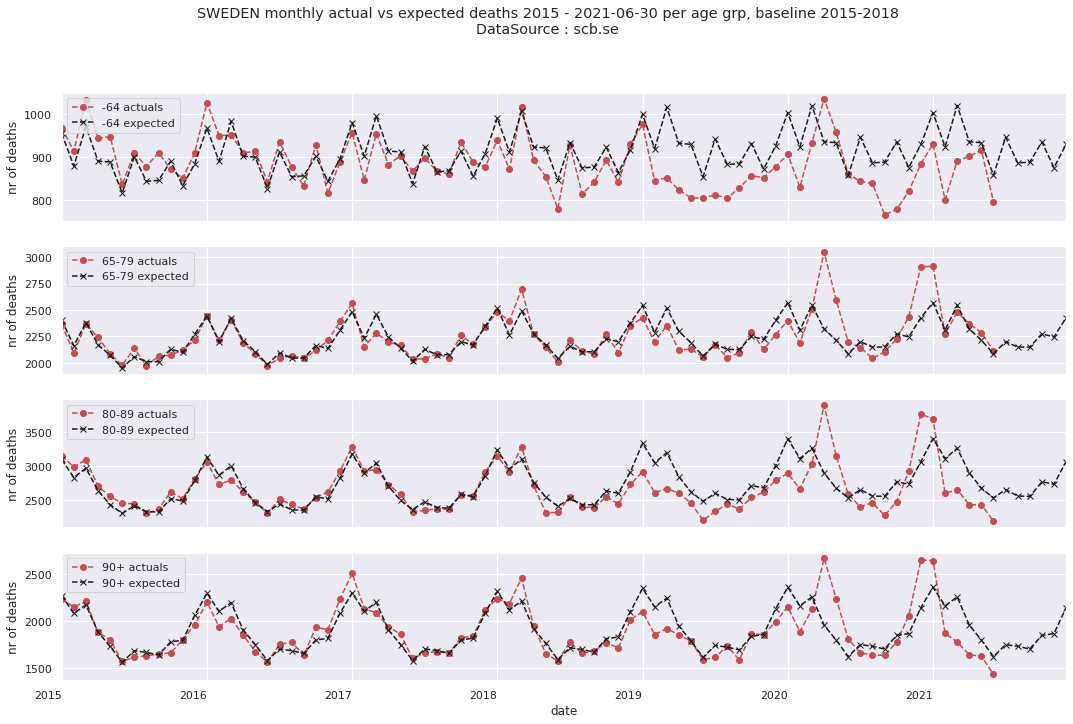

In [807]:
from pandas.tseries.offsets import MonthEnd
title='SWEDEN monthly actual vs expected deaths 2015 - {} per age grp, baseline 2015-2018\nDataSource : scb.se'.format(
    (last_good_date + MonthEnd(0)).date())

axes = grp_daily_corrected_monthly[:-1].plot(subplots=True,figsize=(18,12),style='ro--',title=title)
monthly_expected_deaths.loc['2015' : ].plot(ax=axes,subplots=True,style='kx--')

for i,a in enumerate(axes):
    a.legend([grp_daily_corrected_monthly.columns[i] + ' actuals',
              grp_daily_corrected_monthly.columns[i] + ' expected'],loc='upper left')
    
    a.set_ylabel('nr of deaths')
    
plt.savefig('scb_excess_monthly_expected_vs_actuals_per_age.jpg',format='jpg')

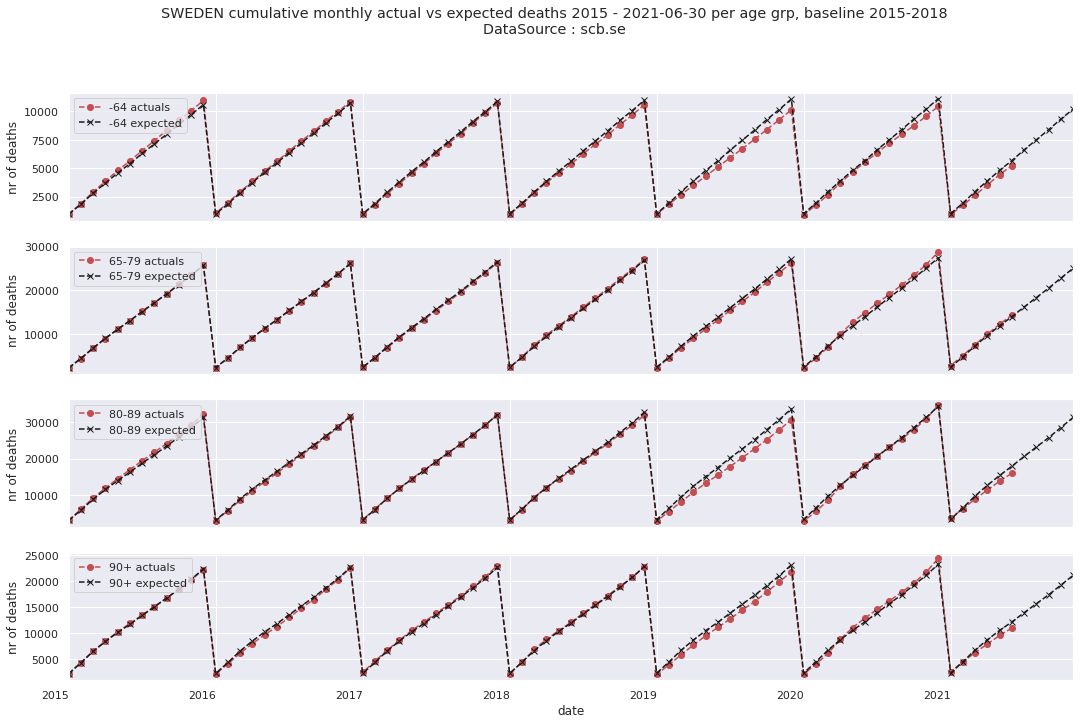

In [808]:
title='SWEDEN cumulative monthly actual vs expected deaths 2015 - {} per age grp, baseline 2015-2018\nDataSource : scb.se'.format(
    (last_good_date + MonthEnd(0)).date())

axes=grp_daily_corrected_monthly[:-1].groupby(grp_daily_corrected_monthly.index[:-1].year).cumsum().plot(
figsize=(18,12),subplots=True,style='ro--',title=title)

monthly_expected_deaths.loc['2015' :][:-1].groupby(
    monthly_expected_deaths.loc['2015' :][:-1].index.year).cumsum().plot(
subplots=True,style='kx--',ax=axes)

for i,a in enumerate(axes):
    a.legend([grp_daily_corrected_monthly.columns[i] + ' actuals',
              grp_daily_corrected_monthly.columns[i] + ' expected'],loc='upper left')
    
    a.set_ylabel('nr of deaths')
    
plt.savefig('scb_excess_cumulative_monthly_expected_vs_actuals_per_age.jpg',format='jpg')

In [809]:
last_data_day

Timestamp('2021-07-16 00:00:00')

In [810]:
idx = grp_daily_corrected_monthly[:-1].index.date

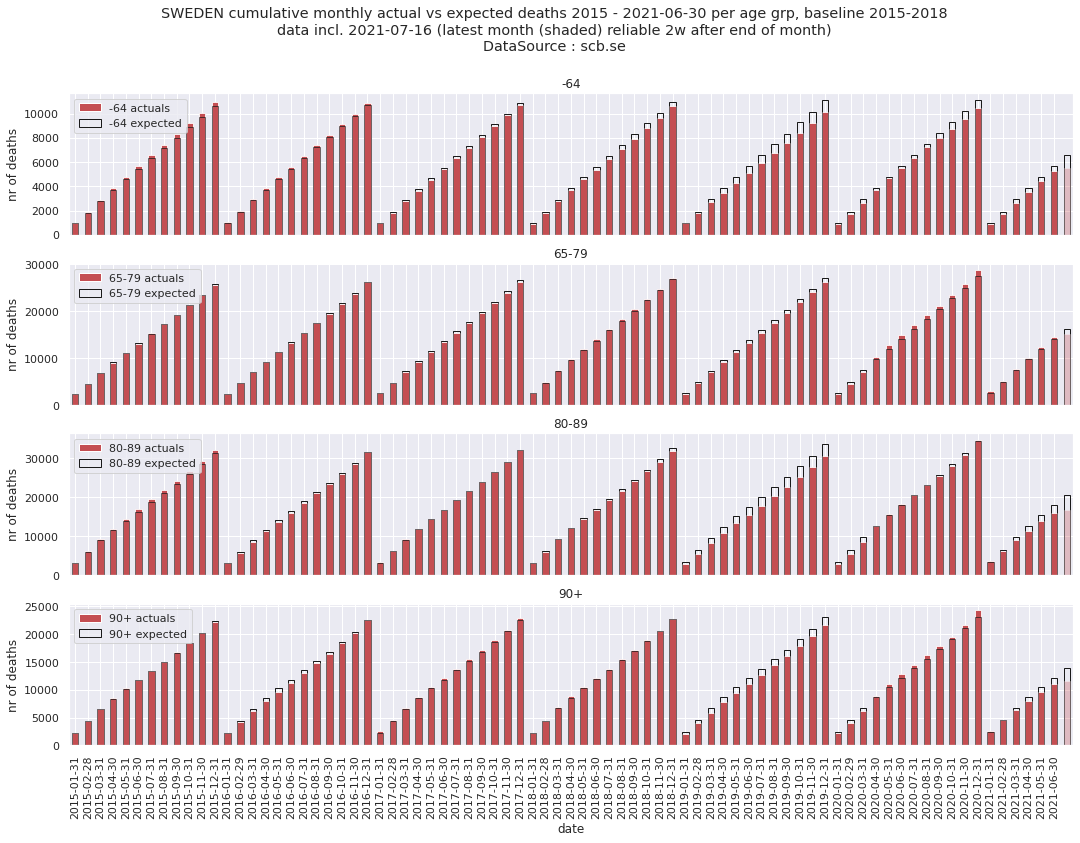

In [811]:
title='SWEDEN cumulative monthly actual vs expected deaths 2015 - {} per age grp, baseline 2015-2018\ndata incl. {} (latest month (shaded) reliable 2w after end of month)\nDataSource : scb.se'.format(
    (last_good_date + MonthEnd(0)).date(),last_data_day.date())

axes = grp_daily_corrected_monthly[:-1].groupby(grp_daily_corrected_monthly.index[:-1].year).cumsum().plot(
    kind='bar',figsize=(18,12),subplots=True,color='r',title=title)

monthly_expected_deaths.loc['2015' :].groupby(
    monthly_expected_deaths.loc['2015' :].index.year).cumsum().plot(
subplots=True,kind='bar',edgecolor='k',color='none',ax=axes)

# include the latest, non-complete month #
grp_daily_corrected_monthly.groupby(grp_daily_corrected_monthly.index.year).cumsum().plot(
    kind='bar',ax=axes,subplots=True,color='r',alpha=0.3)

for i,a in enumerate(axes):
    a.set_xticks(range(len(grp_daily_corrected_monthly[:-1])))
    a.set_xticklabels(idx)
    
    a.legend([grp_daily_corrected_monthly.columns[i] + ' actuals',
              grp_daily_corrected_monthly.columns[i] + ' expected'],loc='upper left')
    
    a.set_ylabel('nr of deaths')
    

    
plt.savefig('scb_excess_cumulative_monthly_expected_vs_actuals_per_age_bar.jpg',format='jpg')


In [812]:
monthly_excess_timeline = (grp_daily_corrected_monthly.groupby(grp_daily_corrected_monthly.index.year).cumsum() -\
monthly_expected_deaths.loc['2015' :].groupby(
    monthly_expected_deaths.loc['2015' :].index.year).cumsum()).dropna()

monthly_excess_timeline

-64        65-79        80-89          90+
2015-01-31    13.415077   -38.643823    52.527607   -35.859354
2015-02-28    47.561749  -105.475269   207.273860    33.128953
2015-03-31   109.800383  -117.279657   332.969144    69.714381
2015-04-30   162.554731   -47.777486   398.962783    67.992659
2015-05-31   221.566645   -33.348865   519.013839   138.453465
...                 ...          ...          ...          ...
2021-03-31  -322.906259   241.766630  -832.594368  -487.175193
2021-04-30  -356.066961   290.515410 -1303.675855  -803.557214
2021-05-31  -373.694152   363.133889 -1543.707484  -973.670351
2021-06-30  -434.803477   390.949725 -1886.617545 -1164.510863
2021-07-31 -1074.343895 -1060.506861 -3759.897248 -2317.933970

[79 rows x 4 columns]

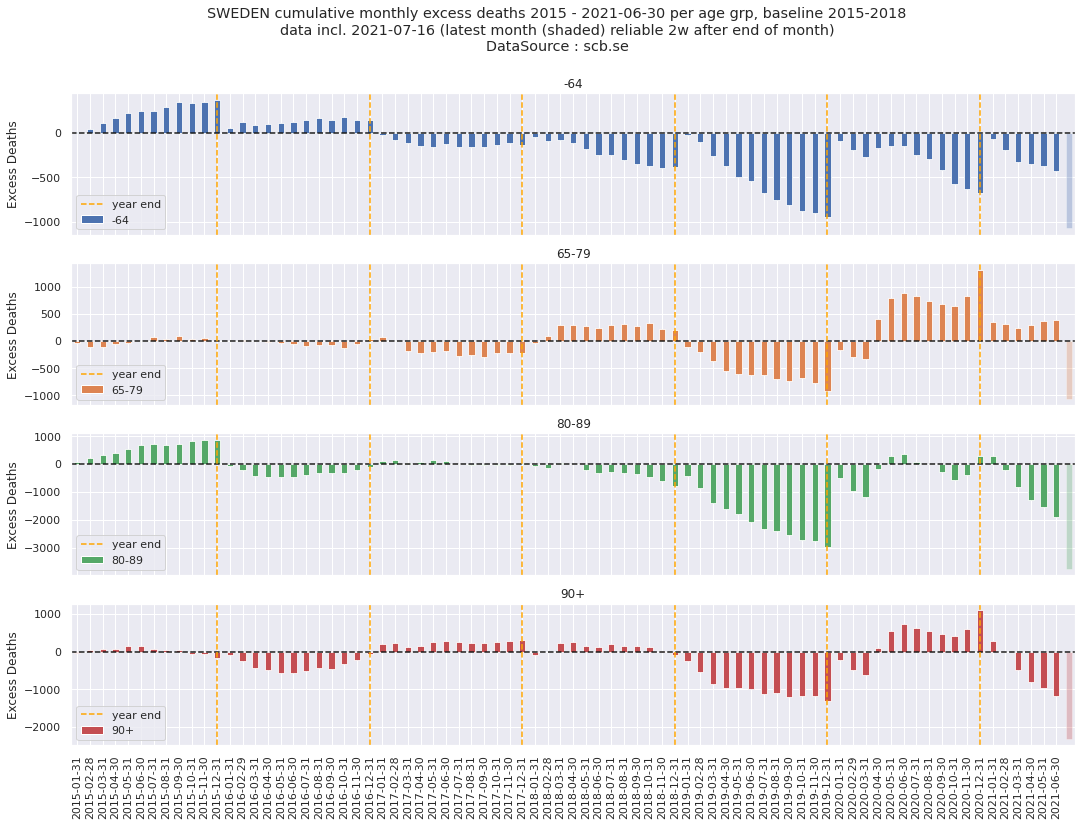

In [813]:
title = 'SWEDEN cumulative monthly excess deaths 2015 - {} per age grp, baseline 2015-2018\ndata incl. {} (latest month (shaded) reliable 2w after end of month)\nDataSource : scb.se'.format(
    (last_good_date + MonthEnd(0)).date(),last_data_day.date())

axes = monthly_excess_timeline[:-1].plot(figsize=(18,12),subplots=True,kind='bar',title=title)

for a in axes:
    a.axhline(0,ls='dashed',color='k')
    a.set_ylabel('Excess Deaths')
    
    label = 'year end'
    for m in range(len(monthly_excess_timeline)):
        if m % 12 == 0 :
            a.axvline(m-1,color='orange',ls='dashed',label = label)
            label = ''
            a.legend(loc='lower left')
            
monthly_excess_timeline.plot(ax=axes,subplots=True,kind='bar',alpha=0.3,legend=None)

_=plt.xticks(range(len(monthly_excess_timeline[:-1])),monthly_excess_timeline.index[:-1].date)

plt.savefig('scb_excess_cum_monthly_excess_grp.jpg',format='jpg')

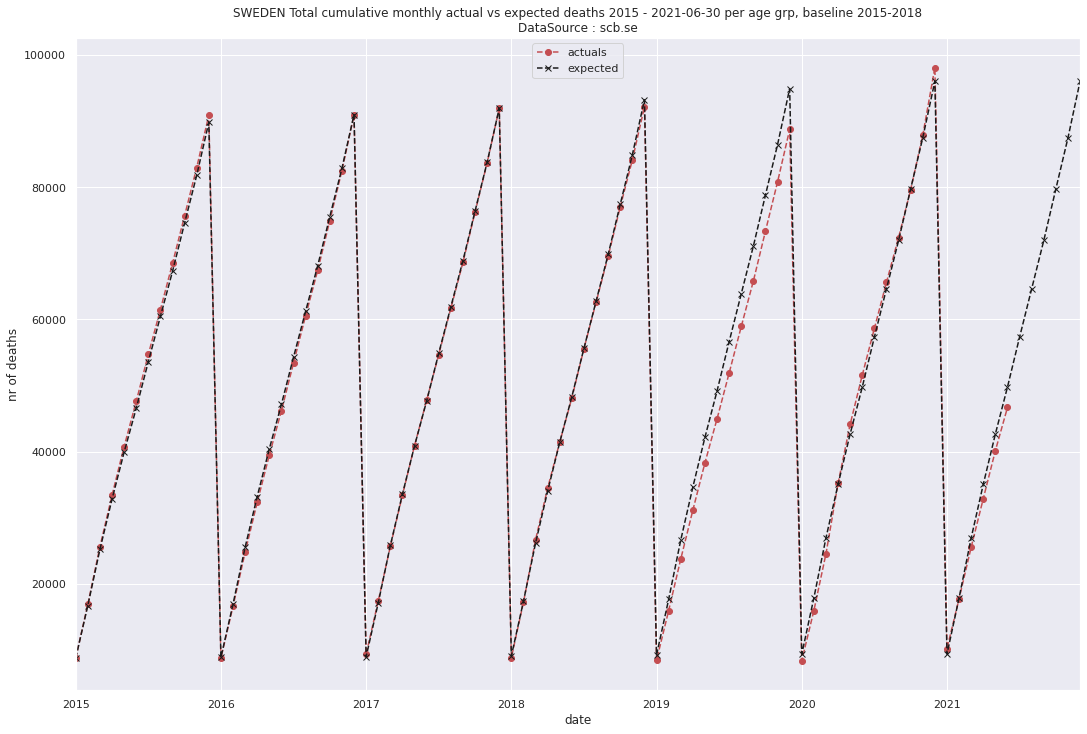

In [814]:
title='SWEDEN Total cumulative monthly actual vs expected deaths 2015 - {} per age grp, baseline 2015-2018\nDataSource : scb.se'.format(
    (last_good_date + MonthEnd(0)).date())

axes = grp_daily_corrected_monthly[:-1].sum(axis=1).groupby(
    grp_daily_corrected_monthly.index[:-1].year).cumsum().plot(figsize=(18,12),style='ro--',title=title)

monthly_expected_deaths.loc['2015' :].sum(axis=1).groupby(
    monthly_expected_deaths.loc['2015' :].index.year).cumsum().plot(
ax=axes,style='kx--')

plt.ylabel('nr of deaths')
plt.legend(['actuals','expected'],loc='upper center')

plt.savefig('scb_excess_total_cumulative_monthly_expected_vs_actuals_per_age.jpg',format='jpg')

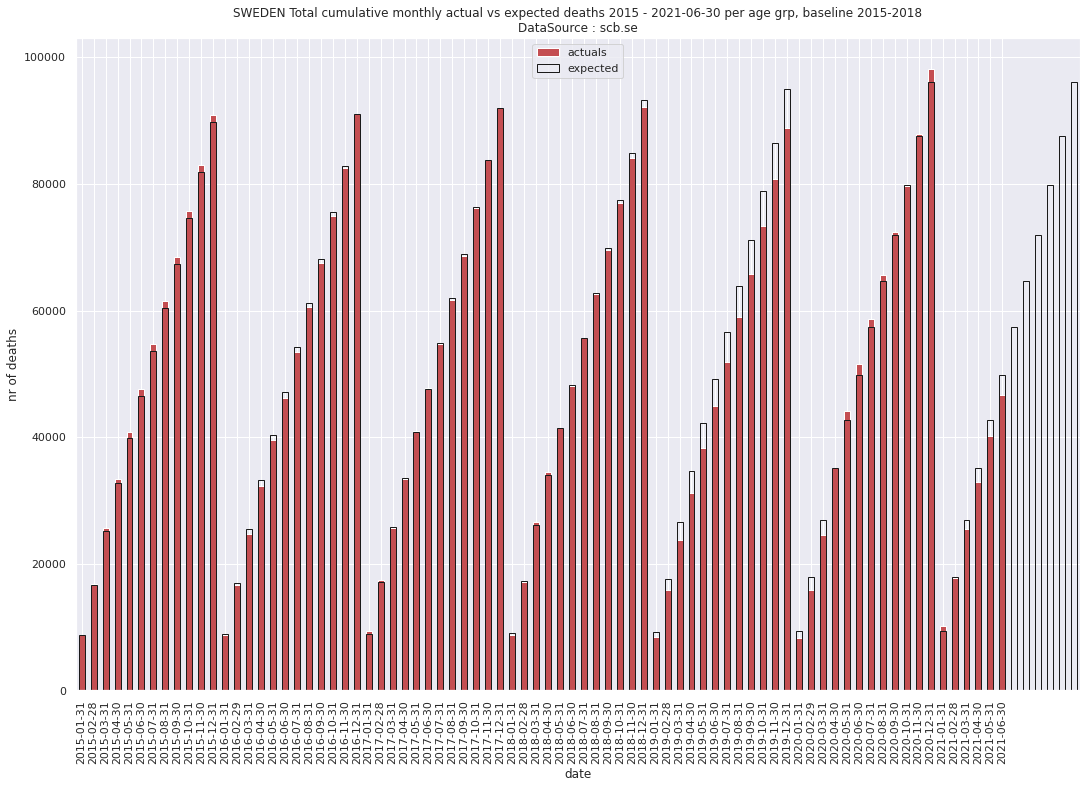

In [815]:
title='SWEDEN Total cumulative monthly actual vs expected deaths 2015 - {} per age grp, baseline 2015-2018\nDataSource : scb.se'.format(
    (last_good_date + MonthEnd(0)).date())

axes = grp_daily_corrected_monthly[:-1].sum(axis=1).groupby(
    grp_daily_corrected_monthly.index[:-1].year).cumsum().plot(figsize=(18,12),kind='bar',
                                                               color='r',title=title)

monthly_expected_deaths.loc['2015' :].sum(axis=1).groupby(
    monthly_expected_deaths.loc['2015' :].index.year).cumsum().plot(
ax=axes,kind='bar',edgecolor='k',color='none')

plt.ylabel('nr of deaths')
plt.legend(['actuals','expected'],loc='upper center')

_=plt.xticks(range(len(grp_daily_corrected_monthly[:-1])),idx)

plt.savefig('scb_excess_total_cumulative_monthly_expected_vs_actuals_per_age_bar.jpg',format='jpg')

In [816]:

yearly_age_grp_excess = monthly_excess.groupby(monthly_excess.index.year).sum()
print (yearly_age_grp_excess.sum(axis=1))
yearly_age_grp_excess

2015    1069.433712
2016     -21.774596
2017     -29.188433
2018   -1065.420784
2019   -6177.153341
2020    2039.455396
2021   -3094.982161
dtype: float64


-64        65-79        80-89          90+
2015  372.814886    -4.198450   862.484948  -161.667673
2016  137.673198    35.344036  -121.398413   -73.393418
2017 -140.573609  -225.612974    18.784621   318.213528
2018 -385.409534   196.624360  -794.858785   -81.776825
2019 -948.073068  -916.706723 -2992.480406 -1319.893144
2020 -676.750520  1311.664916   300.854487  1103.686514
2021 -434.803477   390.949725 -1886.617545 -1164.510863

In [817]:
monthly_excess.groupby([monthly_excess.index.year,monthly_excess.index.month]).cumsum()

-64      65-79       80-89         90+
2015-01-31   13.415077 -38.643823   52.527607  -35.859354
2015-02-28   34.146672 -66.831447  154.746253   68.988307
2015-03-31   62.238634 -11.804387  125.695284   36.585428
2015-04-30   52.754349  69.502171   65.993638   -1.721723
2015-05-31   59.011914  14.428621  120.051056   70.460806
...                ...        ...         ...         ...
2021-03-31 -127.929206 -66.488853 -607.685199 -481.238183
2021-04-30  -33.160702  48.748780 -471.081487 -316.382022
2021-05-31  -17.627191  72.618479 -240.031629 -170.113137
2021-06-30  -61.109325  27.815836 -342.910061 -190.840512
2021-07-31         NaN        NaN         NaN         NaN

[79 rows x 4 columns]

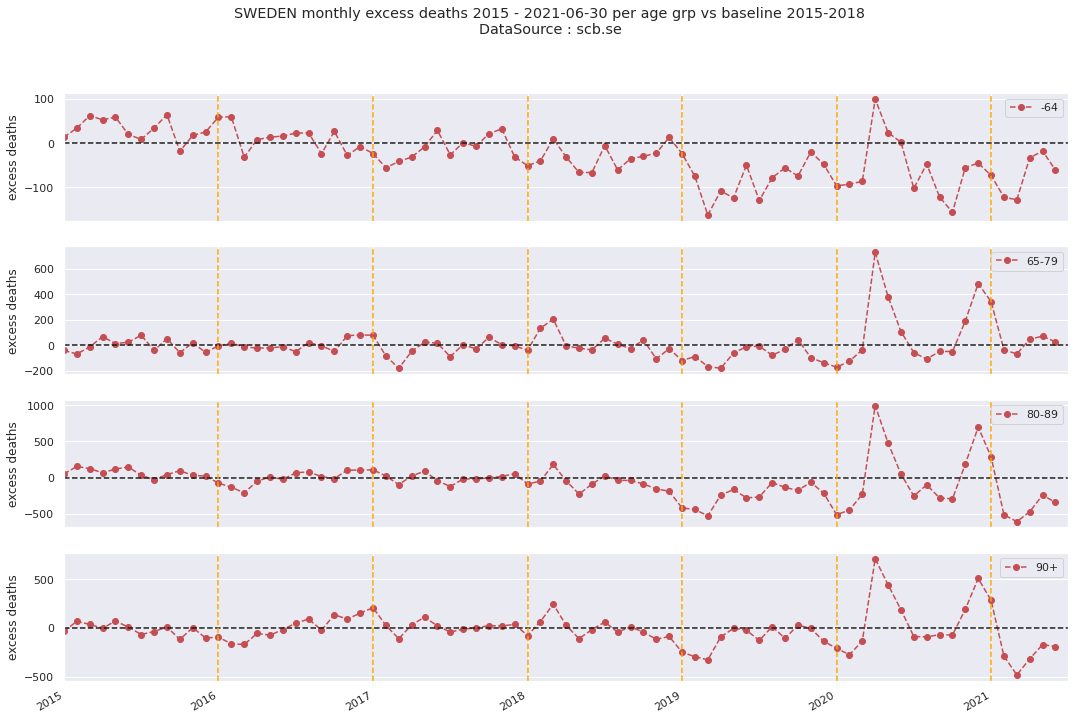

In [818]:
from pandas.tseries.offsets import MonthEnd
title='SWEDEN monthly excess deaths 2015 - {} per age grp vs baseline 2015-2018\nDataSource : scb.se'.format(
    (last_good_date + MonthEnd(0)).date())

axes = monthly_excess.plot(figsize=(18,12),style='ro--',subplots=True,title=title)

for a in axes:
    a.set_ylabel('excess deaths')
    a.axhline(0,ls='dashed',color='k')
    
    for i in range(len(monthly_excess.index))[::12]:
        a.axvline(monthly_excess.index[i],ls='dashed',color='orange')
        
plt.savefig('SCB_timeline_age_grp_monthly_excess.jpg',format='jpg')

In [819]:
monthly_excess

-64      65-79       80-89         90+
2015-01-31   13.415077 -38.643823   52.527607  -35.859354
2015-02-28   34.146672 -66.831447  154.746253   68.988307
2015-03-31   62.238634 -11.804387  125.695284   36.585428
2015-04-30   52.754349  69.502171   65.993638   -1.721723
2015-05-31   59.011914  14.428621  120.051056   70.460806
...                ...        ...         ...         ...
2021-03-31 -127.929206 -66.488853 -607.685199 -481.238183
2021-04-30  -33.160702  48.748780 -471.081487 -316.382022
2021-05-31  -17.627191  72.618479 -240.031629 -170.113137
2021-06-30  -61.109325  27.815836 -342.910061 -190.840512
2021-07-31         NaN        NaN         NaN         NaN

[79 rows x 4 columns]

In [820]:
monthly_cum_excess = monthly_excess.groupby(monthly_excess.index.year).cumsum()
monthly_cum_excess

-64       65-79        80-89          90+
2015-01-31   13.415077  -38.643823    52.527607   -35.859354
2015-02-28   47.561749 -105.475269   207.273860    33.128953
2015-03-31  109.800383 -117.279657   332.969144    69.714381
2015-04-30  162.554731  -47.777486   398.962783    67.992659
2015-05-31  221.566645  -33.348865   519.013839   138.453465
...                ...         ...          ...          ...
2021-03-31 -322.906259  241.766630  -832.594368  -487.175193
2021-04-30 -356.066961  290.515410 -1303.675855  -803.557214
2021-05-31 -373.694152  363.133889 -1543.707484  -973.670351
2021-06-30 -434.803477  390.949725 -1886.617545 -1164.510863
2021-07-31         NaN         NaN          NaN          NaN

[79 rows x 4 columns]

In [821]:
total_monthly_cum_excess = monthly_cum_excess.sum(axis=1)
total_monthly_cum_excess

2015-01-31      -8.560492
2015-02-28     182.489293
2015-03-31     395.204252
2015-04-30     581.732687
2015-05-31     845.685084
                 ...     
2021-03-31   -1400.909190
2021-04-30   -2172.784621
2021-05-31   -2527.938098
2021-06-30   -3094.982161
2021-07-31       0.000000
Freq: M, Length: 79, dtype: float64

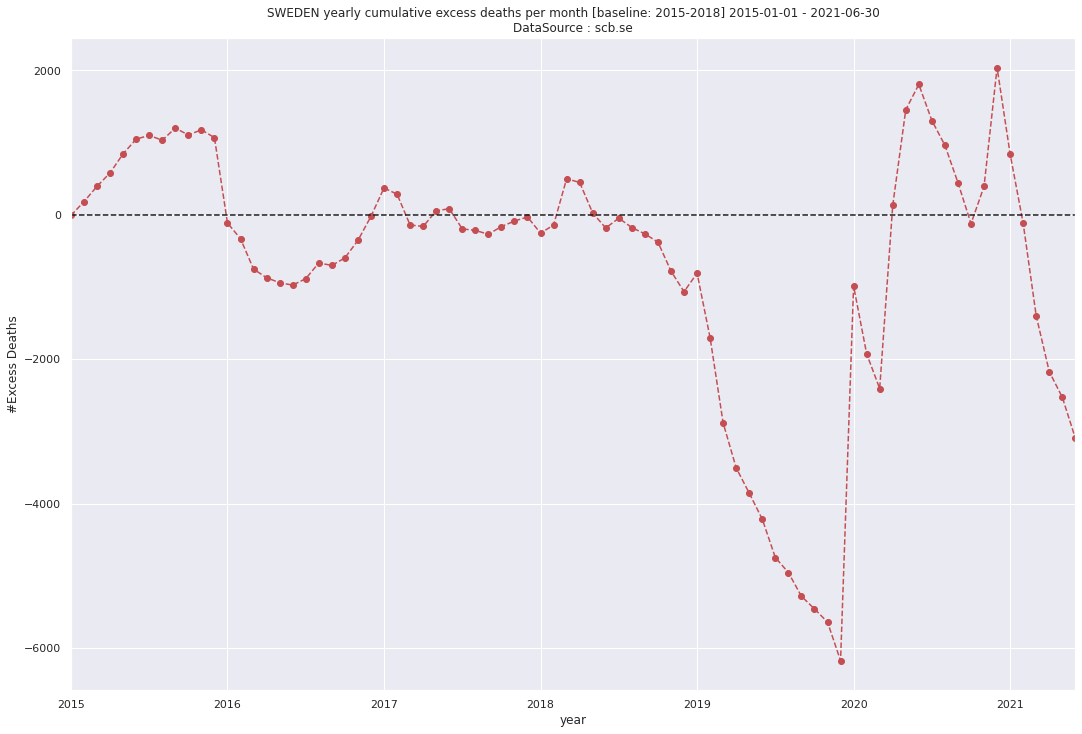

In [822]:
title = 'SWEDEN yearly cumulative excess deaths per month [baseline: 2015-2018] 2015-01-01 - {}\nDataSource : scb.se'.format(
total_monthly_cum_excess.index[-2].date())

total_monthly_cum_excess[:-1].plot(figsize=(18,12),style='ro--',title=title)
plt.axhline(0,ls='dashed',color='k')
plt.ylabel('#Excess Deaths')
plt.xlabel('year')
plt.savefig('SCB_excess_cum_total_excess_deaths_2015_2021_YTD.jpg',format='jpg')

-64       65-79        80-89          90+
2015-01-31   13.415077  -38.643823    52.527607   -35.859354
2015-02-28   47.561749 -105.475269   207.273860    33.128953
2015-03-31  109.800383 -117.279657   332.969144    69.714381
2015-04-30  162.554731  -47.777486   398.962783    67.992659
2015-05-31  221.566645  -33.348865   519.013839   138.453465
...                ...         ...          ...          ...
2021-03-31 -322.906259  241.766630  -832.594368  -487.175193
2021-04-30 -356.066961  290.515410 -1303.675855  -803.557214
2021-05-31 -373.694152  363.133889 -1543.707484  -973.670351
2021-06-30 -434.803477  390.949725 -1886.617545 -1164.510863
2021-07-31         NaN         NaN          NaN          NaN

[79 rows x 4 columns]

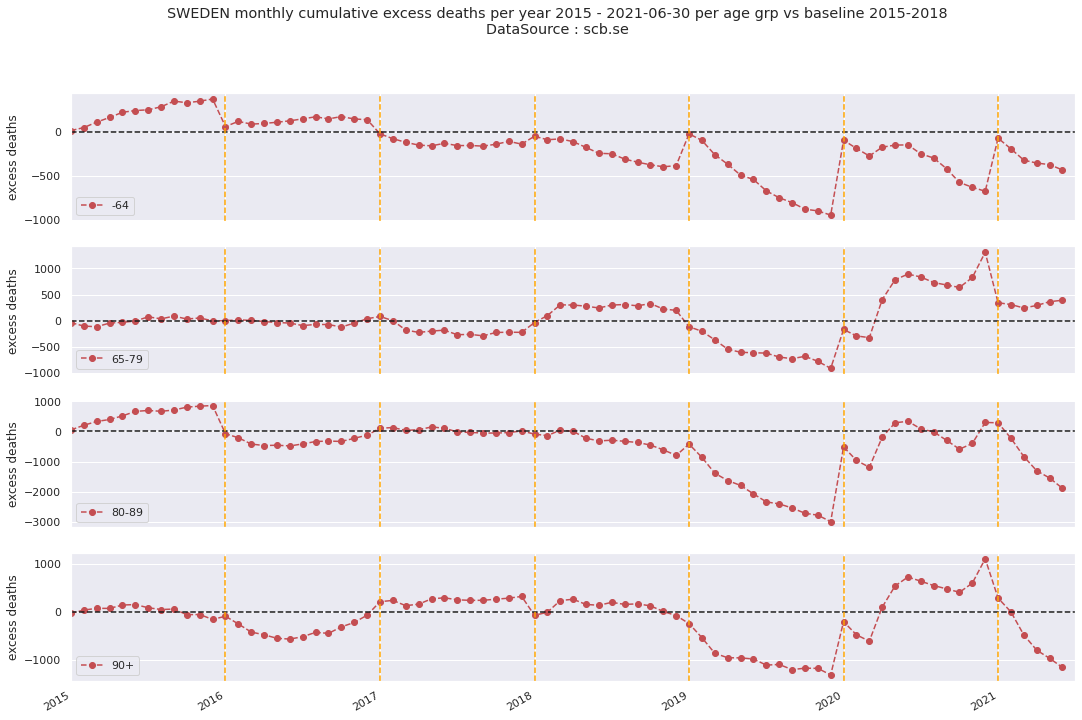

In [823]:
#### BUG! Identified : scb data error : see note on top of notebook ####
#### HOW CAN 90+ HAVE EXCESS DEATHS WHEN MORTALITY FOR THAT AGE GRP AS ABOVE IS BELOW SAME BASELINE....? ####
#### ONLY MORTALITY FOR 2020 IS IDENTICAL IN THE TWO COMPUTATIONS - MORTALITY FOR OTHER YEARS IS LOWER FOR ####
#### THE OTHER YEARS IN THE SECOND COMPUTATION ####

#### the first computation is correct ####

title='SWEDEN monthly cumulative excess deaths per year 2015 - {} per age grp vs baseline 2015-2018\nDataSource : scb.se'.format(
    (last_good_date + MonthEnd(0)).date())
axes = monthly_cum_excess.plot(figsize=(18,12),subplots=True,style='ro--',title=title)

for a in axes:
    a.axhline(0,ls='dashed',color='k')
    a.set_ylabel('excess deaths')
    a.legend(loc='lower left')
    
    for i in range(len(monthly_cum_excess.index))[::12]:
        a.axvline(monthly_cum_excess.index[i],ls='dashed',color='orange')
        
plt.savefig('SCB_timeline_age_grp_monthly_cumulative_excess.jpg',format='jpg')
monthly_cum_excess

In [824]:
monthly_cum_excess.sum(axis=1)

2015-01-31      -8.560492
2015-02-28     182.489293
2015-03-31     395.204252
2015-04-30     581.732687
2015-05-31     845.685084
                 ...     
2021-03-31   -1400.909190
2021-04-30   -2172.784621
2021-05-31   -2527.938098
2021-06-30   -3094.982161
2021-07-31       0.000000
Freq: M, Length: 79, dtype: float64

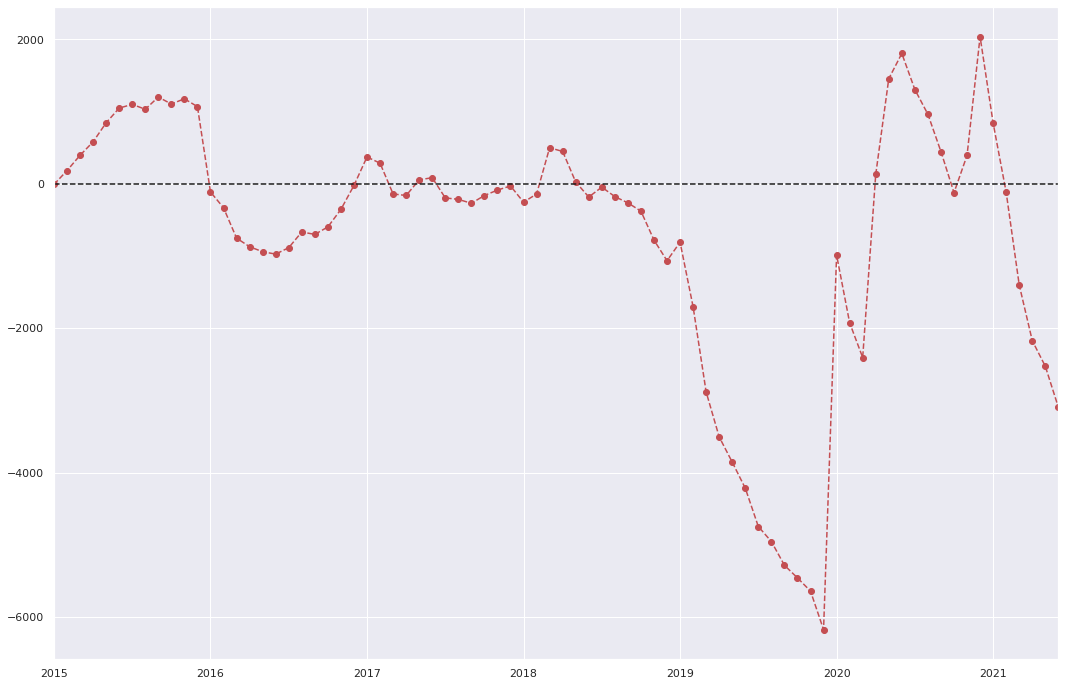

In [825]:
monthly_cum_excess.sum(axis=1)[:-1].plot(figsize=(18,12),style='ro--')
plt.axhline(0,ls='dashed',color='k')

In [826]:
#### scb data error, cmp next cell - this one has the correct data for all years ###
mort_by_official = age_mortality_flat.loc['2015':]
mort_by_official

scb_prel_age_bin     -64       65-79     80-89     90+  
year                                                    
2015              0.001393  0.017732  0.078093  0.221373
2016              0.001363  0.017759  0.075700  0.222263
2017              0.001328  0.017585  0.076037  0.226129
2018              0.001298  0.017865  0.074139  0.222186
2019              0.001230  0.017137  0.069221  0.210232
2020              0.001264  0.018582  0.076659  0.233598

In [827]:
#### scb data error - this one has only 2020 correct (all data from prel data scb excel tabell 2)
mort_by_prel = monthly_age_grp_mortality_long[:-1].groupby(monthly_age_grp_mortality_long.index[:-1].year).sum()
mort_by_prel

-64     65-79     80-89       90+
2015  0.001393  0.017732  0.078093  0.221373
2016  0.001363  0.017759  0.075700  0.222263
2017  0.001328  0.017585  0.076037  0.226129
2018  0.001298  0.017865  0.074139  0.222186
2019  0.001230  0.017137  0.069221  0.210232
2020  0.001264  0.018582  0.076659  0.233598
2021  0.000633  0.009313  0.035527  0.105667

In [828]:
official_2015_2019 = dead_age_scb_prel_df.loc['2015':].unstack()
official_2015_2019

dead                     
scb_prel_age_bin  -64    65-79  80-89  90+  
year                                        
2015              10972  25708  32060  22167
2016              10870  26182  31431  22499
2017              10736  26340  31988  22908
2018              10602  27116  31800  22667
2019              10139  26279  30594  21754
2020              10455  28795  34574  24300

In [829]:
prel_2015_2021 = grp_daily_corrected.groupby(grp_daily_corrected.index.year).sum()
prel_2015_2021

-64    65-79    80-89      90+
date                                    
2015  10972.0  25708.0  32060.0  22167.0
2016  10870.0  26182.0  31431.0  22499.0
2017  10736.0  26340.0  31988.0  22908.0
2018  10602.0  27116.0  31800.0  22667.0
2019  10139.0  26279.0  30594.0  21754.0
2020  10455.0  28795.0  34574.0  24300.0
2021   5543.0  15181.0  16808.0  11588.0

In [830]:
official_2015_2019.index = range(2015,2021)

official_2015_2019.index.name='year'

official_2015_2019 = official_2015_2019.droplevel(0,axis=1)

official_2015_2019

scb_prel_age_bin  -64    65-79  80-89  90+  
year                                        
2015              10972  25708  32060  22167
2016              10870  26182  31431  22499
2017              10736  26340  31988  22908
2018              10602  27116  31800  22667
2019              10139  26279  30594  21754
2020              10455  28795  34574  24300

In [831]:
prel_2015_2021 - official_2015_2019

-64         65-79         80-89           90+
2015  3.637979e-12  2.910383e-11 -2.146407e-10  1.455192e-11
2016 -1.273293e-11  1.091394e-11 -1.091394e-11 -1.818989e-11
2017 -1.818989e-12 -3.274181e-11  0.000000e+00 -2.182787e-11
2018  1.091394e-11 -7.275958e-12 -1.818989e-11  3.274181e-11
2019  3.637979e-12  2.182787e-11  3.274181e-11  7.275958e-12
2020 -1.455192e-11  0.000000e+00 -5.093170e-11  1.600711e-10
2021           NaN           NaN           NaN           NaN

In [832]:
official_2015_2019.sum(axis=1)

year
2015    90907
2016    90982
2017    91972
2018    92185
2019    88766
2020    98124
dtype: int64

In [833]:
prel_2015_2021.sum(axis=1)

date
2015    90907.0
2016    90982.0
2017    91972.0
2018    92185.0
2019    88766.0
2020    98124.0
2021    49120.0
dtype: float64

In [834]:
monthly_cum_excess

-64       65-79        80-89          90+
2015-01-31   13.415077  -38.643823    52.527607   -35.859354
2015-02-28   47.561749 -105.475269   207.273860    33.128953
2015-03-31  109.800383 -117.279657   332.969144    69.714381
2015-04-30  162.554731  -47.777486   398.962783    67.992659
2015-05-31  221.566645  -33.348865   519.013839   138.453465
...                ...         ...          ...          ...
2021-03-31 -322.906259  241.766630  -832.594368  -487.175193
2021-04-30 -356.066961  290.515410 -1303.675855  -803.557214
2021-05-31 -373.694152  363.133889 -1543.707484  -973.670351
2021-06-30 -434.803477  390.949725 -1886.617545 -1164.510863
2021-07-31         NaN         NaN          NaN          NaN

[79 rows x 4 columns]

In [835]:
monthly_cum_excess.sum(axis=1)

2015-01-31      -8.560492
2015-02-28     182.489293
2015-03-31     395.204252
2015-04-30     581.732687
2015-05-31     845.685084
                 ...     
2021-03-31   -1400.909190
2021-04-30   -2172.784621
2021-05-31   -2527.938098
2021-06-30   -3094.982161
2021-07-31       0.000000
Freq: M, Length: 79, dtype: float64

In [836]:
def plot_excess_timeline(df,title=''):
    
    year_grps = df.groupby(df.index.year)

    yrs = range(2015,2022)

    plt.figure(figsize=(18,12))
    plt.title(title)
    plt.ylabel('excess deaths')
    plt.xlabel('year')

    colors = ['blue','green','orange','red']

    for y in yrs:

        yg = year_grps.get_group(y)

        for i, ag in enumerate(yg.columns):

            if y == 2015:
                label = ag
            else:
                label = ''

            plt.plot(yg[ag],'o--',color=colors[i],label=label)
            
        if y != yrs[-1]:
            label = 'EOY' if y == yrs[0] else ''
            plt.axvline(yg.index[-1],color='k',ls='dashed',label=label)
    

    plt.legend()
    plt.axhline(0,color='k',ls='dashed')



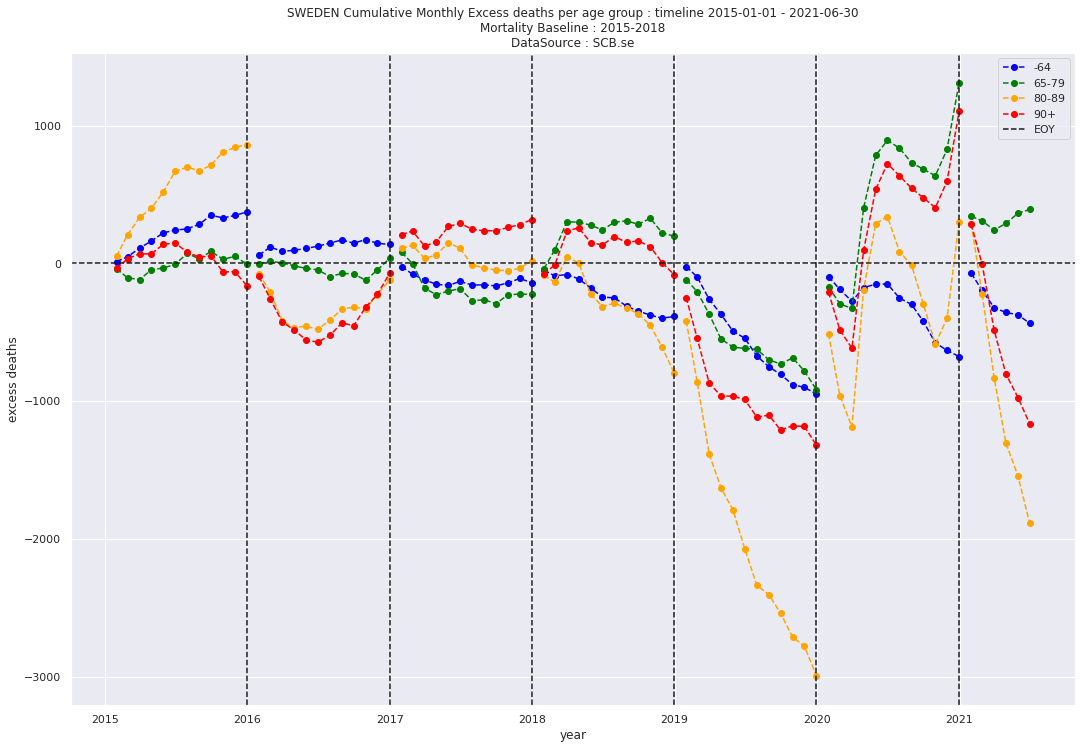

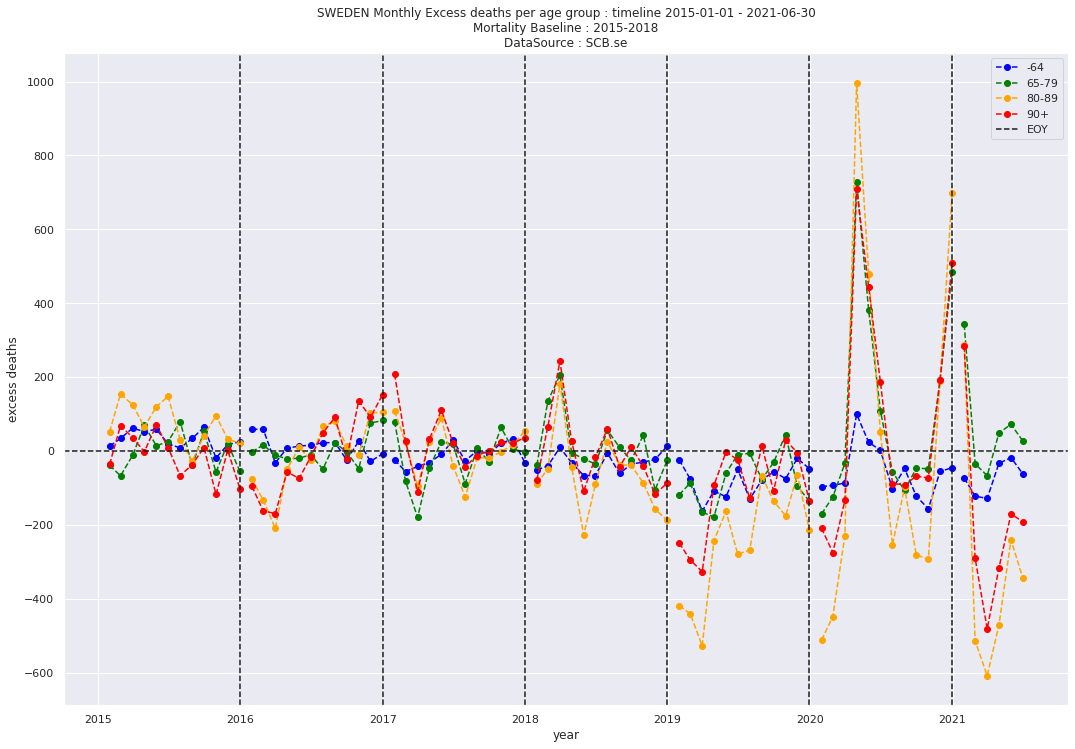

In [837]:
leg = '\nMortality Baseline : 2015-2018'
cred = '\nDataSource : SCB.se'
title = 'SWEDEN Cumulative Monthly Excess deaths per age group : timeline 2015-01-01 - {}'.format(
    monthly_cum_excess.index[-2].date()) + leg + cred

plot_excess_timeline(monthly_cum_excess,title)
plt.savefig('SCB_excess_cum_excess_2015_YTD_timeline.jpg',format='jpg')

title = 'SWEDEN Monthly Excess deaths per age group : timeline 2015-01-01 - {}'.format(
    monthly_cum_excess.index[-2].date()) + leg + cred

plot_excess_timeline(monthly_excess,title)
plt.savefig('SCB_excess_excess_2015_YTD_timeline.jpg',format='jpg')



In [838]:
##### FHM #####

In [839]:
fhm_file = pd.ExcelFile('https://www.arcgis.com/sharing/rest/content/items/b5e7488e117749c19881cce45db13f7e/data')
fhm_file.sheet_names

['Antal per dag region',
 'Antal avlidna per dag',
 'Antal intensivvårdade per dag',
 'Totalt antal per region',
 'Totalt antal per kön',
 'Totalt antal per åldersgrupp',
 'Veckodata Region',
 'Veckodata Kommun_stadsdel',
 'Veckodata Riket',
 'FOHM 22 Jul 2021']

In [840]:
fhm_daily_dead = fhm_file.parse(sheet_name='Antal avlidna per dag')
fhm_daily_dead.tail(20)

Datum_avliden  Antal_avlidna
479  2021-07-03 00:00:00              2
480  2021-07-04 00:00:00              0
481  2021-07-05 00:00:00              0
482  2021-07-06 00:00:00              2
483  2021-07-07 00:00:00              0
484  2021-07-08 00:00:00              0
485  2021-07-09 00:00:00              0
486  2021-07-10 00:00:00              0
487  2021-07-11 00:00:00              1
488  2021-07-12 00:00:00              0
489  2021-07-13 00:00:00              0
490  2021-07-14 00:00:00              0
491  2021-07-15 00:00:00              0
492  2021-07-16 00:00:00              0
493  2021-07-17 00:00:00              0
494  2021-07-18 00:00:00              0
495  2021-07-19 00:00:00              0
496  2021-07-20 00:00:00              0
497  2021-07-21 00:00:00              0
498       Uppgift saknas             36

In [841]:
fhm_daily_dead.sum()

Antal_avlidna    14651
dtype: int64

In [842]:
fhm_dead_unknowns = fhm_daily_dead.iloc[-1].copy()
fhm_daily_dead_knowns = fhm_daily_dead.iloc[:-1].copy()
fhm_dead_unknowns

Datum_avliden    Uppgift saknas
Antal_avlidna                36
Name: 498, dtype: object

In [843]:
fhm_daily_dead_knowns

Datum_avliden  Antal_avlidna
0    2020-03-11 00:00:00              1
1    2020-03-12 00:00:00              0
2    2020-03-13 00:00:00              1
3    2020-03-14 00:00:00              1
4    2020-03-15 00:00:00              2
..                   ...            ...
493  2021-07-17 00:00:00              0
494  2021-07-18 00:00:00              0
495  2021-07-19 00:00:00              0
496  2021-07-20 00:00:00              0
497  2021-07-21 00:00:00              0

[498 rows x 2 columns]

In [844]:
add_ons = fhm_dead_unknowns.loc['Antal_avlidna'] * (fhm_daily_dead_knowns['Antal_avlidna'] / 
                                                    fhm_daily_dead_knowns['Antal_avlidna'].sum())
#fhm_dead_unknowns.loc['Antal_avlidna']
fhm_daily_dead_corrected = add_ons + fhm_daily_dead_knowns['Antal_avlidna']
print (fhm_daily_dead_corrected.sum())
fhm_daily_dead_corrected

14650.999999999998


0      1.002463
1      0.000000
2      1.002463
3      1.002463
4      2.004926
         ...   
493    0.000000
494    0.000000
495    0.000000
496    0.000000
497    0.000000
Name: Antal_avlidna, Length: 498, dtype: float64

In [845]:
### NOTE - using only the deaths with known dates, skipping the 40 with unknown date ###
fhm_daily_dead_knowns['Datum_avliden'] = pd.to_datetime(fhm_daily_dead_knowns['Datum_avliden'])
fhm_daily_dead_knowns.set_index('Datum_avliden',inplace=True)
fhm_daily_dead_knowns

Antal_avlidna
Datum_avliden               
2020-03-11                 1
2020-03-12                 0
2020-03-13                 1
2020-03-14                 1
2020-03-15                 2
...                      ...
2021-07-17                 0
2021-07-18                 0
2021-07-19                 0
2021-07-20                 0
2021-07-21                 0

[498 rows x 1 columns]

<AxesSubplot:xlabel='Datum_avliden'>

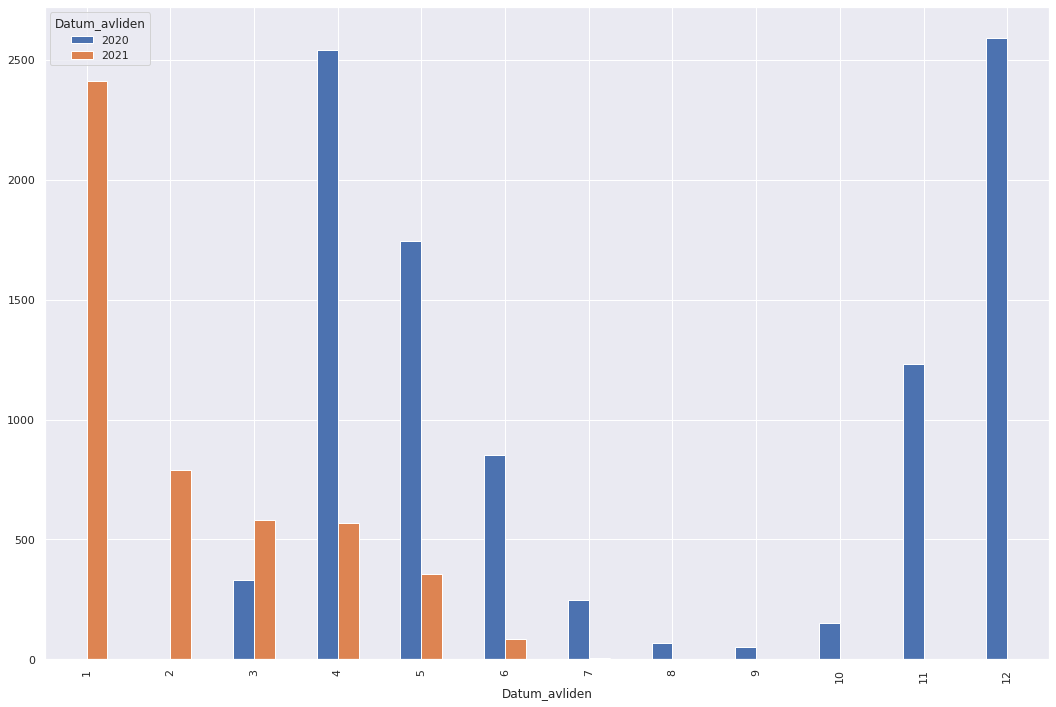

In [846]:
monthly_covid_deaths = \
fhm_daily_dead_knowns.groupby([fhm_daily_dead_knowns.index.year,fhm_daily_dead_knowns.index.month]).sum()

monthly_covid_deaths.unstack().droplevel(level=0,axis=1).T.plot(kind='bar',figsize=(18,12))

In [847]:
fhm_daily_dead_knowns.sum()

Antal_avlidna    14615
dtype: int64

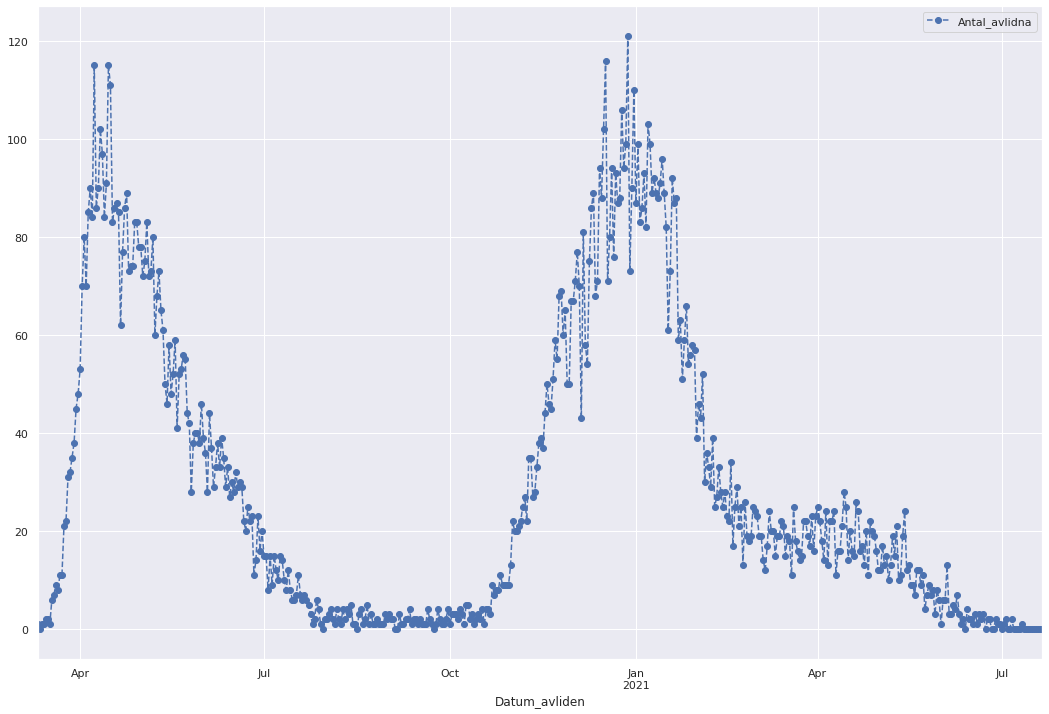

In [848]:
fhm_daily_dead_knowns.plot(figsize=(18,12),style='o--')
plt.savefig('SCB_excess_fhm_daily_dead.jpg',format='jpg')

In [849]:
fhm_weekly_dead = fhm_daily_dead_knowns.resample('W').sum()
fhm_weekly_dead

Antal_avlidna
Datum_avliden               
2020-03-15                 5
2020-03-22                44
2020-03-29               190
2020-04-05               451
2020-04-12               664
...                      ...
2021-06-27                 9
2021-07-04                 7
2021-07-11                 3
2021-07-18                 0
2021-07-25                 0

[72 rows x 1 columns]

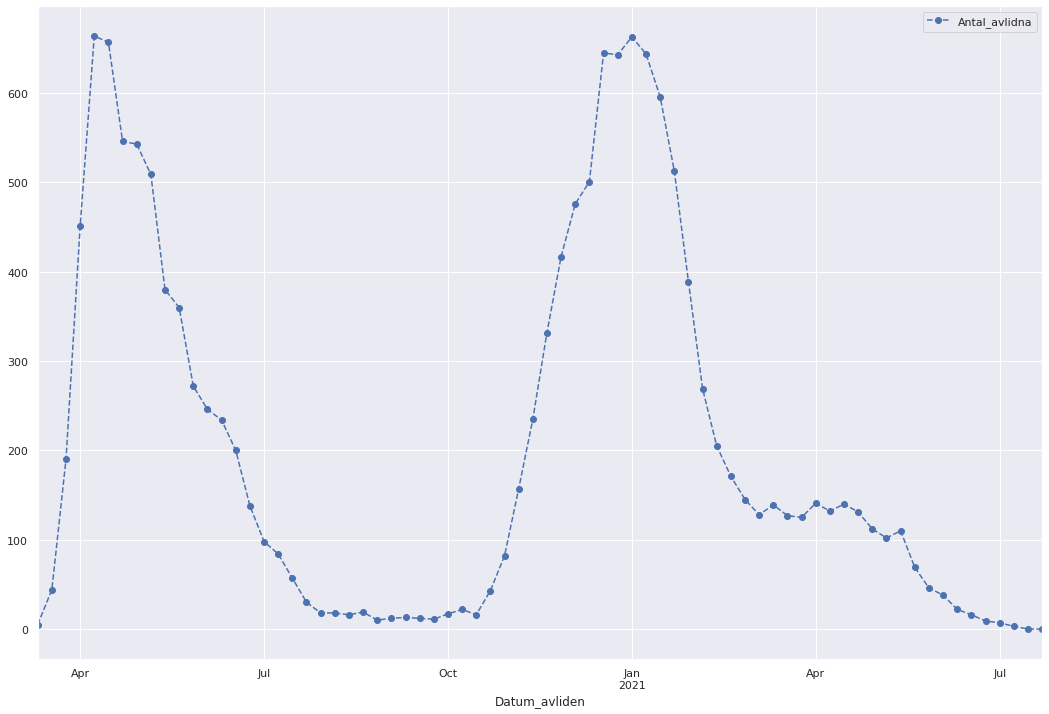

In [850]:
fhm_weekly_dead.plot(style='o--',figsize=(18,12))
plt.savefig('SCB_excess_fhm_weekly_dead.jpg',format='jpg')

In [851]:
fhm_positive = fhm_file.parse(sheet_name='Antal per dag region',usecols=[0,1],parse_dates=True,index_col=0)
fhm_positive.tail(40)


Totalt_antal_fall
Statistikdatum                   
2021-06-12                    525
2021-06-13                    160
2021-06-14                      0
2021-06-15                      0
2021-06-16                     35
2021-06-17                   2188
2021-06-18                    600
2021-06-19                     16
2021-06-20                      1
2021-06-21                    677
2021-06-22                    505
2021-06-23                    380
2021-06-24                    373
2021-06-25                     31
2021-06-26                      8
2021-06-27                      6
2021-06-28                    442
2021-06-29                    250
2021-06-30                    560
2021-07-01                    281
2021-07-02                    325
2021-07-03                      3
2021-07-04                      2
2021-07-05                    413
2021-07-06                    369
2021-07-07                    257
2021-07-08                    232
2021-07-09                    225
2021-07-10                      5
2021-07-11                      0
2021-07-12                    438
2021-07-13                    367
2021-07-14                    345
2021-07-15                    362
2021-07-16                    334
2021-07-17                      7
2021-07-18                      2
2021-07-19                    631
2021-07-20                    516
2021-07-21                    582

In [852]:
fhm_weekly_positive = fhm_positive.resample('W').sum()
fhm_weekly_positive

Totalt_antal_fall
Statistikdatum                   
2020-02-09                      1
2020-02-16                      0
2020-02-23                      0
2020-03-01                     13
2020-03-08                    211
...                           ...
2021-06-27                   1980
2021-07-04                   1863
2021-07-11                   1501
2021-07-18                   1855
2021-07-25                   1729

[77 rows x 1 columns]

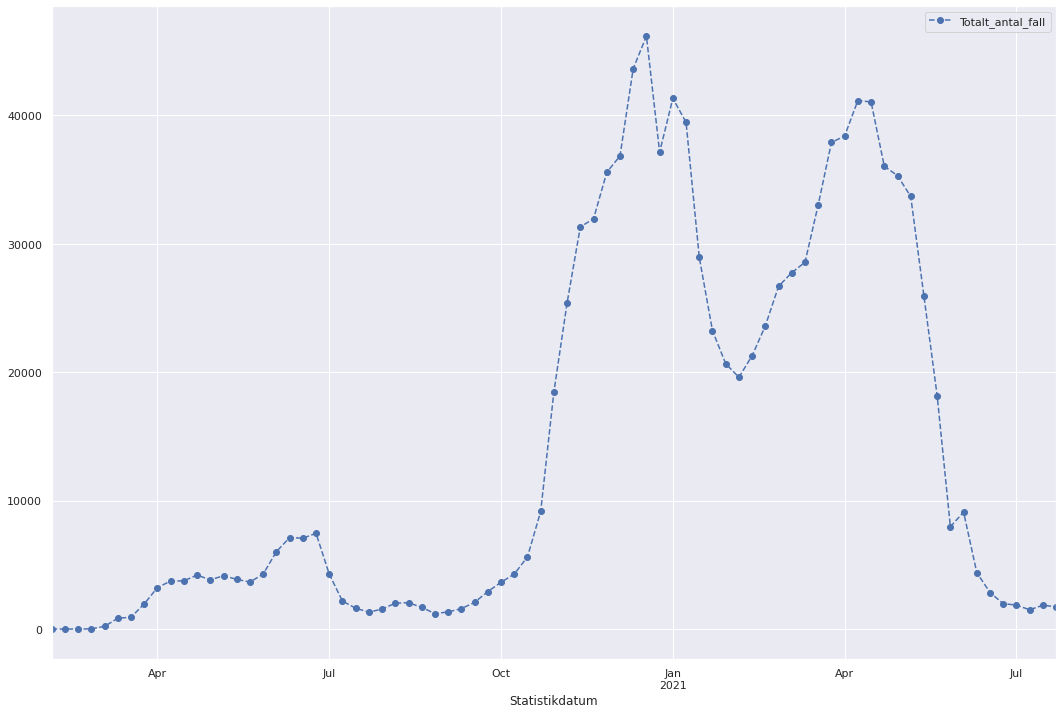

In [853]:
fhm_weekly_positive.plot(style='o--',figsize=(18,12))
plt.savefig('SCB_excess_fhm_weekly_positive.jpg',format='jpg')

Antal_intensivvårdade
Datum_vårdstart                       
2021-06-12                           1
2021-06-13                           5
2021-06-14                           1
2021-06-15                           3
2021-06-16                           2
2021-06-17                           3
2021-06-18                           0
2021-06-19                           2
2021-06-20                           0
2021-06-21                           5
2021-06-22                           2
2021-06-23                           2
2021-06-24                           3
2021-06-25                           0
2021-06-26                           1
2021-06-27                           2
2021-06-28                           0
2021-06-29                           0
2021-06-30                           1
2021-07-01                           0
2021-07-02                           3
2021-07-03                           0
2021-07-04                           0
2021-07-05                           2
2021-07-06                           0
2021-07-07                           1
2021-07-08                           2
2021-07-09                           0
2021-07-10                           1
2021-07-11                           0
2021-07-12                           0
2021-07-13                           1
2021-07-14                           1
2021-07-15                           1
2021-07-16                           1
2021-07-17                           2
2021-07-18                           1
2021-07-19                           0
2021-07-20                           0
2021-07-21                           0

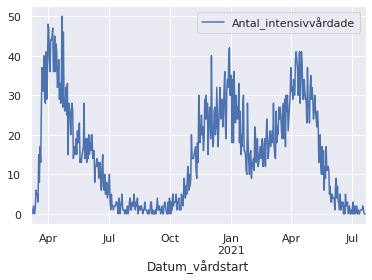

In [854]:
fhm_icu = fhm_file.parse(sheet_name='Antal intensivvårdade per dag',parse_dates=True,index_col=0)
fhm_icu.plot()
fhm_icu.tail(40)

In [855]:
fhm_icu_weekly = fhm_icu.resample('W').sum()
fhm_icu_weekly

Antal_intensivvårdade
Datum_vårdstart                       
2020-03-08                           3
2020-03-15                          16
2020-03-22                          88
2020-03-29                         238
2020-04-05                         277
...                                ...
2021-06-27                          15
2021-07-04                           4
2021-07-11                           6
2021-07-18                           7
2021-07-25                           0

[73 rows x 1 columns]

In [856]:
print(fhm_icu_weekly.loc['2020-05'])
print (fhm_icu_weekly.loc['2021-05'])

                 Antal_intensivvårdade
Datum_vårdstart                       
2020-05-03                         188
2020-05-10                         156
2020-05-17                         124
2020-05-24                         111
2020-05-31                         122
                 Antal_intensivvårdade
Datum_vårdstart                       
2021-05-02                         206
2021-05-09                         181
2021-05-16                         118
2021-05-23                          87
2021-05-30                          60


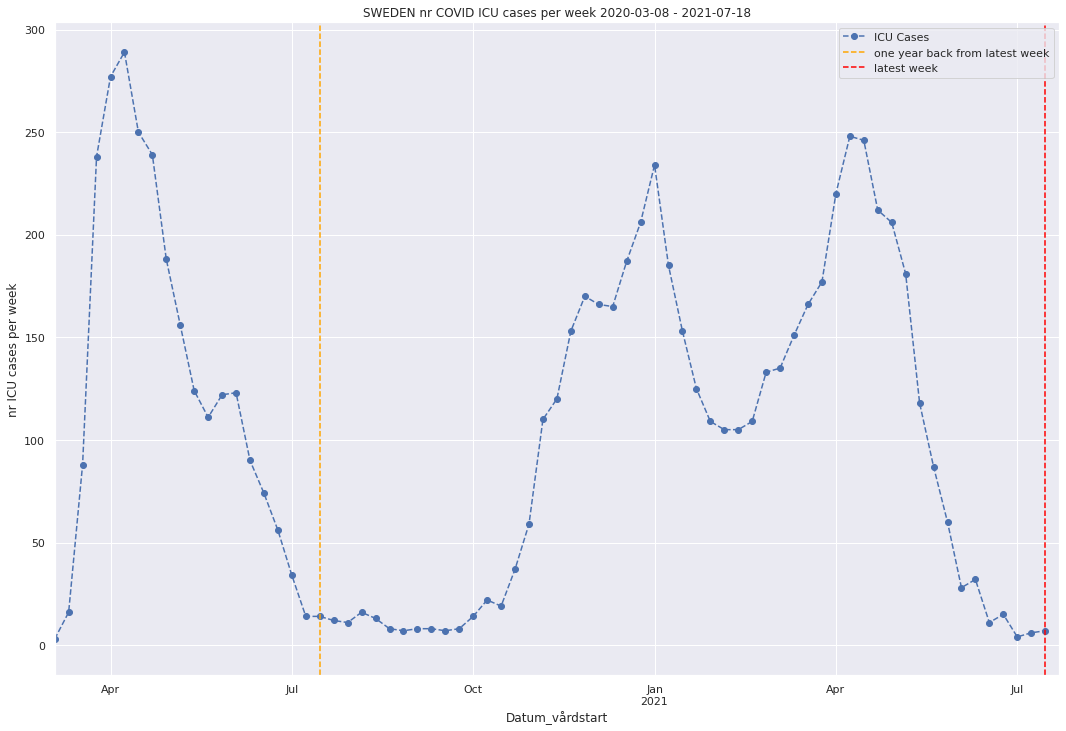

In [857]:
last_good = fhm_icu_weekly.index[-2].date()
one_year_back_from_last = last_good - pd.DateOffset(years=1)
one_week_fwd = last_good + pd.DateOffset(weeks=1)

title = "SWEDEN nr COVID ICU cases per week {} - {}".format(fhm_icu_weekly.index[0].date(),last_good)
ax = fhm_icu_weekly[:-1].plot(style='o--',figsize=(18,12),title=title)
plt.axvline(one_year_back_from_last,ls='dashed',color='orange',label='one year back from latest week')
plt.axvline(last_good,color='red',ls='dashed',label='latest week')
fhm_icu_weekly.plot(ax=ax,alpha=0) # to extend the x-axis one more week for clarity #
plt.ylabel('nr ICU cases per week')
plt.legend(['ICU Cases','one year back from latest week','latest week'],loc='upper right')
plt.savefig('SCB_excess_fhm_weekly_icu.jpg',format='jpg')

In [858]:
fhm_weekly_positive

Totalt_antal_fall
Statistikdatum                   
2020-02-09                      1
2020-02-16                      0
2020-02-23                      0
2020-03-01                     13
2020-03-08                    211
...                           ...
2021-06-27                   1980
2021-07-04                   1863
2021-07-11                   1501
2021-07-18                   1855
2021-07-25                   1729

[77 rows x 1 columns]

In [859]:
fhm_weekly_positive.tail()

Totalt_antal_fall
Statistikdatum                   
2021-06-27                   1980
2021-07-04                   1863
2021-07-11                   1501
2021-07-18                   1855
2021-07-25                   1729

one year back :  2020-07-18 00:00:00
one year back :  2020-07-18 00:00:00
one year back :  2020-07-18 00:00:00


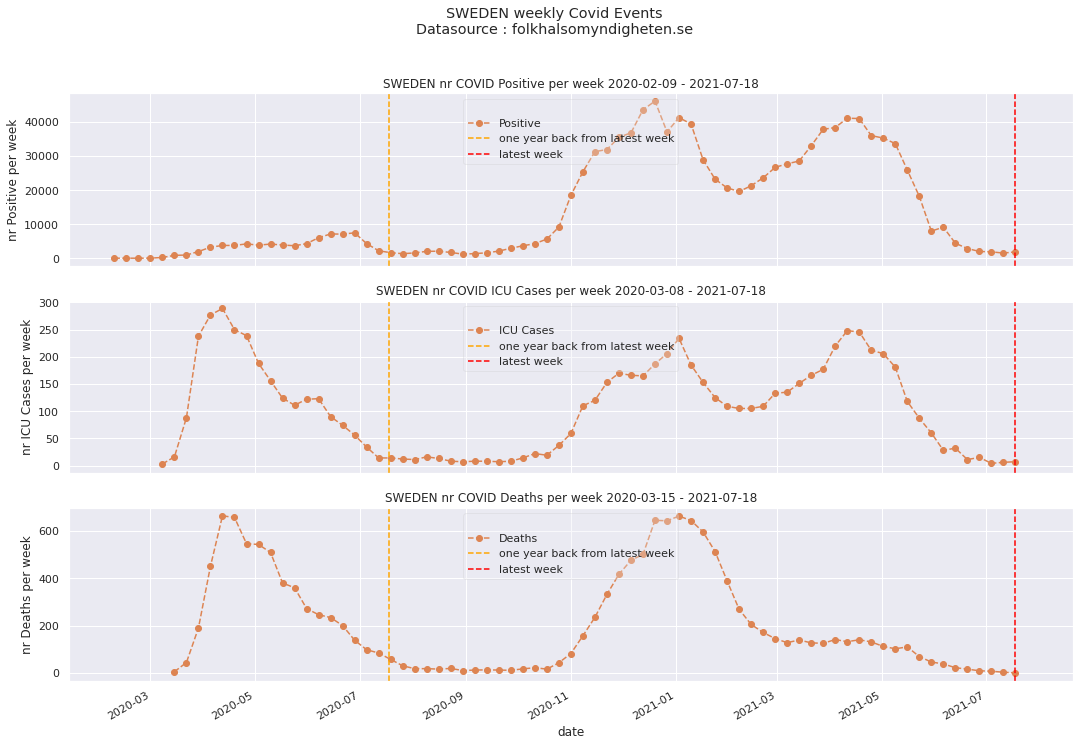

In [860]:
def covid_plots(df,title_sub,ax,full_date_range):
    last_good = df.index[-2].date()
    one_year_back_from_last = last_good - pd.DateOffset(years=1)
    print ('one year back : ',one_year_back_from_last)
    one_week_fwd = last_good + pd.DateOffset(weeks=1)
    
    ### put all 3 sublots with identical x-axis, covering the full period from first case ###
    ax.plot(full_date_range,[df.max().values[0]] * (len(full_date_range) ),alpha=0)

    title = "SWEDEN nr COVID " + title_sub + " per week {} - {}".format(df.index[0].date(),last_good)
    df[:-1].plot(style='o--',figsize=(18,12),title=title,ax=ax)
    ax.axvline(one_year_back_from_last,ls='dashed',color='orange',label='one year back from latest week')
    ax.axvline(last_good,color='red',ls='dashed',label='latest week')
    df.plot(ax=ax,alpha=0) # to extend the x-axis one more week for clarity #
    ax.set_ylabel('nr ' + title_sub + ' per week')
    ax.set_xlabel('date')
    ax.legend([None,title_sub,'one year back from latest week','latest week'],loc='upper center',
             framealpha=0.3)
    
fig,axes = plt.subplots(3,sharex=True)

full_date_range = pd.date_range('2020-02-09',fhm_weekly_positive.index[-1],freq='W')

covid_plots(fhm_weekly_positive,'Positive',axes[0],full_date_range)
covid_plots(fhm_icu_weekly,'ICU Cases',axes[1],full_date_range)
covid_plots(fhm_weekly_dead,'Deaths',axes[2],full_date_range)

plt.suptitle('SWEDEN weekly Covid Events\nDatasource : folkhalsomyndigheten.se')
plt.savefig('scb_excess_fhm_combined.jpg',format='jpg')

In [861]:
fhm_age_grp_impact = fhm_file.parse(sheet_name='Totalt antal per åldersgrupp',skipfooter=1)
fhm_age_grp_impact['10_year_bin'] = ['0-9','10-19','20-29','30-39','40-49','50-59','60-69','70-79','80-89','90+']
fhm_age_grp_impact.set_index('10_year_bin',inplace=True)
fhm_age_grp_impact.drop('Åldersgrupp',axis=1,inplace=True)
fhm_age_grp_impact

Totalt_antal_fall  Totalt_antal_intensivvårdade  \
10_year_bin                                                    
0-9                      30141                            32   
10-19                   144165                            48   
20-29                   189736                           196   
30-39                   193673                           339   
40-49                   200233                           808   
50-59                   174580                          1647   
60-69                    88185                          2196   
70-79                    40106                          1900   
80-89                    24470                           424   
90+                      10958                            10   

             Totalt_antal_avlidna  
10_year_bin                        
0-9                             9  
10-19                           6  
20-29                          22  
30-39                          47  
40-49                         116  
50-59                         373  
60-69                        1032  
70-79                        3278  
80-89                        5965  
90+                          3803

In [862]:
ten_year_bins = pd.cut(pop_age_df.loc['2020'].index,[-1,9,19,29,39,49,59,69,79,89,200],
       labels=['0-9','10-19','20-29','30-39','40-49','50-59','60-69','70-79','80-89','90+'])

ten_year_bins

['0-9', '0-9', '0-9', '0-9', '0-9', ..., '90+', '90+', '90+', '90+', '90+']
Length: 101
Categories (10, object): ['0-9' < '10-19' < '20-29' < '30-39' ... '60-69' < '70-79' < '80-89' < '90+']

In [863]:
twenty_twenty_pop = pop_age_df.loc['2020'].copy()
twenty_twenty_pop['10_year_bin'] = ten_year_bins
twenty_twenty_pop = twenty_twenty_pop.groupby('10_year_bin').sum()


In [864]:
dead_age_df

dead scb_prel_age_bin 10_y_bin  mid_bin
year num_age                                         
2002 0         313              -64      0-9        5
     1          24              -64      0-9        5
     2          25              -64      0-9        5
     3          10              -64      0-9        5
     4          10              -64      0-9        5
...            ...              ...      ...      ...
2020 96       1789              90+      90+       95
     97       1270              90+      90+       95
     98       1065              90+      90+       95
     99        759              90+      90+       95
     100      1247              90+      90+       95

[1919 rows x 4 columns]

In [865]:
dead_age_df['10_y_bin'] = pd.cut(
    dead_age_df.index.get_level_values(1),[-1,9,19,29,39,49,59,69,79,89,100],labels=fhm_age_grp_impact.index.values)

pop_age_df['10_y_bin'] = pd.cut(
    pop_age_df.index.get_level_values(1),[-1,9,19,29,39,49,59,69,79,89,100],labels=fhm_age_grp_impact.index.values)

dead_age_df.loc['2020'][8:12]

dead scb_prel_age_bin 10_y_bin  mid_bin
num_age                                         
8           5              -64      0-9        5
9           3              -64      0-9        5
10         10              -64    10-19       15
11         13              -64    10-19       15

In [866]:
baseline_15_18_10_y_deaths = dead_age_df.loc['2015' : '2018'].groupby(
    ['year','10_y_bin']).sum().groupby('10_y_bin').mean()

baseline_15_18_10_y_deaths

dead  mid_bin
10_y_bin                   
0-9         370.25     50.0
10-19       178.00    150.0
20-29       648.00    250.0
30-39       748.25    350.0
40-49      1466.00    450.0
50-59      3708.50    550.0
60-69      9821.75    650.0
70-79     20190.75    750.0
80-89     31819.75    850.0
90+       22560.25   1045.0

In [867]:
pop_age_df.loc['2015' : '2018']

pop scb_prel_age_bin 10_y_bin
year num_age                                  
2015 0         98836              -64      0-9
     1        117672              -64      0-9
     2        116902              -64      0-9
     3        117727              -64      0-9
     4        117084              -64      0-9
...              ...              ...      ...
2018 96         5249              90+      90+
     97         4116              90+      90+
     98         2893              90+      90+
     99         1502              90+      90+
     100        2247              90+      90+

[404 rows x 3 columns]

In [868]:
baseline_15_18_10_y_pop = pop_age_df.loc['2015' : '2018'].groupby(
    ['year','10_y_bin']).sum().groupby('10_y_bin').mean()

baseline_15_18_10_y_pop

pop
10_y_bin            
0-9       1183086.75
10-19     1105363.25
20-29     1340863.00
30-39     1274181.75
40-49     1302251.75
50-59     1257417.25
60-69     1132152.25
70-79      916023.75
80-89      418839.25
90+        101171.00

In [869]:
twenty_twenty_pop

pop
10_year_bin         
0-9          1199294
10-19        1198480
20-29        1295626
30-39        1398149
40-49        1301550
50-59        1310864
60-69        1107575
70-79        1011911
80-89         451009
90+           104025

In [870]:
baseline_15_18_mort =  baseline_15_18_10_y_deaths['dead'] / twenty_twenty_pop['pop']
baseline_15_18_mort =  baseline_15_18_10_y_deaths['dead'] / baseline_15_18_10_y_pop['pop']

baseline_15_18_mort

10_y_bin
0-9      0.000313
10-19    0.000161
20-29    0.000483
30-39    0.000587
40-49    0.001126
50-59    0.002949
60-69    0.008675
70-79    0.022042
80-89    0.075971
90+      0.222991
dtype: float64

/usr/local/lib64/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


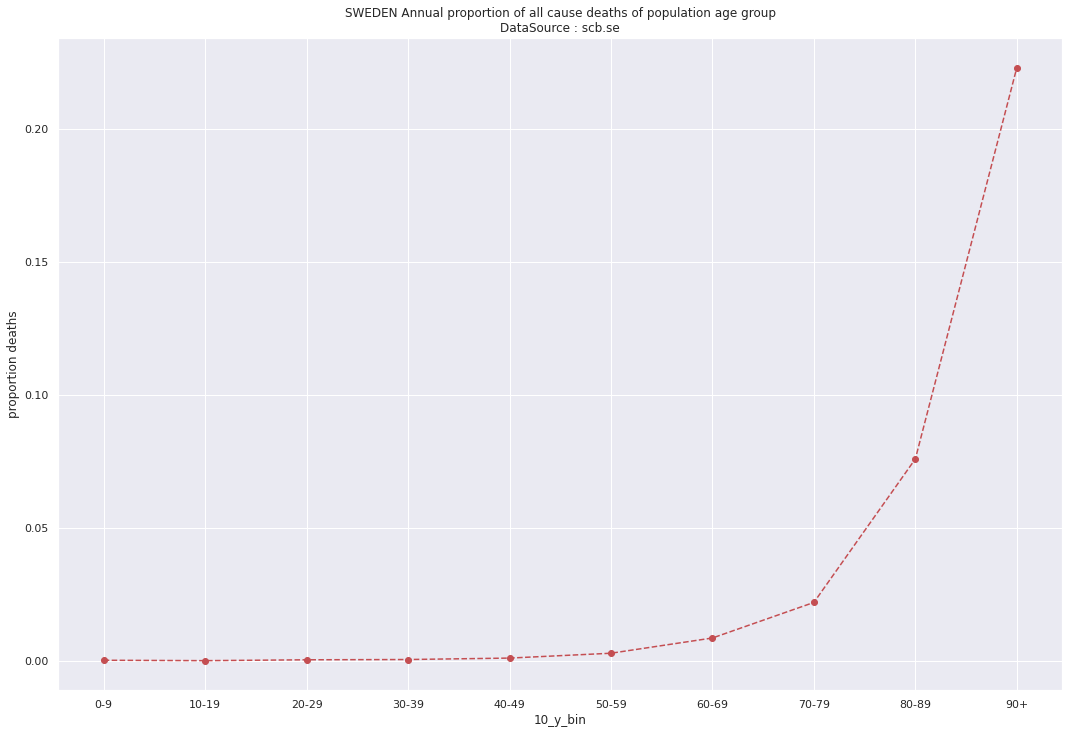

In [871]:
title = 'SWEDEN Annual proportion of all cause deaths of population age group\nDataSource : scb.se'
baseline_15_18_mort.plot(figsize=(18,12),style='ro--',title=title)
plt.xticks(range(len(baseline_15_18_mort)),baseline_15_18_mort.index)
plt.ylabel('proportion deaths')
plt.savefig('SCB_excess_proportion_all_cause_deaths.jpg',format='jpg')

In [872]:
fhm_age_grp_impact

Totalt_antal_fall  Totalt_antal_intensivvårdade  \
10_year_bin                                                    
0-9                      30141                            32   
10-19                   144165                            48   
20-29                   189736                           196   
30-39                   193673                           339   
40-49                   200233                           808   
50-59                   174580                          1647   
60-69                    88185                          2196   
70-79                    40106                          1900   
80-89                    24470                           424   
90+                      10958                            10   

             Totalt_antal_avlidna  
10_year_bin                        
0-9                             9  
10-19                           6  
20-29                          22  
30-39                          47  
40-49                         116  
50-59                         373  
60-69                        1032  
70-79                        3278  
80-89                        5965  
90+                          3803

In [873]:
fhm_age_grp_impact.sum()

Totalt_antal_fall               1096247
Totalt_antal_intensivvårdade       7600
Totalt_antal_avlidna              14651
dtype: int64

In [874]:
twenty_twenty_pop

pop
10_year_bin         
0-9          1199294
10-19        1198480
20-29        1295626
30-39        1398149
40-49        1301550
50-59        1310864
60-69        1107575
70-79        1011911
80-89         451009
90+           104025

In [875]:
### NOTE THAT SINCE THE AGE GRP IMPACT NUMBERS EXTEND TO 2021, THE FRACTION BELOW DOES NOT SHOW POPULATION 
### IMPACT 2020 ###

prop_impacted_YTD = fhm_age_grp_impact.div(twenty_twenty_pop['pop'],axis=0)
prop_impacted_YTD['CFR'] = fhm_age_grp_impact['Totalt_antal_avlidna'] / fhm_age_grp_impact['Totalt_antal_fall']

prop_impacted_YTD['baseline_15_18_all_cause_mortality'] = baseline_15_18_mort
prop_impacted_YTD['covid_base_ratio'] = prop_impacted_YTD['Totalt_antal_avlidna'] / prop_impacted_YTD['baseline_15_18_all_cause_mortality']
prop_impacted_YTD.to_pickle('covid_prop_impacted.pkl')
prop_impacted_YTD

Totalt_antal_fall  Totalt_antal_intensivvårdade  \
10_year_bin                                                    
0-9                   0.025132                      0.000027   
10-19                 0.120290                      0.000040   
20-29                 0.146443                      0.000151   
30-39                 0.138521                      0.000242   
40-49                 0.153842                      0.000621   
50-59                 0.133179                      0.001256   
60-69                 0.079620                      0.001983   
70-79                 0.039634                      0.001878   
80-89                 0.054256                      0.000940   
90+                   0.105340                      0.000096   

             Totalt_antal_avlidna       CFR  \
10_year_bin                                   
0-9                      0.000008  0.000299   
10-19                    0.000005  0.000042   
20-29                    0.000017  0.000116   
30-39                    0.000034  0.000243   
40-49                    0.000089  0.000579   
50-59                    0.000285  0.002137   
60-69                    0.000932  0.011703   
70-79                    0.003239  0.081733   
80-89                    0.013226  0.243768   
90+                      0.036559  0.347052   

             baseline_15_18_all_cause_mortality  covid_base_ratio  
10_year_bin                                                        
0-9                                    0.000313          0.023979  
10-19                                  0.000161          0.031089  
20-29                                  0.000483          0.035136  
30-39                                  0.000587          0.057244  
40-49                                  0.001126          0.079170  
50-59                                  0.002949          0.096479  
60-69                                  0.008675          0.107405  
70-79                                  0.022042          0.146967  
80-89                                  0.075971          0.174091  
90+                                    0.222991          0.163946

In [876]:
odds_impacted_YTD = 1 / prop_impacted_YTD[['Totalt_antal_fall','Totalt_antal_intensivvårdade',
                                      'Totalt_antal_avlidna']]

odds_impacted_YTD

Totalt_antal_fall  Totalt_antal_intensivvårdade  \
10_year_bin                                                    
0-9                  39.789456                  37477.937500   
10-19                 8.313252                  24968.333333   
20-29                 6.828572                   6610.336735   
30-39                 7.219122                   4124.333333   
40-49                 6.500177                   1610.829208   
50-59                 7.508672                    795.910140   
60-69                12.559676                    504.360200   
70-79                25.230913                    532.584737   
80-89                18.431099                   1063.700472   
90+                   9.493064                  10402.500000   

             Totalt_antal_avlidna  
10_year_bin                        
0-9                 133254.888889  
10-19               199746.666667  
20-29                58892.090909  
30-39                29747.851064  
40-49                11220.258621  
50-59                 3514.380697  
60-69                 1073.231589  
70-79                  308.697682  
80-89                   75.609220  
90+                     27.353405

array([<AxesSubplot:title={'center':'Totalt_antal_fall'}, xlabel='10_year_bin'>,
       <AxesSubplot:title={'center':'Totalt_antal_intensivvårdade'}, xlabel='10_year_bin'>,
       <AxesSubplot:title={'center':'Totalt_antal_avlidna'}, xlabel='10_year_bin'>],
      dtype=object)

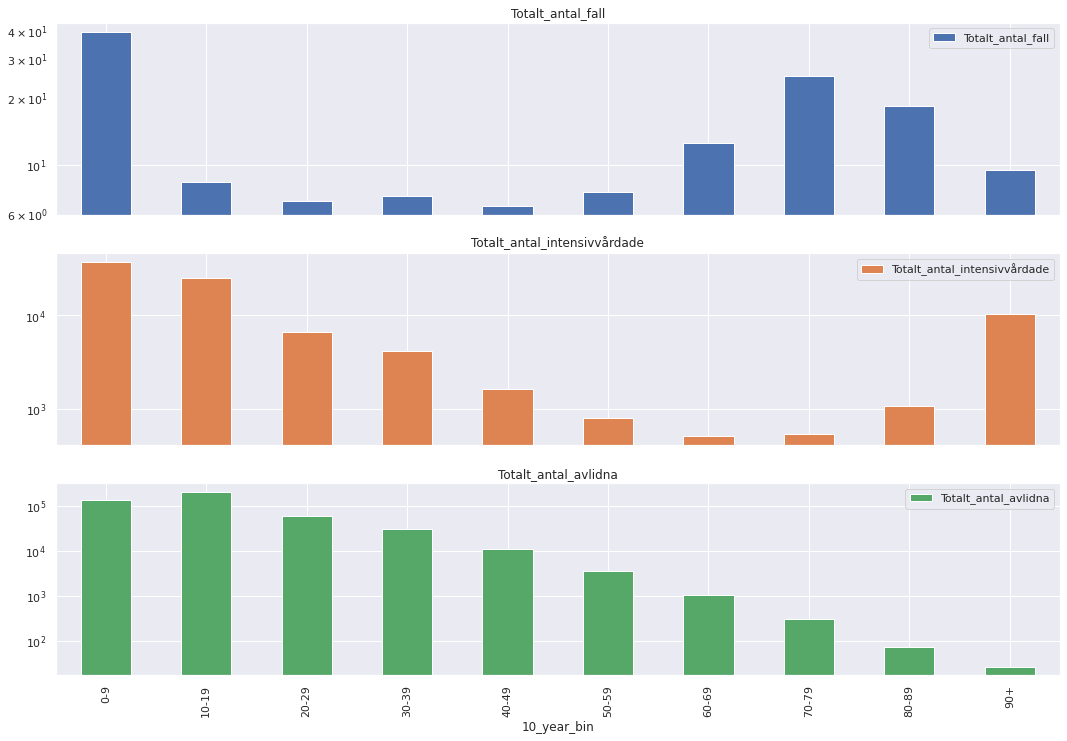

In [877]:
odds_impacted_YTD.plot(kind='bar',subplots=True,logy=True,figsize=(18,12))

/usr/local/lib64/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


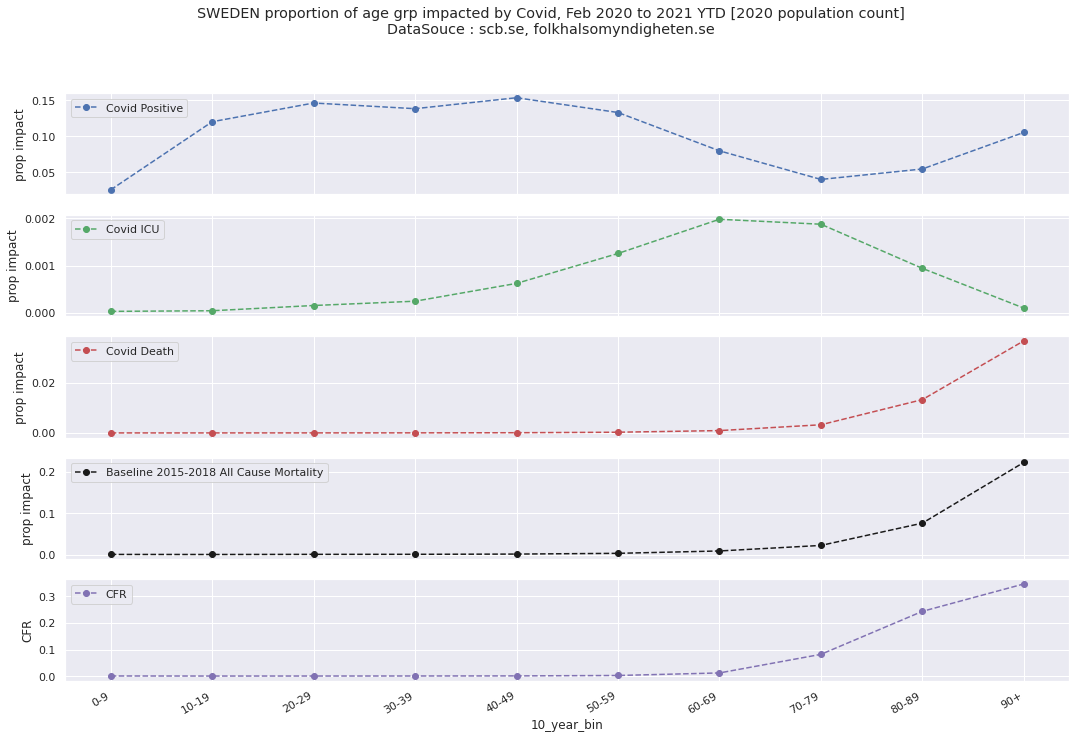

In [878]:
creds = '\nDataSouce : scb.se, folkhalsomyndigheten.se'
title = 'SWEDEN proportion of age grp impacted by Covid, Feb 2020 to 2021 YTD [2020 population count]' + creds

legend = ['Covid Positive','Covid ICU','Covid Death','Baseline 2015-2018 All Cause Mortality','CFR']

axes = prop_impacted_YTD.plot(subplots=True,figsize=(18,12),style=['bo--','go--','ro--','ko--','mo--'],
                             title=title,label=legend,
                              y=['Totalt_antal_fall','Totalt_antal_intensivvårdade',
                                           'Totalt_antal_avlidna','baseline_15_18_all_cause_mortality','CFR'])


for i,a in enumerate(axes):
    a.set_xticks(range(len(prop_impacted_YTD)))
    a.set_xticklabels(prop_impacted_YTD.index)
    a.set_ylabel('prop impact')
    a.legend(loc='upper left')
    
axes[-1].set_ylabel('CFR')
plt.savefig('SCB_excess_covid_impact.jpg',format='jpg')

In [879]:
fhm_age_grp_impact

Totalt_antal_fall  Totalt_antal_intensivvårdade  \
10_year_bin                                                    
0-9                      30141                            32   
10-19                   144165                            48   
20-29                   189736                           196   
30-39                   193673                           339   
40-49                   200233                           808   
50-59                   174580                          1647   
60-69                    88185                          2196   
70-79                    40106                          1900   
80-89                    24470                           424   
90+                      10958                            10   

             Totalt_antal_avlidna  
10_year_bin                        
0-9                             9  
10-19                           6  
20-29                          22  
30-39                          47  
40-49                         116  
50-59                         373  
60-69                        1032  
70-79                        3278  
80-89                        5965  
90+                          3803

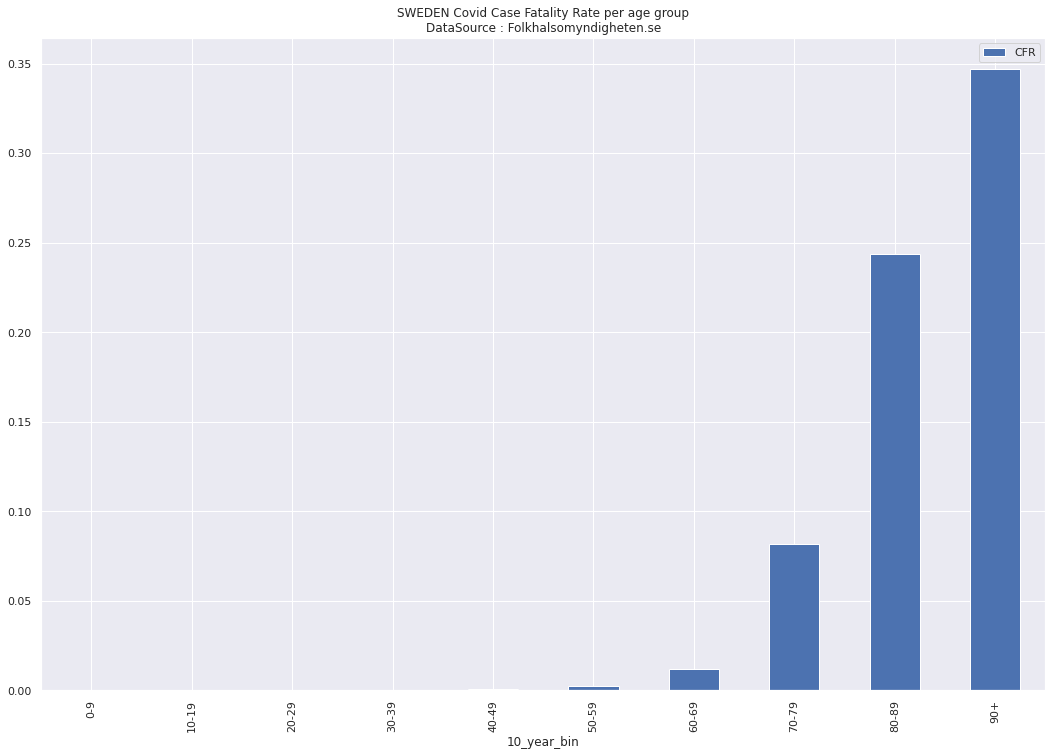

In [880]:
title = 'SWEDEN Covid Case Fatality Rate per age group\nDataSource : Folkhalsomyndigheten.se'
prop_impacted_YTD.plot(y='CFR',kind='bar',figsize=(18,12),title=title)
plt.savefig('scb_error_cfr.jpg',format='jpg')

In [881]:
fhm_age_grp_impact['bin_mid'] = range(5,100,10)
fhm_age_grp_impact

Totalt_antal_fall  Totalt_antal_intensivvårdade  \
10_year_bin                                                    
0-9                      30141                            32   
10-19                   144165                            48   
20-29                   189736                           196   
30-39                   193673                           339   
40-49                   200233                           808   
50-59                   174580                          1647   
60-69                    88185                          2196   
70-79                    40106                          1900   
80-89                    24470                           424   
90+                      10958                            10   

             Totalt_antal_avlidna  bin_mid  
10_year_bin                                 
0-9                             9        5  
10-19                           6       15  
20-29                          22       25  
30-39                          47       35  
40-49                         116       45  
50-59                         373       55  
60-69                        1032       65  
70-79                        3278       75  
80-89                        5965       85  
90+                          3803       95

In [882]:
### adjust 2020 pop to correspond to the FHM numbers that extend beyond 2020 ###
fhm_last_data = pd.to_datetime(fhm_file.sheet_names[-1].strip('FOHM ')) - pd.DateOffset(days=1)
print (fhm_last_data)

fhm_last_day_of_year = fhm_last_data.dayofyear
print (fhm_last_day_of_year)
fhm_pop_factor = (365 + fhm_last_day_of_year) / 365
print (fhm_pop_factor)

2021-07-21 00:00:00
202
1.5534246575342465


In [883]:
### adjust population size to account for FHM data covering more than a year ###
prop_impacted_YTD_adj = fhm_age_grp_impact.div(twenty_twenty_pop['pop'] * fhm_pop_factor,axis=0)
prop_impacted_YTD_adj['CFR'] = fhm_age_grp_impact['Totalt_antal_avlidna'] / fhm_age_grp_impact['Totalt_antal_fall']

prop_impacted_YTD_adj['baseline_15_18_all_cause_mortality'] = baseline_15_18_mort
print (prop_impacted_YTD_adj['Totalt_antal_avlidna'])
prop_impacted_YTD_adj.to_pickle('covid_prop_impacted_adj.pkl')
prop_impacted_YTD_adj

10_year_bin
0-9      0.000005
10-19    0.000003
20-29    0.000011
30-39    0.000022
40-49    0.000057
50-59    0.000183
60-69    0.000600
70-79    0.002085
80-89    0.008514
90+      0.023534
Name: Totalt_antal_avlidna, dtype: float64


Totalt_antal_fall  Totalt_antal_intensivvårdade  \
10_year_bin                                                    
0-9                   0.016179                      0.000017   
10-19                 0.077435                      0.000026   
20-29                 0.094271                      0.000097   
30-39                 0.089171                      0.000156   
40-49                 0.099034                      0.000400   
50-59                 0.085733                      0.000809   
60-69                 0.051254                      0.001276   
70-79                 0.025514                      0.001209   
80-89                 0.034927                      0.000605   
90+                   0.067812                      0.000062   

             Totalt_antal_avlidna   bin_mid       CFR  \
10_year_bin                                             
0-9                      0.000005  0.000003  0.000299   
10-19                    0.000003  0.000008  0.000042   
20-29                    0.000011  0.000012  0.000116   
30-39                    0.000022  0.000016  0.000243   
40-49                    0.000057  0.000022  0.000579   
50-59                    0.000183  0.000027  0.002137   
60-69                    0.000600  0.000038  0.011703   
70-79                    0.002085  0.000048  0.081733   
80-89                    0.008514  0.000121  0.243768   
90+                      0.023534  0.000588  0.347052   

             baseline_15_18_all_cause_mortality  
10_year_bin                                      
0-9                                    0.000313  
10-19                                  0.000161  
20-29                                  0.000483  
30-39                                  0.000587  
40-49                                  0.001126  
50-59                                  0.002949  
60-69                                  0.008675  
70-79                                  0.022042  
80-89                                  0.075971  
90+                                    0.222991

In [884]:
print (prop_impacted_YTD - prop_impacted_YTD_adj)
prop_impacted_YTD

             CFR  Totalt_antal_avlidna  Totalt_antal_fall  \
10_year_bin                                                 
0-9          0.0              0.000003           0.008954   
10-19        0.0              0.000002           0.042855   
20-29        0.0              0.000006           0.052172   
30-39        0.0              0.000012           0.049350   
40-49        0.0              0.000032           0.054808   
50-59        0.0              0.000101           0.047447   
60-69        0.0              0.000332           0.028365   
70-79        0.0              0.001154           0.014120   
80-89        0.0              0.004712           0.019329   
90+          0.0              0.013024           0.037529   

             Totalt_antal_intensivvårdade  baseline_15_18_all_cause_mortality  \
10_year_bin                                                                     
0-9                              0.000010                                 0.0   
10-19                   

Totalt_antal_fall  Totalt_antal_intensivvårdade  \
10_year_bin                                                    
0-9                   0.025132                      0.000027   
10-19                 0.120290                      0.000040   
20-29                 0.146443                      0.000151   
30-39                 0.138521                      0.000242   
40-49                 0.153842                      0.000621   
50-59                 0.133179                      0.001256   
60-69                 0.079620                      0.001983   
70-79                 0.039634                      0.001878   
80-89                 0.054256                      0.000940   
90+                   0.105340                      0.000096   

             Totalt_antal_avlidna       CFR  \
10_year_bin                                   
0-9                      0.000008  0.000299   
10-19                    0.000005  0.000042   
20-29                    0.000017  0.000116   
30-39                    0.000034  0.000243   
40-49                    0.000089  0.000579   
50-59                    0.000285  0.002137   
60-69                    0.000932  0.011703   
70-79                    0.003239  0.081733   
80-89                    0.013226  0.243768   
90+                      0.036559  0.347052   

             baseline_15_18_all_cause_mortality  covid_base_ratio  
10_year_bin                                                        
0-9                                    0.000313          0.023979  
10-19                                  0.000161          0.031089  
20-29                                  0.000483          0.035136  
30-39                                  0.000587          0.057244  
40-49                                  0.001126          0.079170  
50-59                                  0.002949          0.096479  
60-69                                  0.008675          0.107405  
70-79                                  0.022042          0.146967  
80-89                                  0.075971          0.174091  
90+                                    0.222991          0.163946

/usr/local/lib64/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


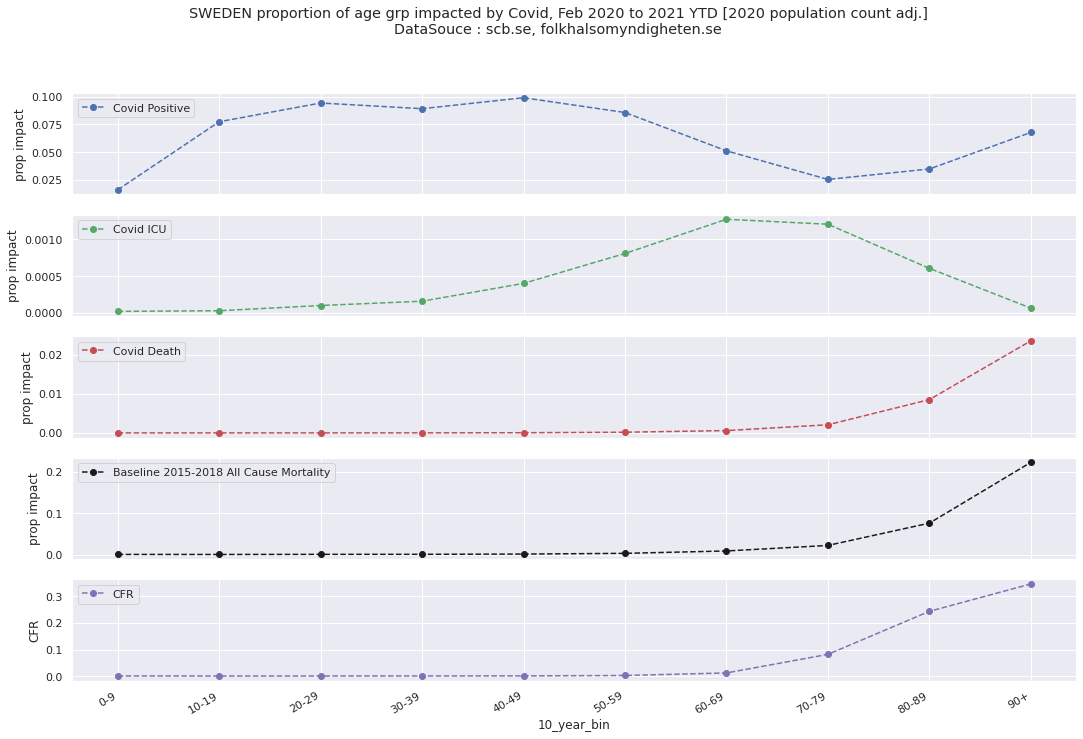

In [885]:
creds = '\nDataSouce : scb.se, folkhalsomyndigheten.se'
title = 'SWEDEN proportion of age grp impacted by Covid, Feb 2020 to 2021 YTD [2020 population count adj.]' + creds

legend = ['Covid Positive','Covid ICU','Covid Death','Baseline 2015-2018 All Cause Mortality','CFR']

axes = prop_impacted_YTD_adj.plot(subplots=True,figsize=(18,12),style=['bo--','go--','ro--','ko--','mo--'],
                             title=title,label=legend,
                              y=['Totalt_antal_fall','Totalt_antal_intensivvårdade',
                                           'Totalt_antal_avlidna','baseline_15_18_all_cause_mortality','CFR'])


for i,a in enumerate(axes):
    a.set_xticks(range(len(prop_impacted_YTD)))
    a.set_xticklabels(prop_impacted_YTD.index)
    a.set_ylabel('prop impact')
    a.legend(loc='upper left')
    
axes[-1].set_ylabel('CFR')
plt.savefig('SCB_excess_covid_impact_adj.jpg',format='jpg')

In [886]:
fhm_age_flat = np.repeat(fhm_age_grp_impact['bin_mid'],fhm_age_grp_impact['Totalt_antal_avlidna'])
fhm_age_flat

10_year_bin
0-9     5
0-9     5
0-9     5
0-9     5
0-9     5
       ..
90+    95
90+    95
90+    95
90+    95
90+    95
Name: bin_mid, Length: 14651, dtype: int64

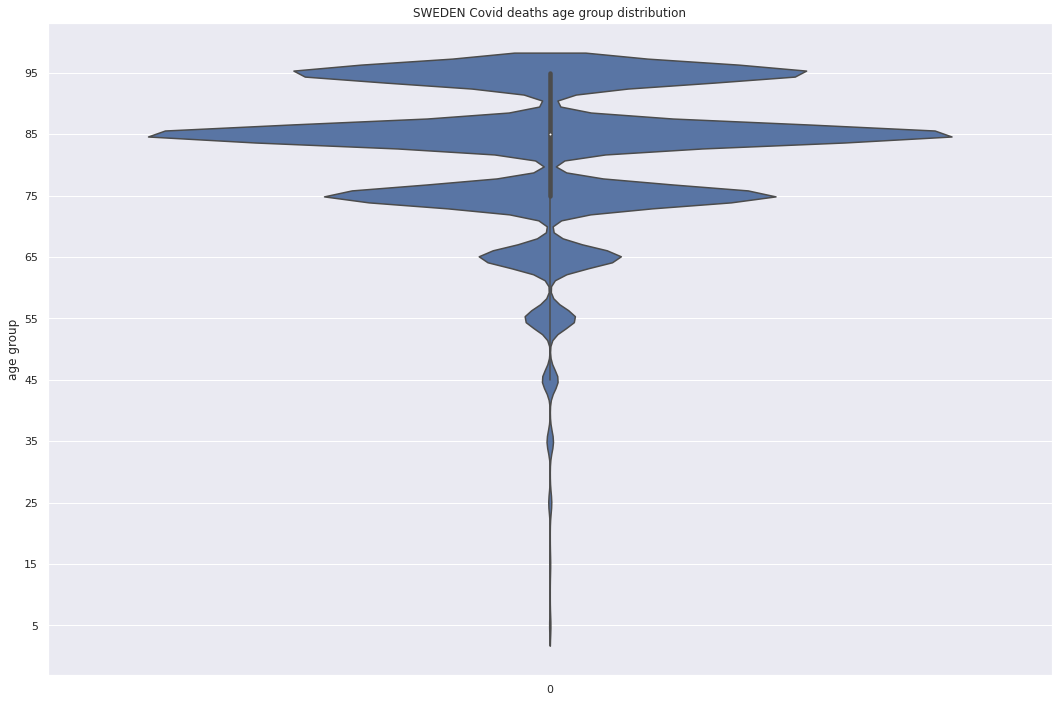

In [887]:
fig,ax = plt.subplots(figsize=(18,12))
sns.violinplot(data=fhm_age_flat,ax=ax)
plt.title('SWEDEN Covid deaths age group distribution')
plt.ylabel('age group')

_=plt.yticks(range(5,100,10),range(5,100,10))

In [888]:
fhm_age_flat.describe()

count    14651.000000
mean        82.540782
std         11.198776
min          5.000000
25%         75.000000
50%         85.000000
75%         95.000000
max         95.000000
Name: bin_mid, dtype: float64

In [889]:
def mid_bin(x):
    return pd.Series(np.array(x))

mids = mid_bin(dead_age_df['10_y_bin']).apply(lambda x : int(x[0] + '5'))

dead_age_df['mid_bin'] = mids.values
dead_age_df

dead scb_prel_age_bin 10_y_bin  mid_bin
year num_age                                         
2002 0         313              -64      0-9        5
     1          24              -64      0-9        5
     2          25              -64      0-9        5
     3          10              -64      0-9        5
     4          10              -64      0-9        5
...            ...              ...      ...      ...
2020 96       1789              90+      90+       95
     97       1270              90+      90+       95
     98       1065              90+      90+       95
     99        759              90+      90+       95
     100      1247              90+      90+       95

[1919 rows x 4 columns]

In [890]:
baseline_age_dead = dead_age_df.loc['2015':'2018'].groupby('mid_bin').mean()
baseline_age_dead

dead
mid_bin             
5          37.025000
15         17.800000
25         64.800000
35         74.825000
45        146.600000
55        370.850000
65        982.175000
75       2019.075000
85       3181.975000
95       2050.931818

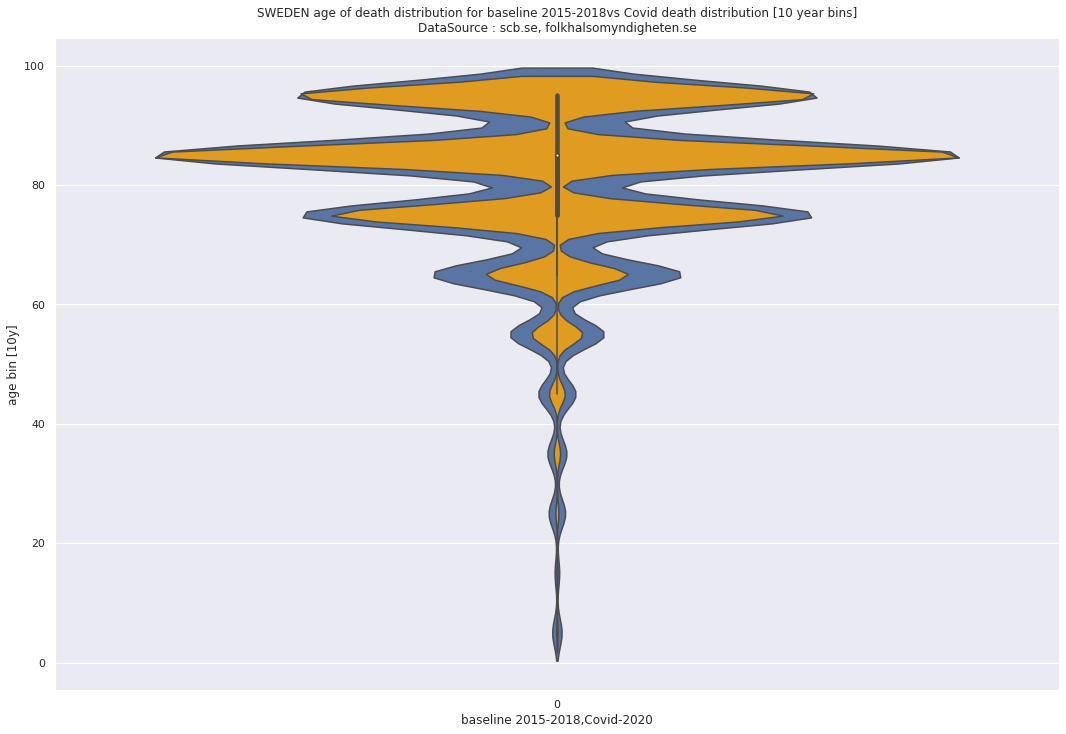

In [891]:
fig,ax = plt.subplots(figsize=(18,12))

title = 'SWEDEN age of death distribution for baseline 2015-2018' +\
'vs Covid death distribution [10 year bins]\nDataSource : scb.se, folkhalsomyndigheten.se'

baseline_age_flat = pd.Series(np.repeat(baseline_age_dead.index.values,np.round(baseline_age_dead['dead'],0).astype(int)))
sns.violinplot(data=baseline_age_flat,ax=ax)
sns.violinplot(data=fhm_age_flat,color='orange')
plt.title(title)
plt.ylabel('age bin [10y]')
plt.xlabel('baseline 2015-2018,Covid-2020')

plt.savefig('SCB_excess_covid_all_cause_deaths_dist_violin.jpg',format='jpg')

In [892]:
grp_corrected_weekly = grp_daily_corrected.loc['2015' : '2020']
grp_corrected_weekly = grp_corrected_weekly.resample('W').sum()
weekly_prop = grp_corrected_weekly.groupby(grp_corrected_weekly.index.year).transform(lambda x : x / x.sum())
weekly_prop

-64     65-79     80-89       90+
date                                              
2015-01-04  0.011649  0.011527  0.012647  0.013509
2015-01-11  0.019670  0.021334  0.021491  0.025140
2015-01-18  0.019956  0.020413  0.023013  0.022438
2015-01-25  0.020911  0.020813  0.022664  0.022530
2015-02-01  0.019670  0.022174  0.022949  0.022484
...              ...       ...       ...       ...
2020-12-06  0.016525  0.021847  0.023778  0.024639
2020-12-13  0.020762  0.021263  0.023600  0.022589
2020-12-20  0.017372  0.024801  0.025345  0.025016
2020-12-27  0.020974  0.023926  0.025434  0.025183
2021-01-03  1.000000  1.000000  1.000000  1.000000

[314 rows x 4 columns]

array([<AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>,
       <AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>],
      dtype=object)

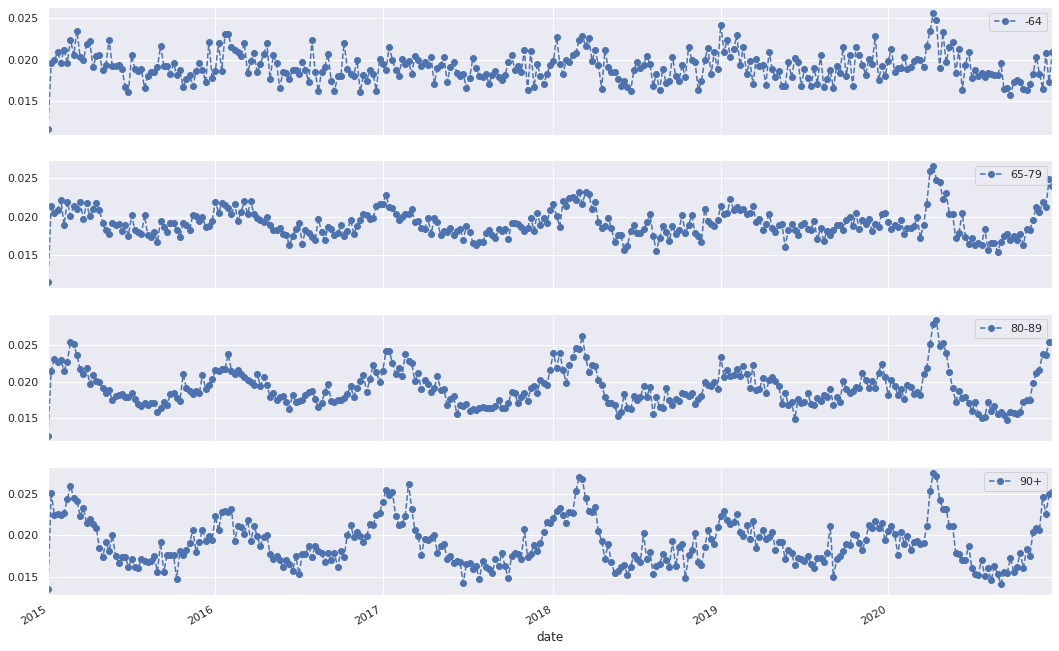

In [893]:
weekly_prop[:-1].plot(figsize=(18,12),subplots=True,style='o--')

<ipython-input-894-ec2b145167a7>:1: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  last_4_weeks = weekly_prop.loc[weekly_prop.index.week.isin([49,50,51,52,53])]


<AxesSubplot:xlabel='date'>

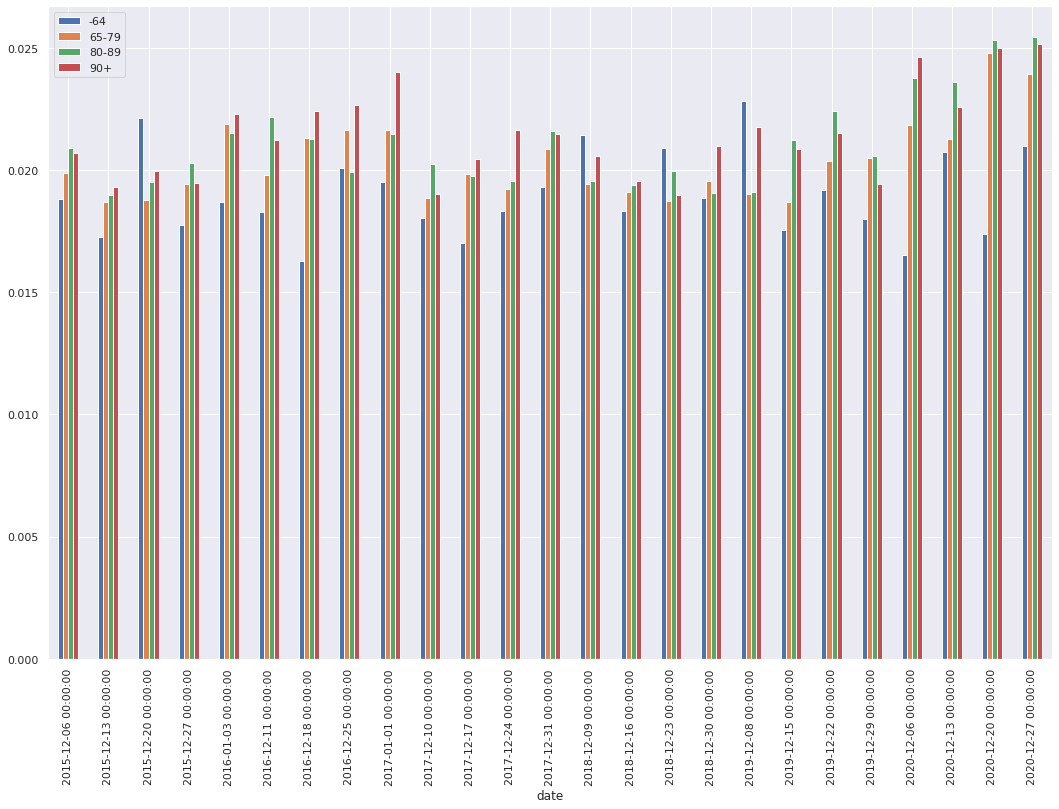

In [894]:
last_4_weeks = weekly_prop.loc[weekly_prop.index.week.isin([49,50,51,52,53])]
last_4_weeks[:-1].plot(kind='bar',figsize=(18,12))

In [895]:
last_week_baseline = pd.DataFrame()

yearly_last_week_grps = last_4_weeks.groupby(last_4_weeks.index.year)
for y in range(2015,2019):
    g = yearly_last_week_grps.get_group(y)
    last_week_baseline = pd.concat([last_week_baseline,g])
    
last_week_baseline['week'] = last_week_baseline.index.week
last_week_baseline = last_week_baseline.groupby('week').mean()
last_week_baseline

<ipython-input-895-e7e66af50d27>:8: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  last_week_baseline['week'] = last_week_baseline.index.week


-64     65-79     80-89       90+
week                                        
49    0.019138  0.019507  0.020722  0.020389
50    0.017234  0.019738  0.019856  0.020436
51    0.020366  0.019597  0.019741  0.020820
52    0.018865  0.020377  0.020597  0.021491
53    0.018694  0.021900  0.021538  0.022295

In [896]:
twenty_twenty_last_4_weeks = yearly_last_week_grps.get_group(2020)
twenty_twenty_last_4_weeks.index = range(49,53)
twenty_twenty_last_4_weeks

-64     65-79     80-89       90+
49  0.016525  0.021847  0.023778  0.024639
50  0.020762  0.021263  0.023600  0.022589
51  0.017372  0.024801  0.025345  0.025016
52  0.020974  0.023926  0.025434  0.025183

Text(0.5, 0, 'week nr')

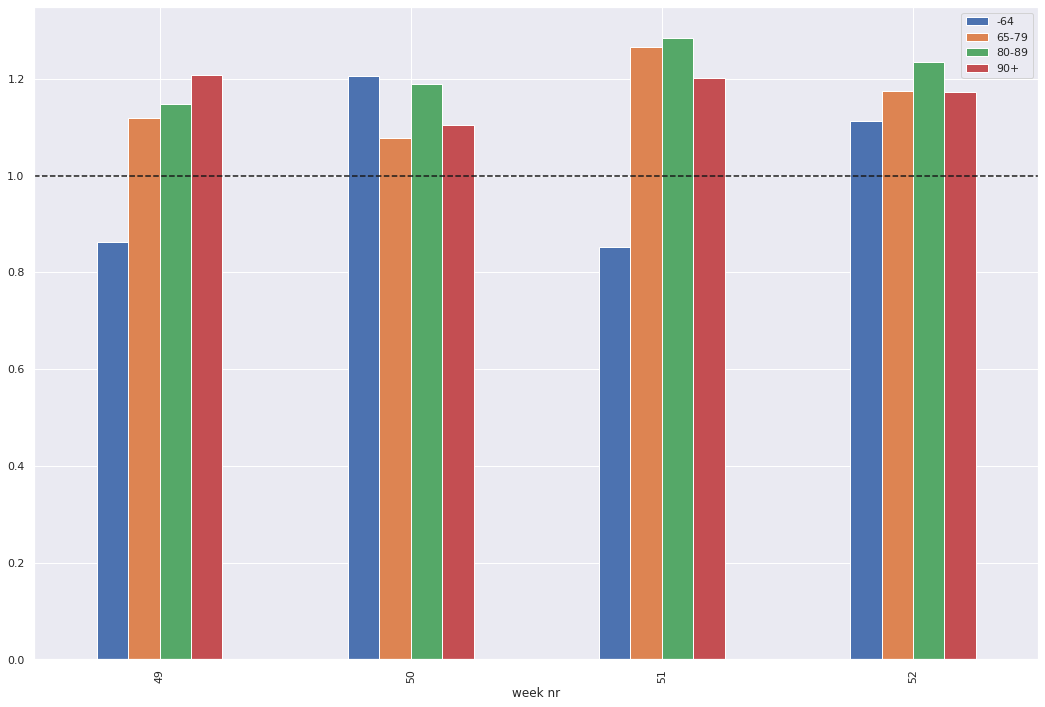

In [897]:
last_4_vs_baseline = twenty_twenty_last_4_weeks / last_week_baseline
last_4_vs_baseline.dropna().plot(kind='bar',figsize=(18,12))
plt.axhline(1,ls='dashed',color='k')
plt.xlabel('week nr')

In [898]:
last_4_weeks

-64     65-79     80-89       90+
date                                              
2015-12-06  0.018810  0.019893  0.020889  0.020698
2015-12-13  0.017283  0.018692  0.018987  0.019324
2015-12-20  0.022152  0.018772  0.019526  0.019965
2015-12-27  0.017760  0.019452  0.020287  0.019461
2016-01-03  0.018694  0.021900  0.021538  0.022295
2016-12-11  0.018285  0.019814  0.022190  0.021237
2016-12-18  0.016297  0.021320  0.021284  0.022407
2016-12-25  0.020073  0.021637  0.019926  0.022677
2017-01-01  0.019534  0.021646  0.021468  0.024035
2017-12-10  0.018029  0.018880  0.020251  0.019033
2017-12-17  0.017033  0.019845  0.019755  0.020451
2017-12-24  0.018328  0.019227  0.019537  0.021654
2017-12-31  0.019324  0.020849  0.021587  0.021482
2018-12-09  0.021429  0.019443  0.019558  0.020587
2018-12-16  0.018323  0.019097  0.019399  0.019564
2018-12-23  0.020911  0.018750  0.019974  0.018986
2018-12-30  0.018841  0.019559  0.019047  0.020987
2019-12-08  0.022823  0.019043  0.019095  0.021750
2019-12-15  0.017556  0.018685  0.021221  0.020871
2019-12-22  0.019202  0.020358  0.022416  0.021519
2019-12-29  0.017995  0.020477  0.020590  0.019436
2020-12-06  0.016525  0.021847  0.023778  0.024639
2020-12-13  0.020762  0.021263  0.023600  0.022589
2020-12-20  0.017372  0.024801  0.025345  0.025016
2020-12-27  0.020974  0.023926  0.025434  0.025183
2021-01-03  1.000000  1.000000  1.000000  1.000000

array([<AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>,
       <AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>],
      dtype=object)

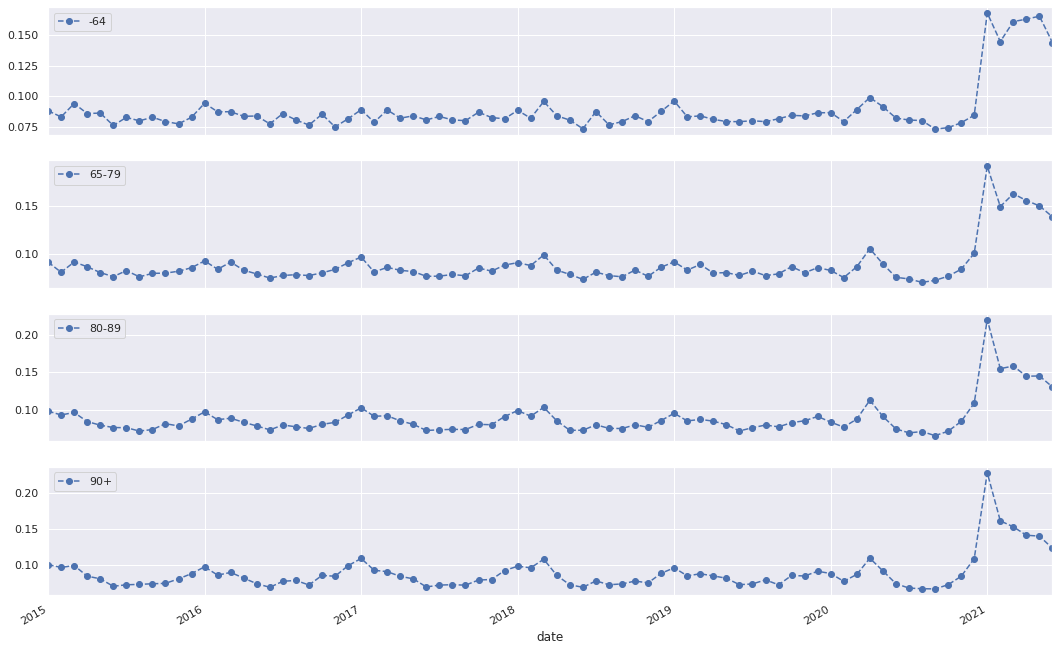

In [899]:
monthly_prop = grp_daily_corrected_monthly.groupby(
    grp_daily_corrected_monthly.index.year).transform(lambda x : x / x.sum())

monthly_prop[:-1].plot(subplots=True,figsize=(18,12),style='o--')

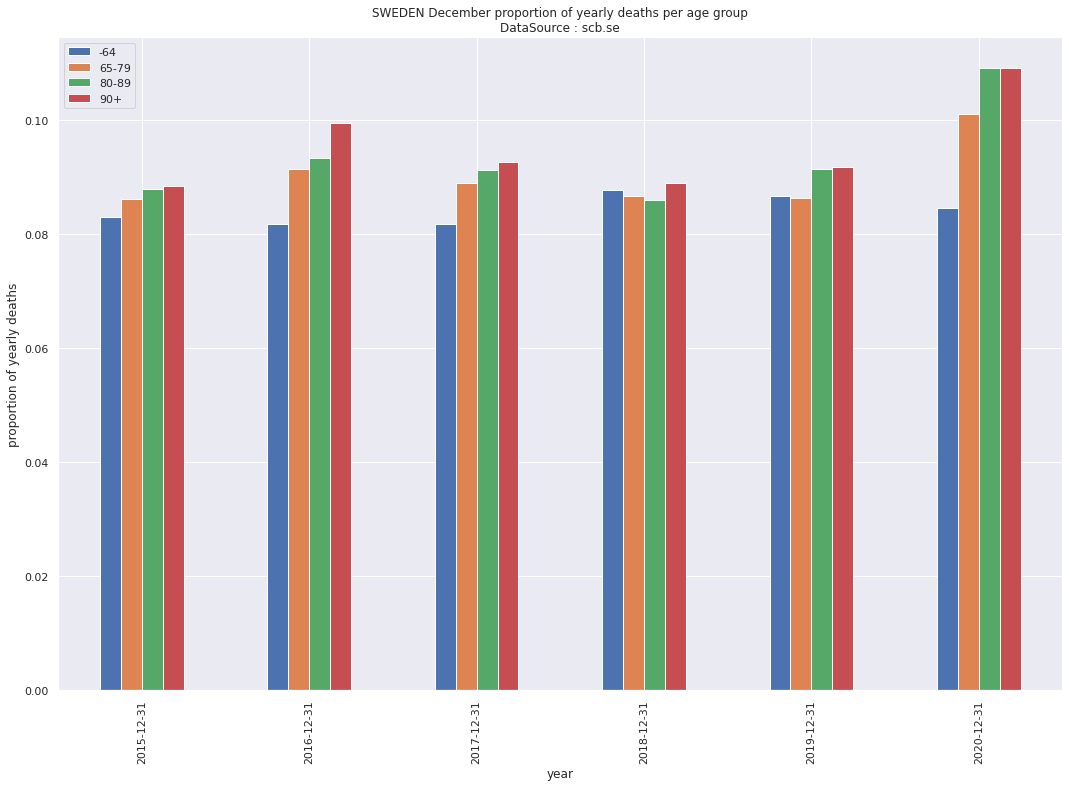

In [900]:
title = 'SWEDEN December proportion of yearly deaths per age group\nDataSource : scb.se'
decembers = monthly_prop.loc[monthly_prop.index.month==12]
decembers.plot(kind='bar',figsize=(18,12),title=title)
plt.ylabel('proportion of yearly deaths')
plt.xlabel('year')
_= plt.xticks(range(len(decembers)),decembers.index.date)

In [901]:
dead_age_df.groupby([dead_age_df.index.get_level_values(0),'scb_prel_age_bin']).sum()

dead  mid_bin
year scb_prel_age_bin                
2002 -64               13119     2125
     65-79             26997     1075
     80-89             37509      850
     90+               17384     1045
2003 -64               13094     2125
...                      ...      ...
2019 90+               21754     1045
2020 -64               10455     2125
     65-79             28795     1075
     80-89             34574      850
     90+               24300     1045

[76 rows x 2 columns]

array([<AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>,
       <AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>],
      dtype=object)

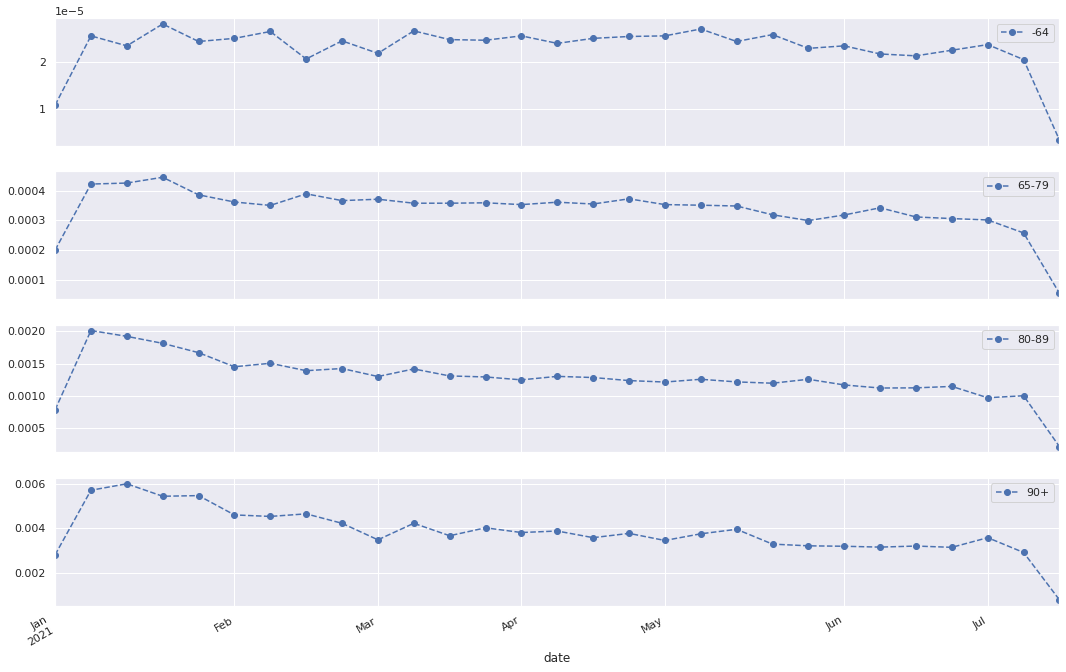

In [902]:
axes = mortality_all_grp_TD.loc['2021'].resample('W').sum().plot(subplots=True,figsize=(18,12),style='o--')
axes

-64     65-79     80-89       90+
date                                                  
2015-01-01  4.868823e-06  0.000053  0.000247  0.000810
2015-01-02  3.026566e-06  0.000053  0.000272  0.000630
2015-01-03  5.263592e-06  0.000056  0.000210  0.000750
2015-01-04  2.894976e-06  0.000040  0.000247  0.000760
2015-01-05  3.158155e-06  0.000055  0.000220  0.000760
...                  ...       ...       ...       ...
2021-07-12  1.609481e-06  0.000029  0.000085  0.000367
2021-07-13  5.364938e-07  0.000011  0.000045  0.000222
2021-07-14  5.364938e-07  0.000008  0.000054  0.000087
2021-07-15  4.023703e-07  0.000005  0.000034  0.000097
2021-07-16  1.341234e-07  0.000000  0.000000  0.000000

[2389 rows x 4 columns]

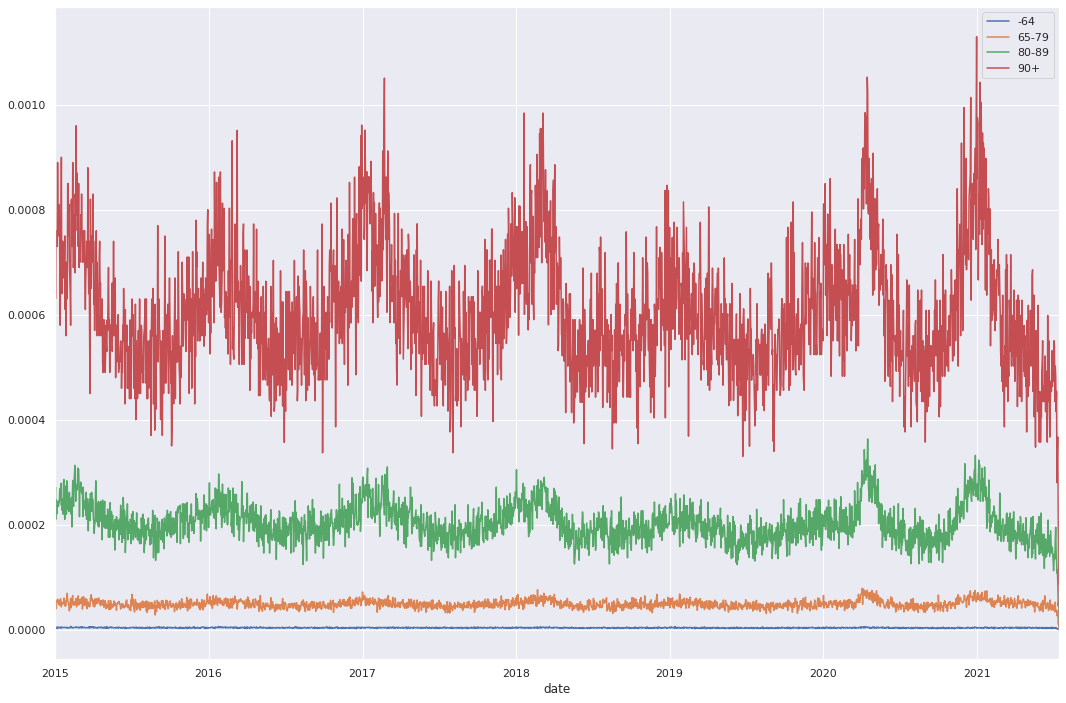

In [903]:
mortality_all_grp_TD.plot(figsize=(18,12))
mortality_all_grp_TD

In [904]:
### there are 20 years. By using 366 days per year (i.e. having Feb 29 each year) while only 5 years
### (2020,2016,2012,2008,2004) are true leap years. So, we overshoot by 15 days in replicating the population.
### So, we must remove the 59:th day for all years except the true leap years. 

daily_age_grp_pop = np.tile(pop_age_scb_prel_df.unstack().droplevel(0,axis=1).values,366).reshape(-1,4)

# day number of feb 29:th each year
day_59 = np.array([(366 * i + 59)  for i in range(20)]) 

# leap years 2002-2021
leap = np.array([False,False,True,False,False,False,True,False,False,False,True,False,False,False,True,
       False,False,False,True,False])

day_59[~leap]

array([  59,  425, 1157, 1523, 1889, 2621, 2987, 3353, 4085, 4451, 4817,
       5549, 5915, 6281, 7013])

In [905]:
daily_age_grp_pop = np.delete(daily_age_grp_pop,day_59[~leap],axis=0)
daily_age_grp_pop

array([[7391436, 1068690,  407646,   71595],
       [7391436, 1068690,  407646,   71595],
       [7391436, 1068690,  407646,   71595],
       ...,
       [8273794, 1549655,  451009,  104025],
       [8273794, 1549655,  451009,  104025],
       [8273794, 1549655,  451009,  104025]])

In [906]:
pop_age_scb_prel_df_daily = pd.DataFrame(
    daily_age_grp_pop,
columns=monthly_age_grp_mortality_long.columns,index=pd.date_range('2002-01-01','2021-12-31',freq='D'))

pop_age_scb_prel_df_daily

-64    65-79   80-89     90+
2002-01-01  7391436  1068690  407646   71595
2002-01-02  7391436  1068690  407646   71595
2002-01-03  7391436  1068690  407646   71595
2002-01-04  7391436  1068690  407646   71595
2002-01-05  7391436  1068690  407646   71595
...             ...      ...     ...     ...
2021-12-27  8273794  1549655  451009  104025
2021-12-28  8273794  1549655  451009  104025
2021-12-29  8273794  1549655  451009  104025
2021-12-30  8273794  1549655  451009  104025
2021-12-31  8273794  1549655  451009  104025

[7305 rows x 4 columns]

In [907]:
daily_deaths = (mortality_all_grp_TD * pop_age_scb_prel_df_daily).dropna()
daily_deaths

-64      65-79       80-89        90+
2015-01-01  38.356387  77.176805  101.433449  81.157431
2015-01-02  23.843159  76.161321  111.476365  63.122446
2015-01-03  41.466364  81.238742   86.369076  75.145769
2015-01-04  22.806500  57.882604  101.433449  76.147713
2015-01-05  24.879819  79.207774   90.386242  76.147713
...               ...        ...         ...        ...
2021-07-12  13.316517  44.815529   38.492376  38.191154
2021-07-13   4.438839  17.717767   20.259145  23.115698
2021-07-14   4.438839  12.506659   24.310975   9.045273
2021-07-15   3.329129   8.337773   15.194359  10.050304
2021-07-16   1.109710   0.000000    0.000000   0.000000

[2389 rows x 4 columns]

In [908]:
grp_mortality_15_18 = mortality_all_grp_TD.loc['2015' : '2018']

baseline_daily_mortality = grp_mortality_15_18.groupby(grp_mortality_15_18.index.dayofyear).mean()
baseline_daily_mortality

-64     65-79     80-89       90+
date                                        
1     0.000004  0.000058  0.000245  0.000720
2     0.000004  0.000051  0.000276  0.000749
3     0.000004  0.000060  0.000252  0.000747
4     0.000004  0.000053  0.000240  0.000729
5     0.000003  0.000060  0.000233  0.000724
...        ...       ...       ...       ...
362   0.000004  0.000055  0.000219  0.000650
363   0.000003  0.000052  0.000212  0.000843
364   0.000004  0.000052  0.000236  0.000633
365   0.000004  0.000055  0.000233  0.000766
366   0.000004  0.000055  0.000246  0.000803

[366 rows x 4 columns]

<AxesSubplot:xlabel='date'>

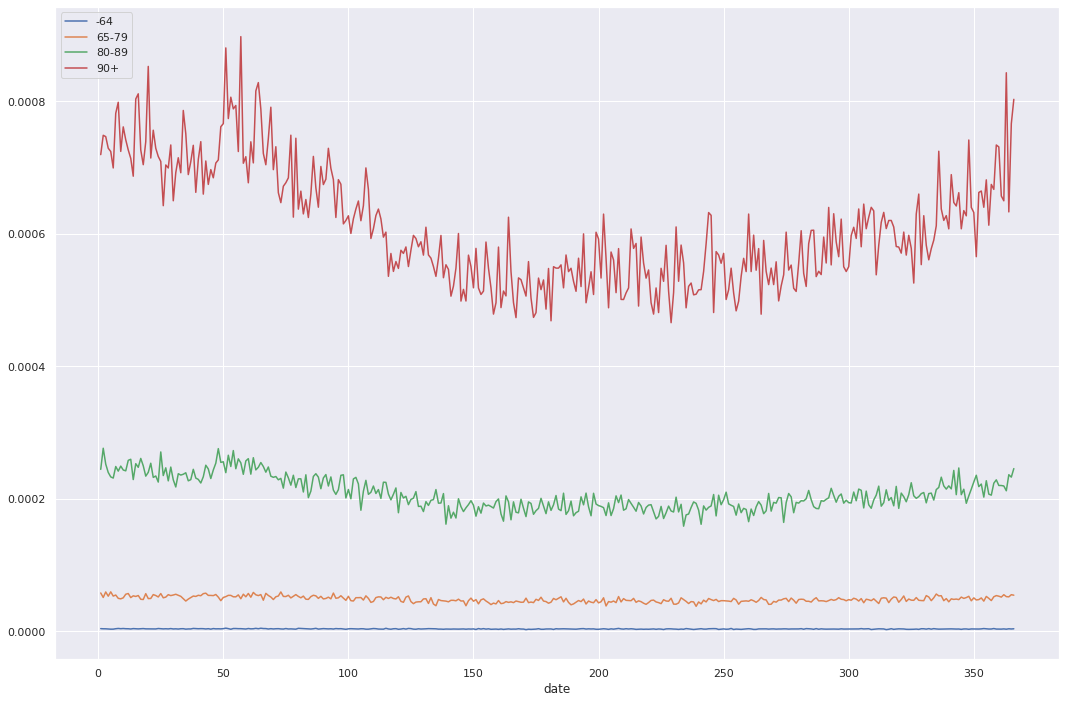

In [909]:
baseline_daily_mortality.plot(figsize=(18,12))


In [910]:
baseline_daily_tiled = np.concatenate([baseline_daily_mortality.values] * 20).reshape(-1,4)
baseline_daily_tiled = pd.DataFrame(np.delete(baseline_daily_tiled,day_59[~leap],axis=0),
                                   columns=['-64','65-79','80-89','90+'])


In [911]:
foo = np.array([[1,2,3,4],[5,6,7,8],[9,10,11,12],[13,14,15,16]])
np.concatenate([foo] * 4)

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12],
       [13, 14, 15, 16],
       [ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12],
       [13, 14, 15, 16],
       [ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12],
       [13, 14, 15, 16],
       [ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12],
       [13, 14, 15, 16]])

-64     65-79     80-89       90+
0     0.000004  0.000058  0.000245  0.000720
1     0.000004  0.000051  0.000276  0.000749
2     0.000004  0.000060  0.000252  0.000747
3     0.000004  0.000053  0.000240  0.000729
4     0.000003  0.000060  0.000233  0.000724
...        ...       ...       ...       ...
7300  0.000004  0.000055  0.000219  0.000650
7301  0.000003  0.000052  0.000212  0.000843
7302  0.000004  0.000052  0.000236  0.000633
7303  0.000004  0.000055  0.000233  0.000766
7304  0.000004  0.000055  0.000246  0.000803

[7305 rows x 4 columns]

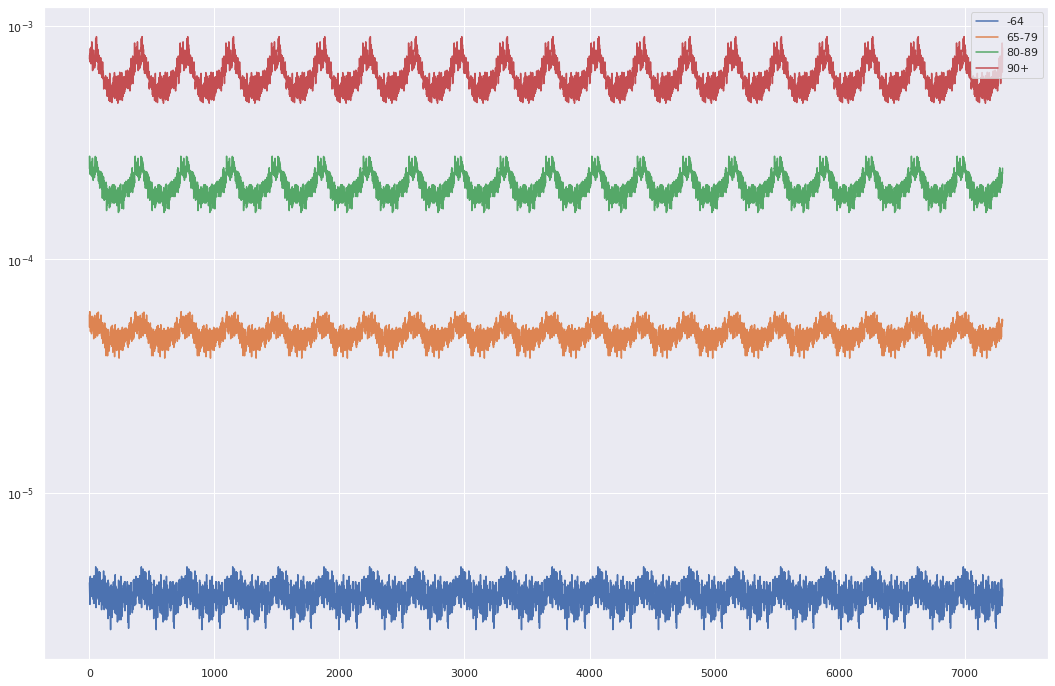

In [912]:
#baseline_daily_tiled.index = pd.date_range('2002-01-01','2021-12-31')
ax = baseline_daily_tiled.plot(figsize=(18,12),logy=True)
baseline_daily_tiled


In [913]:
#pop_age_scb_prel_df_daily['day_nr'] = pop_age_scb_prel_df_daily.index.dayofyear
#pop_age_scb_prel_df_daily = pop_age_scb_prel_df_daily.set_index('day_nr')
pop_age_scb_prel_df_daily

-64    65-79   80-89     90+
2002-01-01  7391436  1068690  407646   71595
2002-01-02  7391436  1068690  407646   71595
2002-01-03  7391436  1068690  407646   71595
2002-01-04  7391436  1068690  407646   71595
2002-01-05  7391436  1068690  407646   71595
...             ...      ...     ...     ...
2021-12-27  8273794  1549655  451009  104025
2021-12-28  8273794  1549655  451009  104025
2021-12-29  8273794  1549655  451009  104025
2021-12-30  8273794  1549655  451009  104025
2021-12-31  8273794  1549655  451009  104025

[7305 rows x 4 columns]

-64      65-79       80-89        90+
2002-01-01  30.603151  61.940929   99.697120  51.521470
2002-01-02  28.927716  54.729362  112.685914  53.609913
2002-01-03  28.596276  63.587232  102.915582  53.466251
2002-01-04  26.702194  56.753816   97.786732  52.211715
2002-01-05  24.713220  63.766045   95.061344  51.857049
...               ...        ...         ...        ...
2021-12-27  30.930777  85.808265   98.990210  67.608102
2021-12-28  27.344629  81.298694   95.722953  87.712295
2021-12-29  32.366717  80.723649  106.647121  65.865715
2021-12-30  29.898334  85.807826  105.010833  79.722529
2021-12-31  32.311679  84.625006  110.819809  83.539665

[7305 rows x 4 columns]

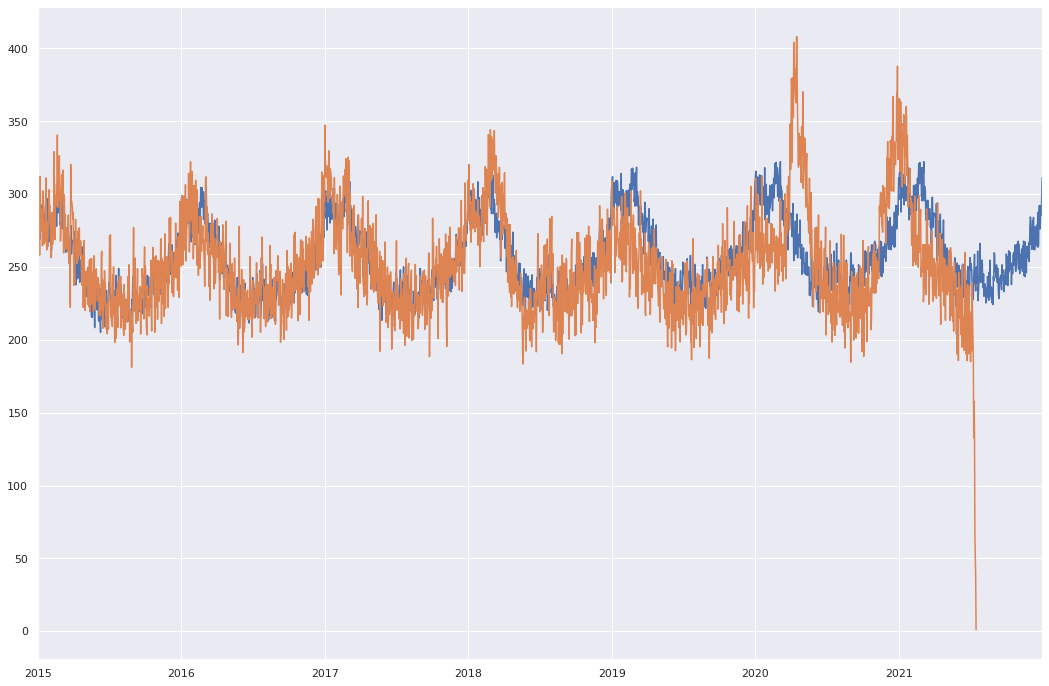

In [914]:
expected_daily_deaths = baseline_daily_tiled * pop_age_scb_prel_df_daily.reset_index(drop=True)
expected_daily_deaths.index = pd.date_range('2002','2021-12-31')

ax = expected_daily_deaths.loc['2015':].sum(axis=1).plot(figsize=(18,12))
daily_deaths.sum(axis=1).plot(ax=ax)
expected_daily_deaths

In [915]:
daily_excess_deaths = (daily_deaths - expected_daily_deaths).dropna()
daily_excess_deaths

-64      65-79      80-89        90+
2015-01-01   5.738859  -6.852500   1.029528   9.098616
2015-01-02  -6.988652   1.915256  -2.008434 -11.857301
2015-01-03  10.987809  -5.023943 -17.276125   0.366949
2015-01-04  -5.653300 -19.109843   2.953460   3.123510
2015-01-05  -1.460088  -7.297490  -5.349038   3.619551
...               ...        ...        ...        ...
2021-07-12 -21.206576 -30.796294 -47.662827 -24.225046
2021-07-13 -24.611583 -46.268331 -73.867139 -28.480878
2021-07-14 -27.359780 -58.491014 -60.510551 -44.889146
2021-07-15 -26.819277 -59.973659 -63.504855 -46.415929
2021-07-16 -30.154120 -67.027416 -94.005423 -52.896328

[2389 rows x 4 columns]

In [916]:
daily_excess_deaths.sum(axis=1).groupby(daily_excess_deaths.index.year).sum()

2015    1142.815899
2016    -243.007049
2017      46.126411
2018    -988.984563
2019   -6099.254525
2020    1805.983277
2021   -4426.510155
dtype: float64

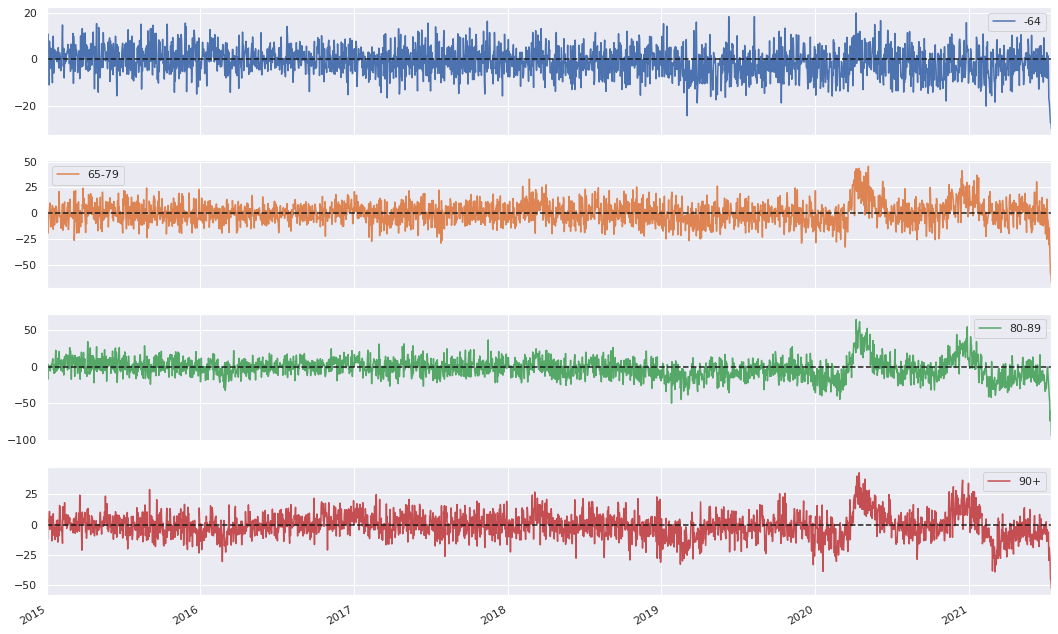

In [917]:
axes = daily_excess_deaths.plot(subplots=True,figsize=(18,12))

for a in axes:
    a.axhline(0,ls='dashed',color='k')

2021-07-04
                  -64      65-79       80-89        90+
2021-06-06 -18.392205  11.663393  -65.223951 -50.508512
2021-06-13 -15.888807  56.691753  -83.353842 -62.794411
2021-06-20 -20.183107  -6.765941  -82.511626 -43.596655
2021-06-27 -10.234465 -29.525764  -71.164048 -39.986389
2021-07-04 -15.248682 -45.389235 -170.095433 -16.717064


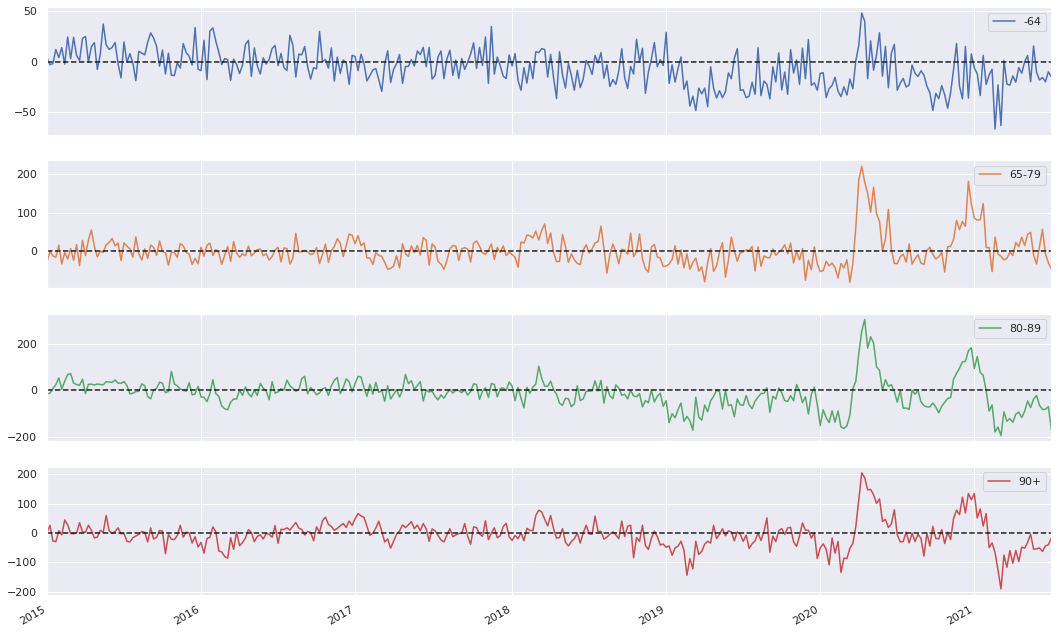

In [918]:
weekly_excess_deaths = daily_excess_deaths.resample('W').sum()

last_week = weekly_excess_deaths.index[-3].date()
print (last_week)
print (weekly_excess_deaths[:-2].tail())
    
axes = weekly_excess_deaths[:-2].plot(subplots=True,figsize=(18,12))

for a in axes:
    a.axhline(0,ls='dashed',color='k')

In [919]:
monthly_excess = daily_excess_deaths.resample('M').sum()
monthly_excess

-64       65-79       80-89         90+
2015-01-31   13.415077  -38.643823   52.527607  -35.859354
2015-02-28   43.959908  -47.038589  173.473042   82.142597
2015-03-31   63.058576    0.150926  137.554073   38.022282
2015-04-30   55.665896   67.749201   78.584380    9.022970
2015-05-31   54.788016   22.933293  124.131034   73.195173
...                ...         ...         ...         ...
2021-03-31 -127.068066  -53.710021 -594.657303 -479.745496
2021-04-30  -30.102861   46.875060 -457.249478 -305.219812
2021-05-31  -22.063323   81.708980 -235.549424 -167.272518
2021-06-30  -53.929477   17.621829 -340.357114 -193.422781
2021-07-31 -191.347799 -380.458403 -588.100417 -300.594970

[79 rows x 4 columns]

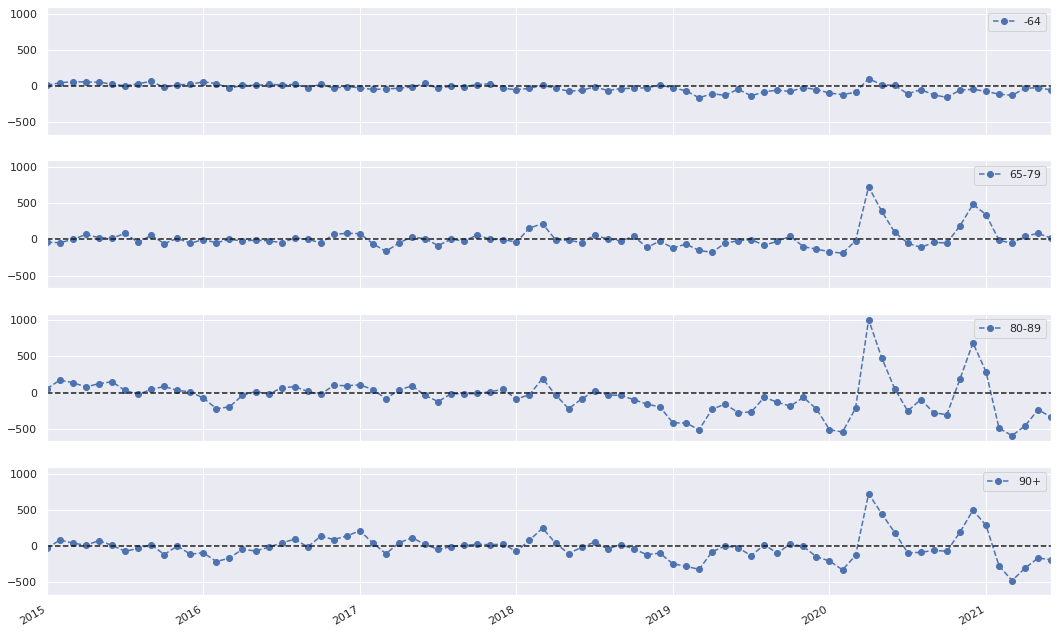

In [920]:
axes = monthly_excess[:-1].plot(figsize=(18,12),style='o--',subplots=True,sharey=True)

for a in axes:
    a.axhline(0,ls='dashed',color='k')

In [921]:
daily_excess_deaths.resample('Y').sum().sum(axis=1)

2015-12-31    1142.815899
2016-12-31    -243.007049
2017-12-31      46.126411
2018-12-31    -988.984563
2019-12-31   -6099.254525
2020-12-31    1805.983277
2021-12-31   -4426.510155
Freq: A-DEC, dtype: float64

In [922]:
monthly_excess.resample('Y').sum().sum(axis=1)

2015-12-31    1142.815899
2016-12-31    -243.007049
2017-12-31      46.126411
2018-12-31    -988.984563
2019-12-31   -6099.254525
2020-12-31    1805.983277
2021-12-31   -4426.510155
Freq: A-DEC, dtype: float64

In [923]:
#### SPANISH FLU COMPARISON ####

#http://share.scb.se/ov9993/data/historisk%20statistik//SOS%201911-/H%C3%A4lso-%20och%20sjukv%C3%A5rd/D%C3%B6dsorsaker%20(SOS)%201911-1996/Dodsorsaker-1918.pdf

deaths_1918_file = pd.ExcelFile('deaths_1918.xlsx')
deaths_1918_file.sheet_names

['Sheet1', 'Sheet2', 'Sheet3']

In [924]:
#### NEVER AVERAGE AVERAGES! ####
# here, I'm forced to average the few 5 year bin mortalities since I don't have the real numbers on deaths #
# and for the young age grp's the error isn't that huge,since the sizes of the groups (weights) averaged #
# are not way too different (hopefully). However, if averaging the rates for covid mortality for the 70+ grps #
# you'll get a significant difference in combined 70+ mortality, compared to when taking the absolute deaths # 
# and population numbers, and summing them, and then dividing #. If taking the average, you get about 2%, #
# but if doing the calculations based on the absolute numbers, it's less than 1% #
# Reason being that the 80-89 and 90+ groups have a very high mortality cmp 70 and below, and the fact that #
# the 80-89 & 90+ grps has a vast majority of covid deaths #

deaths_1918 = deaths_1918_file.parse(sheet_name='Sheet1')

deaths_1918


Age Grp  Spanish Flu  Tuberculosis
0     0-5       384.46         25.34
1    5-10       172.51         20.32
2   10-15       173.95         44.61
3   15-20       518.18        172.41
4   20-30       996.87        270.48
5   30-40       754.77        227.88
6   40-50       353.14        171.76
7   50-60       233.53        155.94
8   60-70       264.78        152.33
9  70plus       296.86         86.86

In [925]:
fhm_age_grp_impact['Totalt_antal_avlidna']

10_year_bin
0-9         9
10-19       6
20-29      22
30-39      47
40-49     116
50-59     373
60-69    1032
70-79    3278
80-89    5965
90+      3803
Name: Totalt_antal_avlidna, dtype: int64

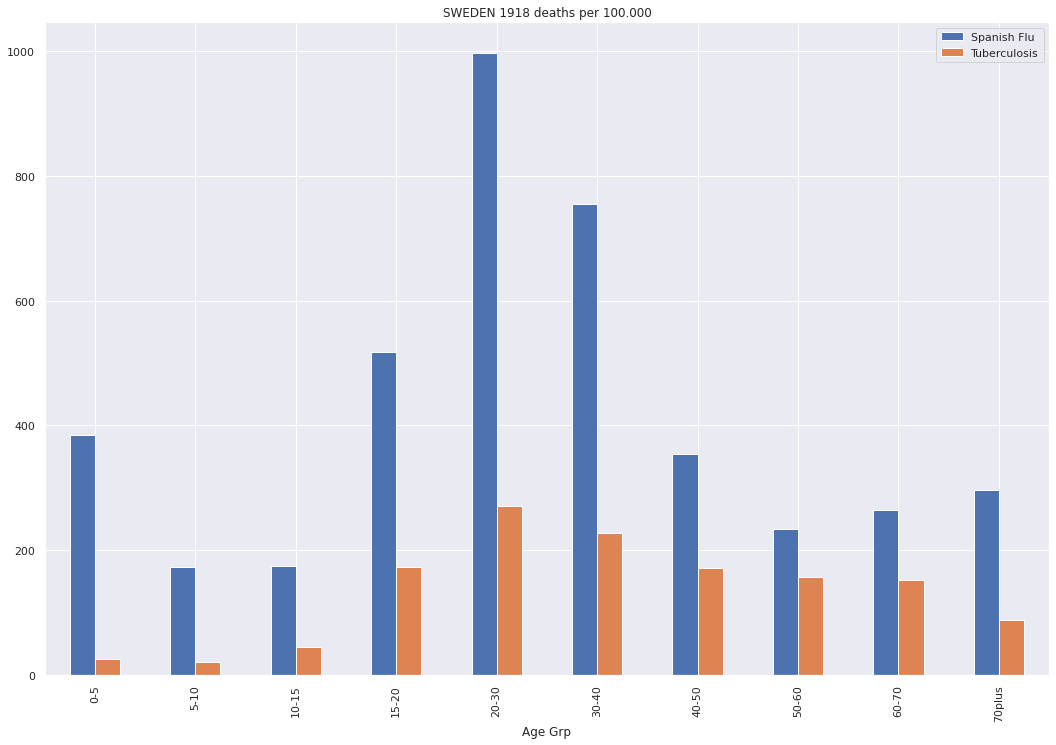

In [926]:
deaths_1918.plot(x = 'Age Grp', y=['Spanish Flu','Tuberculosis'],
                 kind='bar',title='SWEDEN 1918 deaths per 100.000',figsize=(18,12))

plt.savefig('scb_excess_spanish_flu.jpg',format='jpg')

In [927]:
pop_url_1918 = 'http://api.scb.se/OV0104/v1/doris/sv/ssd/START/BE/BE0101/BE0101A/BefolkningR1860N'
pop_query_1918 = {
  "query": [
    {
      "code": "Alder",
      "selection": {
        "filter": "vs:Ålder1årL",
        "values": [
          "0",
          "1",
          "2",
          "3",
          "4",
          "5",
          "6",
          "7",
          "8",
          "9",
          "10",
          "11",
          "12",
          "13",
          "14",
          "15",
          "16",
          "17",
          "18",
          "19",
          "20",
          "21",
          "22",
          "23",
          "24",
          "25",
          "26",
          "27",
          "28",
          "29",
          "30",
          "31",
          "32",
          "33",
          "34",
          "35",
          "36",
          "37",
          "38",
          "39",
          "40",
          "41",
          "42",
          "43",
          "44",
          "45",
          "46",
          "47",
          "48",
          "49",
          "50",
          "51",
          "52",
          "53",
          "54",
          "55",
          "56",
          "57",
          "58",
          "59",
          "60",
          "61",
          "62",
          "63",
          "64",
          "65",
          "66",
          "67",
          "68",
          "69",
          "70",
          "71",
          "72",
          "73",
          "74",
          "75",
          "76",
          "77",
          "78",
          "79",
          "80",
          "81",
          "82",
          "83",
          "84",
          "85",
          "86",
          "87",
          "88",
          "89",
          "90",
          "91",
          "92",
          "93",
          "94",
          "95",
          "96",
          "97",
          "98",
          "99",
          "100",
          "101",
          "102",
          "103",
          "104",
          "105",
          "106",
          "107",
          "108",
          "109",
          "110+"
        ]
      }
    },
    {
      "code": "Kon",
      "selection": {
        "filter": "item",
        "values": [
          "1",
          "2"
        ]
      }
    },
    {
      "code": "Tid",
      "selection": {
        "filter": "item",
        "values": [
          "1918"
        ]
      }
    }
  ],
  "response": {
    "format": "json"
  }
}

In [928]:
r_1918 = requests.post(pop_url_1918,json=pop_query_1918)
r_1918.status_code

200

In [929]:
json_1918 = r_1918.json()['data']
json_1918[0]

{'key': ['0', '1', '1918'], 'values': ['57558']}

In [930]:
pop_1918 = pd.DataFrame.from_dict(json_1918)
pop_1918[['age','gender','year']] = pop_1918['key'].to_list()
pop_1918['pop_1918'] = pop_1918['values'].apply(lambda x :x[0]).astype(int)
pop_1918['age'] = pop_1918['age'].str.replace('+','').astype(int)
pop_1918.drop(['key','values','year'],axis=1,inplace=True)


In [931]:
pop_1918

age gender  pop_1918
0      0      1     57558
1      0      2     54757
2      1      1     57155
3      1      2     54903
4      2      1     56819
..   ...    ...       ...
217  108      2         0
218  109      1         0
219  109      2         0
220  110      1         0
221  110      2         0

[222 rows x 3 columns]

In [932]:
pop_1918_both = pop_1918.groupby(['age']).sum()
pop_1918_both['bin_10'] = pd.cut(pop_1918_both.index,[-1,9,19,29,39,49,59,69,150],
                                 labels=['0-9','10-19','20-29','30-39','40-49',
                                                                '50-59','60-69','70+'])

pop_1918_2020_bin_10 = pop_1918_both.groupby('bin_10').sum()
pop_1918_2020_bin_10

pop_1918
bin_10          
0-9      1154713
10-19    1133231
20-29     931163
30-39     766818
40-49     610418
50-59     517121
60-69     392081
70+       308305

In [933]:
pop_1918_2020_bin_10['pop_1918'].sum()

5813850

In [934]:
fhm_age_grp_impact['Totalt_antal_avlidna']

10_year_bin
0-9         9
10-19       6
20-29      22
30-39      47
40-49     116
50-59     373
60-69    1032
70-79    3278
80-89    5965
90+      3803
Name: Totalt_antal_avlidna, dtype: int64

In [935]:
pop_2020_70_plus = twenty_twenty_pop.loc['70-79':].sum()
pop_1918_2020_bin_10['pop_2020'] = twenty_twenty_pop.loc[:'60-69','pop']
pop_1918_2020_bin_10.loc['70+','pop_2020'] = pop_2020_70_plus.values


covid_dead_2020_70_plus = fhm_age_grp_impact['Totalt_antal_avlidna'].loc['70-79':].sum()
pop_1918_2020_bin_10['covid_dead_2020_YTD'] = fhm_age_grp_impact['Totalt_antal_avlidna'].loc[:'70-79']

pop_1918_2020_bin_10.loc['70+','covid_dead_2020_YTD'] = covid_dead_2020_70_plus
pop_1918_2020_bin_10

pop_1918   pop_2020  covid_dead_2020_YTD
bin_10                                          
0-9      1154713  1199294.0                  9.0
10-19    1133231  1198480.0                  6.0
20-29     931163  1295626.0                 22.0
30-39     766818  1398149.0                 47.0
40-49     610418  1301550.0                116.0
50-59     517121  1310864.0                373.0
60-69     392081  1107575.0               1032.0
70+       308305  1566945.0              13046.0

In [936]:
deaths_1918['bin_10'] = ['0-9','0-9','10-19','10-19','20-29','30-39','40-49','50-59',
                        '60-69','70+']

deaths_1918

Age Grp  Spanish Flu  Tuberculosis bin_10
0     0-5       384.46         25.34    0-9
1    5-10       172.51         20.32    0-9
2   10-15       173.95         44.61  10-19
3   15-20       518.18        172.41  10-19
4   20-30       996.87        270.48  20-29
5   30-40       754.77        227.88  30-39
6   40-50       353.14        171.76  40-49
7   50-60       233.53        155.94  50-59
8   60-70       264.78        152.33  60-69
9  70plus       296.86         86.86    70+

In [937]:
mort_spanish_flu = deaths_1918.groupby('bin_10')['Spanish Flu'].mean() / 100000
mort_spanish_flu

bin_10
0-9      0.002785
10-19    0.003461
20-29    0.009969
30-39    0.007548
40-49    0.003531
50-59    0.002335
60-69    0.002648
70+      0.002969
Name: Spanish Flu, dtype: float64

In [938]:
pop_1918_2020_bin_10['spanish_flu_dead'] = mort_spanish_flu * pop_1918_2020_bin_10['pop_1918']
pop_1918_2020_bin_10

pop_1918   pop_2020  covid_dead_2020_YTD  spanish_flu_dead
bin_10                                                            
0-9      1154713  1199294.0                  9.0       3215.702498
10-19    1133231  1198480.0                  6.0       3921.715860
20-29     931163  1295626.0                 22.0       9282.484598
30-39     766818  1398149.0                 47.0       5787.712219
40-49     610418  1301550.0                116.0       2155.630125
50-59     517121  1310864.0                373.0       1207.632671
60-69     392081  1107575.0               1032.0       1038.152072
70+       308305  1566945.0              13046.0        915.234223

In [939]:
pop_1918_2020_bin_10.sum()

pop_1918               5.813850e+06
pop_2020               1.037848e+07
covid_dead_2020_YTD    1.465100e+04
spanish_flu_dead       2.752426e+04
dtype: float64

In [940]:
pop_1918_2020_bin_10['spanish_flu_mort'] = pop_1918_2020_bin_10['spanish_flu_dead'] / pop_1918_2020_bin_10['pop_1918']
pop_1918_2020_bin_10['covid_mort'] = pop_1918_2020_bin_10['covid_dead_2020_YTD'] / pop_1918_2020_bin_10['pop_2020']
pop_1918_2020_bin_10

pop_1918   pop_2020  covid_dead_2020_YTD  spanish_flu_dead  \
bin_10                                                               
0-9      1154713  1199294.0                  9.0       3215.702498   
10-19    1133231  1198480.0                  6.0       3921.715860   
20-29     931163  1295626.0                 22.0       9282.484598   
30-39     766818  1398149.0                 47.0       5787.712219   
40-49     610418  1301550.0                116.0       2155.630125   
50-59     517121  1310864.0                373.0       1207.632671   
60-69     392081  1107575.0               1032.0       1038.152072   
70+       308305  1566945.0              13046.0        915.234223   

        spanish_flu_mort  covid_mort  
bin_10                                
0-9             0.002785    0.000008  
10-19           0.003461    0.000005  
20-29           0.009969    0.000017  
30-39           0.007548    0.000034  
40-49           0.003531    0.000089  
50-59           0.002335    0.000285  
60-69           0.002648    0.000932  
70+             0.002969    0.008326

/usr/local/lib64/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


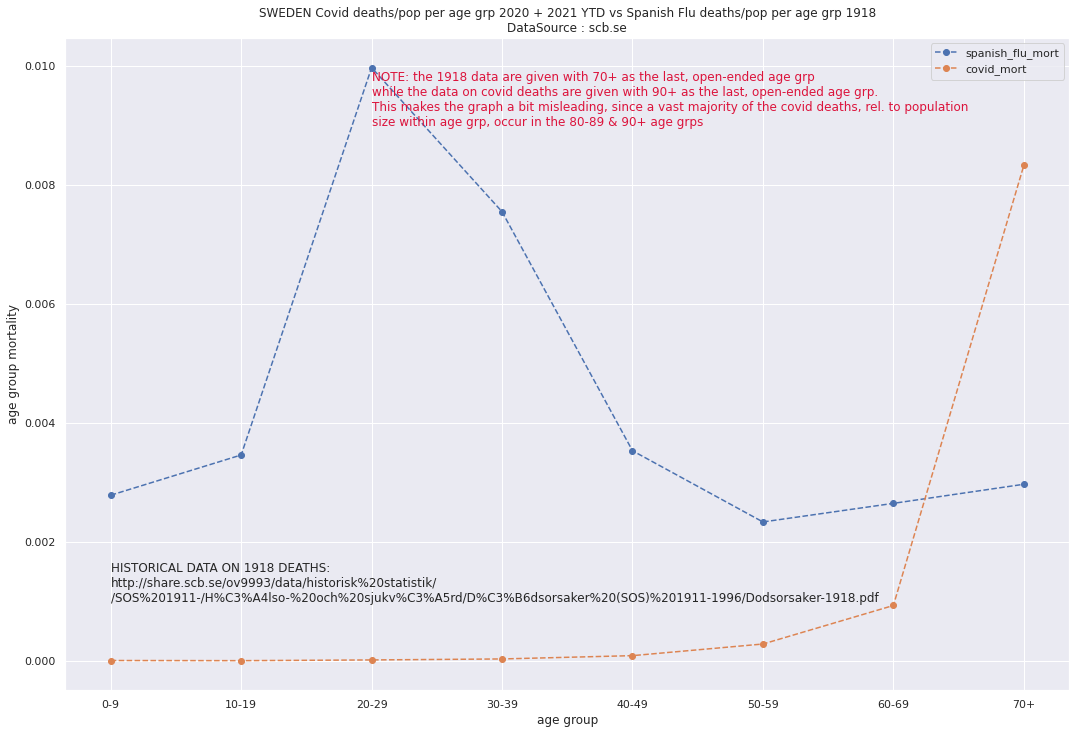

In [941]:
credits = '\nDataSource : scb.se'
title = 'SWEDEN Covid deaths/pop per age grp 2020 + 2021 YTD vs Spanish Flu deaths/pop per age grp 1918' + credits
pop_1918_2020_bin_10.plot(y=['spanish_flu_mort','covid_mort'],style='o--',figsize=(18,12),title=title)
plt.ylabel('age group mortality')
plt.xlabel('age group')


plt.text(0,0.001,'HISTORICAL DATA ON 1918 DEATHS:\nhttp://share.scb.se/ov9993/data/historisk%20statistik/\n/SOS%201911-/H%C3%A4lso-%20och%20sjukv%C3%A5rd/D%C3%B6dsorsaker%20(SOS)%201911-1996/Dodsorsaker-1918.pdf')

note = 'NOTE: the 1918 data are given with 70+ as the last, open-ended age grp\n' +\
'while the data on covid deaths are given with 90+ as the last, open-ended age grp.\n' +\
'This makes the graph a bit misleading, since a vast majority of the covid deaths, rel. to population\n' +\
'size within age grp, occur in the 80-89 & 90+ age grps'
plt.text (plt.xticks()[0][3],0.009,note,color='crimson')
plt.savefig('scb_excess_sp_flu_vs_covid_mortality.jpg',format='jpg')

In [942]:
all_cause_1918 = deaths_1918_file.parse('Sheet2')
all_cause_1918['bin_10'] = ['0-9','0-9','0-9','0-9','0-9',
                           '10-19','10-19','20-29','30-39','40-49',
                           '50-59','60-69','70+']

all_cause_1918

age grp   male  female bin_10
0       0-1   4340    3281    0-9
1       1-2   1087    1054    0-9
2       2-3    639     621    0-9
3       3-5    956     943    0-9
4      5-10   1626    1568    0-9
5     10-15   1285    1439  10-19
6     15-20   2666    2630  10-19
7     20-30   8571    6650  20-29
8     30-40   5584    4919  30-39
9     40-50   3343    3144  40-49
10    50-60   3823    3800  50-59
11    60-70   5511    5616  60-69
12  70_plus  13431   16064    70+

In [943]:
all_cause_bin_10_1918 = all_cause_1918.groupby('bin_10').sum().sum(axis=1)
all_cause_bin_10_1918

bin_10
0-9      16115
10-19     8020
20-29    15221
30-39    10503
40-49     6487
50-59     7623
60-69    11127
70+      29495
dtype: int64

In [944]:
pop_1918_2020_bin_10['all_cause_1918'] = all_cause_bin_10_1918
pop_1918_2020_bin_10

pop_1918   pop_2020  covid_dead_2020_YTD  spanish_flu_dead  \
bin_10                                                               
0-9      1154713  1199294.0                  9.0       3215.702498   
10-19    1133231  1198480.0                  6.0       3921.715860   
20-29     931163  1295626.0                 22.0       9282.484598   
30-39     766818  1398149.0                 47.0       5787.712219   
40-49     610418  1301550.0                116.0       2155.630125   
50-59     517121  1310864.0                373.0       1207.632671   
60-69     392081  1107575.0               1032.0       1038.152072   
70+       308305  1566945.0              13046.0        915.234223   

        spanish_flu_mort  covid_mort  all_cause_1918  
bin_10                                                
0-9             0.002785    0.000008           16115  
10-19           0.003461    0.000005            8020  
20-29           0.009969    0.000017           15221  
30-39           0.007548    0.000034           10503  
40-49           0.003531    0.000089            6487  
50-59           0.002335    0.000285            7623  
60-69           0.002648    0.000932           11127  
70+             0.002969    0.008326           29495

In [945]:
all_cause_bin_10_2020 = dead_age_df.loc['2020'].groupby('10_y_bin').sum()
all_cause_70_plus = all_cause_bin_10_2020.loc['70-79':].sum()['dead']
all_cause_bin_10_2020 = all_cause_bin_10_2020.loc[:'60-69']

all_cause_bin_10_2020 = pd.concat(
    [all_cause_bin_10_2020.reset_index(),pd.DataFrame(
        {'10_y_bin' : '70+','dead' : [all_cause_70_plus],
        'mid_bin' : [0]},index=[7])]).set_index('10_y_bin')['dead']

all_cause_bin_10_2020

10_y_bin
0-9        352
10-19      204
20-29      578
30-39      745
40-49     1340
50-59     3726
60-69     9170
70+      82009
Name: dead, dtype: int64

In [946]:
pop_1918_2020_bin_10['all_cause_2020'] = all_cause_bin_10_2020
pop_1918_2020_bin_10

pop_1918   pop_2020  covid_dead_2020_YTD  spanish_flu_dead  \
bin_10                                                               
0-9      1154713  1199294.0                  9.0       3215.702498   
10-19    1133231  1198480.0                  6.0       3921.715860   
20-29     931163  1295626.0                 22.0       9282.484598   
30-39     766818  1398149.0                 47.0       5787.712219   
40-49     610418  1301550.0                116.0       2155.630125   
50-59     517121  1310864.0                373.0       1207.632671   
60-69     392081  1107575.0               1032.0       1038.152072   
70+       308305  1566945.0              13046.0        915.234223   

        spanish_flu_mort  covid_mort  all_cause_1918  all_cause_2020  
bin_10                                                                
0-9             0.002785    0.000008           16115             352  
10-19           0.003461    0.000005            8020             204  
20-29           0.009969    0.000017           15221             578  
30-39           0.007548    0.000034           10503             745  
40-49           0.003531    0.000089            6487            1340  
50-59           0.002335    0.000285            7623            3726  
60-69           0.002648    0.000932           11127            9170  
70+             0.002969    0.008326           29495           82009

In [947]:
pop_1918_2020_bin_10['mort_1918'] = pop_1918_2020_bin_10['all_cause_1918'] / pop_1918_2020_bin_10['pop_1918']
pop_1918_2020_bin_10['mort_2020'] = pop_1918_2020_bin_10['all_cause_2020'] / pop_1918_2020_bin_10['pop_2020']

pop_1918_2020_bin_10

pop_1918   pop_2020  covid_dead_2020_YTD  spanish_flu_dead  \
bin_10                                                               
0-9      1154713  1199294.0                  9.0       3215.702498   
10-19    1133231  1198480.0                  6.0       3921.715860   
20-29     931163  1295626.0                 22.0       9282.484598   
30-39     766818  1398149.0                 47.0       5787.712219   
40-49     610418  1301550.0                116.0       2155.630125   
50-59     517121  1310864.0                373.0       1207.632671   
60-69     392081  1107575.0               1032.0       1038.152072   
70+       308305  1566945.0              13046.0        915.234223   

        spanish_flu_mort  covid_mort  all_cause_1918  all_cause_2020  \
bin_10                                                                 
0-9             0.002785    0.000008           16115             352   
10-19           0.003461    0.000005            8020             204   
20-29           0.009969    0.000017           15221             578   
30-39           0.007548    0.000034           10503             745   
40-49           0.003531    0.000089            6487            1340   
50-59           0.002335    0.000285            7623            3726   
60-69           0.002648    0.000932           11127            9170   
70+             0.002969    0.008326           29495           82009   

        mort_1918  mort_2020  
bin_10                        
0-9      0.013956   0.000294  
10-19    0.007077   0.000170  
20-29    0.016346   0.000446  
30-39    0.013697   0.000533  
40-49    0.010627   0.001030  
50-59    0.014741   0.002842  
60-69    0.028379   0.008279  
70+      0.095668   0.052337

/usr/local/lib64/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='bin_10'>

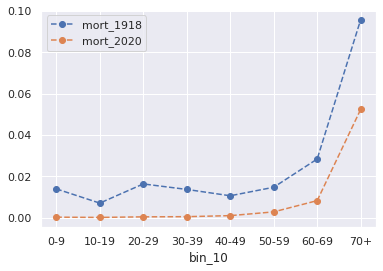

In [948]:
pop_1918_2020_bin_10.plot(y=['mort_1918','mort_2020'],style='o--')

In [949]:
pop_1918_2020_bin_10['1918_mort_ratio'] = pop_1918_2020_bin_10['spanish_flu_mort'] / pop_1918_2020_bin_10['mort_1918']
pop_1918_2020_bin_10['2020_mort_ratio'] = pop_1918_2020_bin_10['covid_mort'] / pop_1918_2020_bin_10['mort_2020']

pop_1918_2020_bin_10

pop_1918   pop_2020  covid_dead_2020_YTD  spanish_flu_dead  \
bin_10                                                               
0-9      1154713  1199294.0                  9.0       3215.702498   
10-19    1133231  1198480.0                  6.0       3921.715860   
20-29     931163  1295626.0                 22.0       9282.484598   
30-39     766818  1398149.0                 47.0       5787.712219   
40-49     610418  1301550.0                116.0       2155.630125   
50-59     517121  1310864.0                373.0       1207.632671   
60-69     392081  1107575.0               1032.0       1038.152072   
70+       308305  1566945.0              13046.0        915.234223   

        spanish_flu_mort  covid_mort  all_cause_1918  all_cause_2020  \
bin_10                                                                 
0-9             0.002785    0.000008           16115             352   
10-19           0.003461    0.000005            8020             204   
20-29           0.009969    0.000017           15221             578   
30-39           0.007548    0.000034           10503             745   
40-49           0.003531    0.000089            6487            1340   
50-59           0.002335    0.000285            7623            3726   
60-69           0.002648    0.000932           11127            9170   
70+             0.002969    0.008326           29495           82009   

        mort_1918  mort_2020  1918_mort_ratio  2020_mort_ratio  
bin_10                                                          
0-9      0.013956   0.000294         0.199547         0.025568  
10-19    0.007077   0.000170         0.488992         0.029412  
20-29    0.016346   0.000446         0.609847         0.038062  
30-39    0.013697   0.000533         0.551053         0.063087  
40-49    0.010627   0.001030         0.332300         0.086567  
50-59    0.014741   0.002842         0.158420         0.100107  
60-69    0.028379   0.008279         0.093300         0.112541  
70+      0.095668   0.052337         0.031030         0.159080

/usr/local/lib64/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='bin_10'>

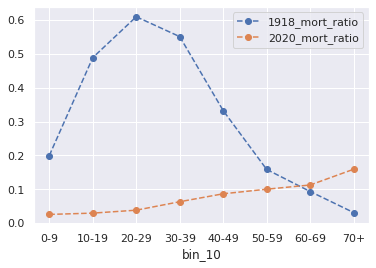

In [950]:
pop_1918_2020_bin_10.plot(y=['1918_mort_ratio','2020_mort_ratio'],style='o--')

In [951]:
all_cause_1917 = deaths_1918_file.parse(sheet_name='Sheet3')
all_cause_1917['bin_10'] = ['0-9','0-9','0-9','0-9','0-9',
                           '10-19','10-19',
                           '20-29','20-29',
                           '30-39','30-39',
                           '40-49','40-49',
                           '50-59','50-59',
                           '60-69','60-69',
                           '70-79','70-79',
                           '80-89','80-89',
                           '90+']

all_cause_1917

age grp  dead bin_10
0       0-1  7797    0-9
1       1-2  1674    0-9
2       2-3   834    0-9
3       3-5  1200    0-9
4      5-10  1944    0-9
5     10-15  1594  10-19
6     15-20  2554  10-19
7     20-25  3028  20-29
8     25-30  2447  20-29
9     30-35  2180  30-39
10    35-40  2102  30-39
11    40-45  2181  40-49
12    45-50  2123  40-49
13    50-55  2846  50-59
14    55-60  3571  50-59
15    60-65  4272  60-69
16    65-70  5702  60-69
17    70-76  7169  70-79
18    75-80  7993  70-79
19    80-85  7735  80-89
20    85-90  4469  80-89
21  90_plus  1970    90+

In [952]:
all_cause_bin_10_1917 = all_cause_1917.groupby('bin_10').sum()
plus_70_1917 = all_cause_bin_10_1917.loc['70-79':]['dead'].sum()
plus_70_1917

29336

In [953]:
all_cause_bin_10_1917 = all_cause_bin_10_1917.loc[:'60-69']
all_cause_bin_10_1917 = pd.concat([all_cause_bin_10_1917.reset_index(),pd.DataFrame({'bin_10' : '70+',
                                                            'dead' : plus_70_1917},index=[8])]).set_index('bin_10')

In [954]:
all_cause_bin_10_1917

dead
bin_10       
0-9     13449
10-19    4148
20-29    5475
30-39    4282
40-49    4304
50-59    6417
60-69    9974
70+     29336

In [955]:
all_cause_bin_10_1917.sum()

dead    77385
dtype: int64

In [956]:
pop_url_1917 = 'http://api.scb.se/OV0104/v1/doris/sv/ssd/START/BE/BE0101/BE0101A/BefolkningR1860N'
pop_query_1917 = {
  "query": [
    {
      "code": "Alder",
      "selection": {
        "filter": "vs:Ålder1årL",
        "values": [
          "0",
          "1",
          "2",
          "3",
          "4",
          "5",
          "6",
          "7",
          "8",
          "9",
          "10",
          "11",
          "12",
          "13",
          "14",
          "15",
          "16",
          "17",
          "18",
          "19",
          "20",
          "21",
          "22",
          "23",
          "24",
          "25",
          "26",
          "27",
          "28",
          "29",
          "30",
          "31",
          "32",
          "33",
          "34",
          "35",
          "36",
          "37",
          "38",
          "39",
          "40",
          "41",
          "42",
          "43",
          "44",
          "45",
          "46",
          "47",
          "48",
          "49",
          "50",
          "51",
          "52",
          "53",
          "54",
          "55",
          "56",
          "57",
          "58",
          "59",
          "60",
          "61",
          "62",
          "63",
          "64",
          "65",
          "66",
          "67",
          "68",
          "69",
          "70",
          "71",
          "72",
          "73",
          "74",
          "75",
          "76",
          "77",
          "78",
          "79",
          "80",
          "81",
          "82",
          "83",
          "84",
          "85",
          "86",
          "87",
          "88",
          "89",
          "90",
          "91",
          "92",
          "93",
          "94",
          "95",
          "96",
          "97",
          "98",
          "99",
          "100",
          "101",
          "102",
          "103",
          "104",
          "105",
          "106",
          "107",
          "108",
          "109",
          "110+"
        ]
      }
    },
    {
      "code": "Kon",
      "selection": {
        "filter": "item",
        "values": [
          "1",
          "2"
        ]
      }
    },
    {
      "code": "Tid",
      "selection": {
        "filter": "item",
        "values": [
          "1917"
        ]
      }
    }
  ],
  "response": {
    "format": "json"
  }
}

In [957]:
r_1917 = requests.post(pop_url_1917,json=pop_query_1917)

r_1917.status_code

200

In [958]:
json_1917 = r_1917.json()['data']
pop_1917 = pd.DataFrame.from_dict(json_1917)
pop_1917[['age','gender','year']] = pop_1917['key'].to_list()
pop_1917['pop_1917'] = pop_1917['values'].apply(lambda x :x[0]).astype(int)
pop_1917['age'] = pop_1917['age'].str.replace('+','').astype(int)
pop_1917.drop(['key','values','year'],axis=1,inplace=True)

pop_1917_both = pop_1917.groupby(['age']).sum()
pop_1917_both['bin_10'] = pd.cut(pop_1917_both.index,[-1,9,19,29,39,49,59,69,150],
                                 labels=['0-9','10-19','20-29','30-39','40-49',
                                                                '50-59','60-69','70+'])

pop_1917_bin_10 = pop_1917_both.groupby('bin_10').sum()
pop_1917_bin_10


pop_1917
bin_10          
0-9      1172609
10-19    1126577
20-29     927046
30-39     761336
40-49     594780
50-59     526851
60-69     385161
70+       306487

In [959]:
pop_1917_bin_10.sum()

pop_1917    5800847
dtype: int64

In [960]:
pop_1917_bin_10

pop_1917
bin_10          
0-9      1172609
10-19    1126577
20-29     927046
30-39     761336
40-49     594780
50-59     526851
60-69     385161
70+       306487

In [961]:
all_cause_bin_10_1917

dead
bin_10       
0-9     13449
10-19    4148
20-29    5475
30-39    4282
40-49    4304
50-59    6417
60-69    9974
70+     29336

In [962]:
mort_1917 = all_cause_bin_10_1917['dead'] / pop_1917_bin_10['pop_1917']
mort_1917

bin_10
0-9      0.011469
10-19    0.003682
20-29    0.005906
30-39    0.005624
40-49    0.007236
50-59    0.012180
60-69    0.025896
70+      0.095717
dtype: float64

/usr/local/lib64/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


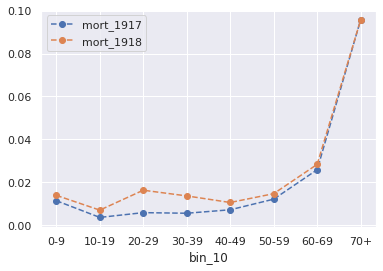

In [963]:
ax = mort_1917.plot(style='o--',label='mort_1917')
pop_1918_2020_bin_10.plot(y='mort_1918',ax=ax,style='o--')
ax.legend(loc='upper left')

In [964]:
''' Difference ABSOLUTE change vs RELATIVE change : think about something you pay for each month, e.g. 
your plastic shopping bag vs. your morgage : now think about relative vs absolute change : a relative change of
2x of the price of the plastic bag does not matter much, but a relative change of 2x of your morgage matters
a lot. Bottom line: with very low absolute values, even significant relative change might be insignificant, 
but for high absolute values, even minor relative changes can change your life.'''

mort_rel_1918_1917 = pop_1918_2020_bin_10['mort_1918'] / mort_1917
mort_rel_1918_1917

bin_10
0-9      1.216801
10-19    1.922109
20-29    2.767800
30-39    2.435290
40-49    1.468590
50-59    1.210290
60-69    1.095911
70+      0.999491
dtype: float64

/usr/local/lib64/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='bin_10'>

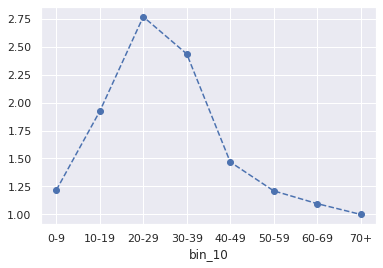

In [965]:
mort_rel_1918_1917.plot(style='o--')

In [966]:
pop_age_bin_10_70 = pop_age_df.groupby(['year','num_age']).sum().reset_index(level=1)
pop_age_bin_10_70

num_age    pop
year                
2002        0  82336
2002        1  92580
2002        2  92138
2002        3  90251
2002        4  91214
...       ...    ...
2020       96   5709
2020       97   3972
2020       98   2707
2020       99   1915
2020      100   2715

[1919 rows x 2 columns]

In [967]:
pop_age_bin_10_70['bin_10'] = pd.cut(pop_age_df.groupby(['year','num_age']).sum().reset_index(level=1)['num_age'],[-1,9,19,29,39,49,59,69,150],
       labels=['0-9','10-19','20-29','30-39','40-49','50-59','60-69','70+'])
pop_age_bin_10_70 = pop_age_bin_10_70.groupby(['year','bin_10'])['pop'].sum()


In [968]:
pop_age_bin_10_70

year  bin_10
2002  0-9        975298
      10-19     1153871
      20-29     1084369
      30-39     1275889
      40-49     1172870
                 ...   
2020  30-39     1398149
      40-49     1301550
      50-59     1310864
      60-69     1107575
      70+       1566945
Name: pop, Length: 152, dtype: int64

In [969]:
dead_age_bin_10_70 = dead_age_df.groupby(['year','num_age']).sum().reset_index(level=1)
dead_age_bin_10_70

num_age  dead  mid_bin
year                        
2002        0   313        5
2002        1    24        5
2002        2    25        5
2002        3    10        5
2002        4    10        5
...       ...   ...      ...
2020       96  1789       95
2020       97  1270       95
2020       98  1065       95
2020       99   759       95
2020      100  1247       95

[1919 rows x 3 columns]

In [970]:
dead_age_bin_10_70['bin_10'] = pd.cut(dead_age_df.groupby(['year','num_age']).sum().reset_index(level=1)['num_age'],[-1,9,19,29,39,49,59,69,150],
       labels=['0-9','10-19','20-29','30-39','40-49','50-59','60-69','70+'])
dead_age_bin_10_70 = dead_age_bin_10_70.groupby(['year','bin_10'])['dead'].sum()

dead_age_bin_10_70

year  bin_10
2002  0-9         418
      10-19       240
      20-29       532
      30-39       818
      40-49      1851
                ...  
2020  30-39       745
      40-49      1340
      50-59      3726
      60-69      9170
      70+       82009
Name: dead, Length: 152, dtype: int64

In [971]:
mort_2002_2020 = dead_age_bin_10_70 / pop_age_bin_10_70
mort_2002_2020

year  bin_10
2002  0-9       0.000429
      10-19     0.000208
      20-29     0.000491
      30-39     0.000641
      40-49     0.001578
                  ...   
2020  30-39     0.000533
      40-49     0.001030
      50-59     0.002842
      60-69     0.008279
      70+       0.052337
Length: 152, dtype: float64

In [972]:
mort_abs_1918_1917 = pop_1918_2020_bin_10['mort_1918'] - mort_1917
mort_abs_1918_1917


bin_10
0-9      0.002487
10-19    0.003395
20-29    0.010440
30-39    0.008073
40-49    0.003391
50-59    0.002561
60-69    0.002484
70+     -0.000049
dtype: float64

In [973]:
mort_abs_2020_2019 = mort_2002_2020.loc['2020'] - mort_2002_2020.loc['2019']
mort_abs_2020_2019

bin_10
0-9      0.000023
10-19    0.000022
20-29   -0.000020
30-39   -0.000021
40-49    0.000002
50-59    0.000133
60-69    0.000317
70+      0.004739
dtype: float64

In [974]:
mort_rel_2020_2019 = mort_2002_2020.loc['2020'] / mort_2002_2020.loc['2019']
mort_rel_2020_2019

bin_10
0-9      1.084579
10-19    1.144608
20-29    0.956655
30-39    0.962031
40-49    1.001789
50-59    1.049252
60-69    1.039789
70+      1.099571
dtype: float64

/usr/local/lib64/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


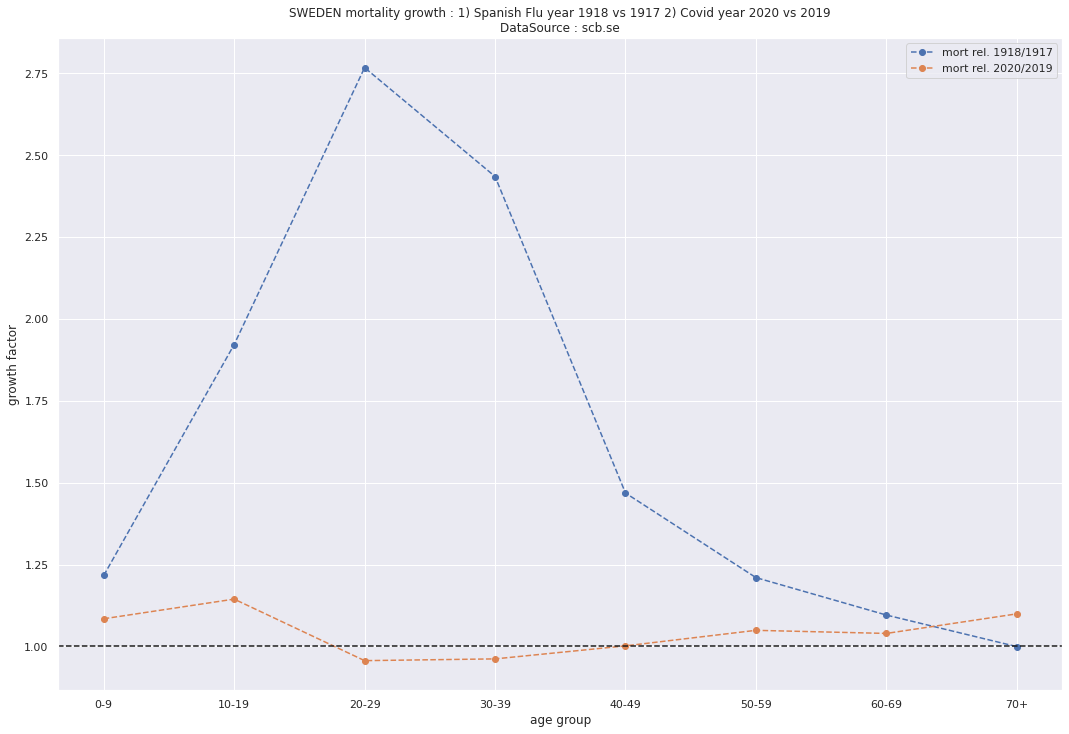

In [975]:
title='SWEDEN mortality growth : 1) Spanish Flu year 1918 vs 1917 2) Covid year 2020 vs 2019\nDataSource : scb.se'
ax = mort_rel_1918_1917.plot(style='o--',label='mort rel. 1918/1917',figsize=(18,12),title=title)
mort_rel_2020_2019.plot(ax=ax,style='o--',label='mort rel. 2020/2019')
ax.legend(loc='upper right')
ax.set_ylabel('growth factor')
ax.set_xlabel('age group')
ax.axhline(1,ls='dashed',color='k')
plt.savefig('scb_excess_spanish_flu_vs_covid_mort_growth.jpg',format='jpg')

/usr/local/lib64/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:title={'center':'absolute change'}, xlabel='bin_10'>

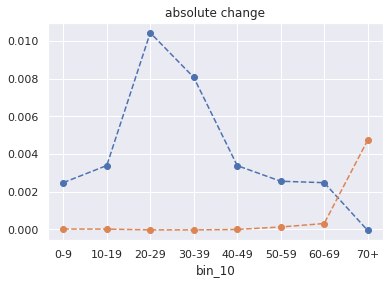

In [976]:
title = 'absolute change'
ax = mort_abs_1918_1917.plot(style='o--',title=title)
mort_abs_2020_2019.plot(ax=ax,style='o--')

/usr/local/lib64/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


Text(0.5, 0.98, 'SWEDEN mortality 1917 : 1918, 2019 : 2020\nDataSource : scb.se')

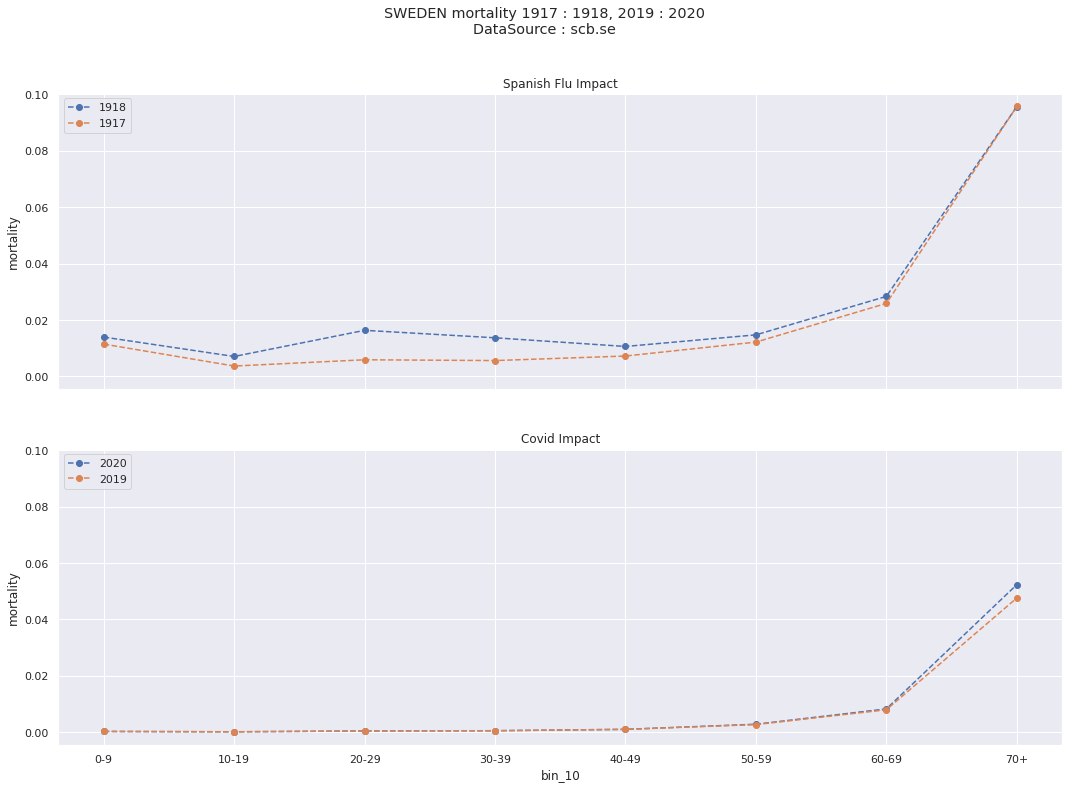

In [977]:
fig,axes = plt.subplots(2,figsize=(18,12),sharey=True,sharex=True) 
pop_1918_2020_bin_10['mort_1918'].plot(ax=axes[0],style='o--',label='1918')
mort_1917.plot(style='o--',ax=axes[0],label='1917')
axes[0].legend(loc='upper left')

mort_2002_2020.loc['2020'].plot(ax=axes[1],style='o--',label='2020')
mort_2002_2020.loc['2019'].plot(ax=axes[1],style='o--',label='2019')
axes[1].legend(loc='upper left')

for a in axes:
    a.set_ylabel('mortality')
    
axes[0].set_title('Spanish Flu Impact')
axes[1].set_title('Covid Impact')

plt.suptitle('SWEDEN mortality 1917 : 1918, 2019 : 2020\nDataSource : scb.se')

In [978]:
fhm_icu_weekly.sum()

Antal_intensivvårdade    7600
dtype: int64

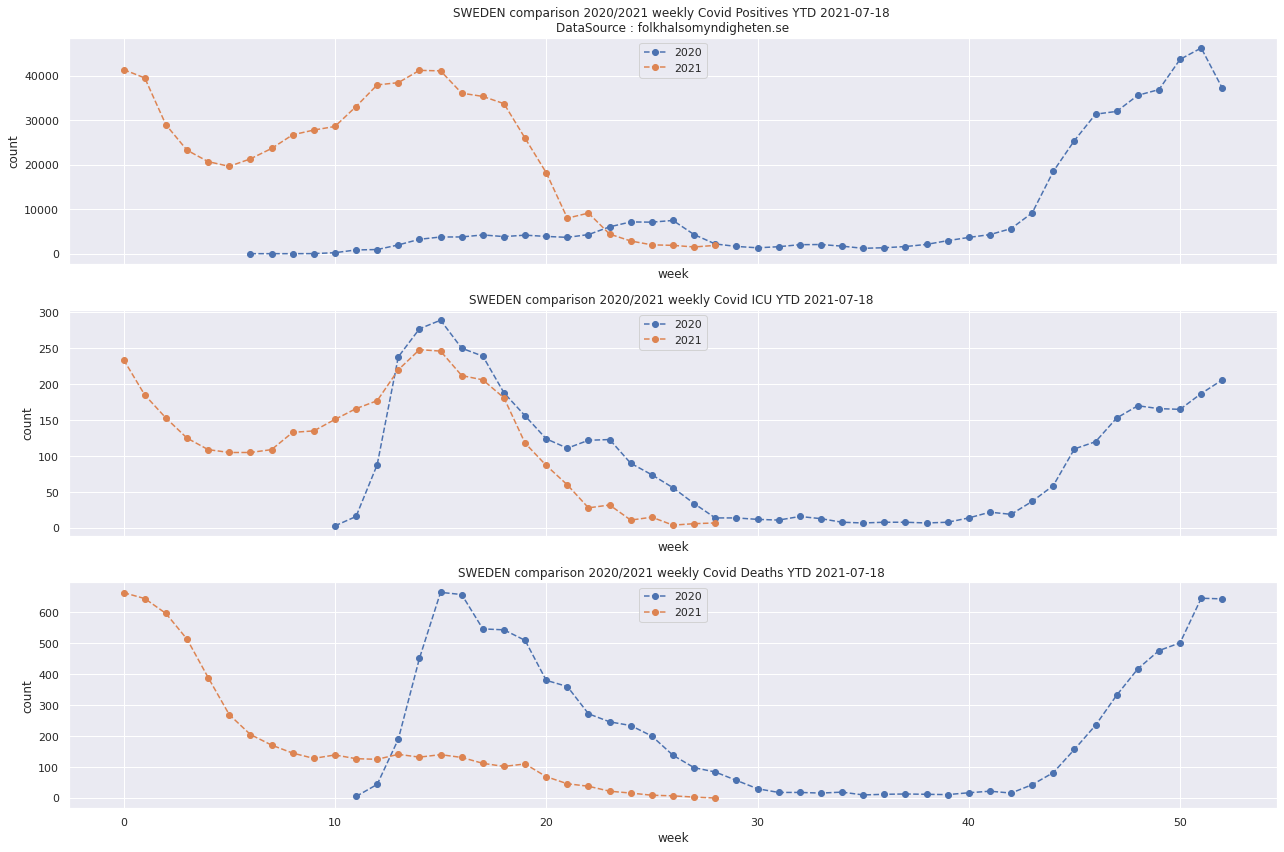

In [979]:
def fhm_plot_weekly_20_21(ax,df,title):
    
    ax.plot(np.array(df.loc['2020'].index.isocalendar()['week'].values).astype(int),
            df.loc['2020'],'o--',label='2020')

    #ax.plot(np.array(df.loc['2021'].index[1:-1].isocalendar()['week'].values).astype(int),
        #df.loc['2021'][1:-1],'o--',label='2021')
    
    ax.plot(np.array(df.loc['2021'].index.isocalendar()['week'].values[:-1]).astype(int) % 53,
        df.loc['2021'][:-1],'o--',label='2021')

    ax.set_xlabel('week')
    ax.set_ylabel('count')
    ax.legend(loc='upper center')
    ax.set_title(title)

credits = '\nDataSource : folkhalsomyndigheten.se'
fig,axes = plt.subplots(3,figsize=(18,12),sharex=True)

fhm_plot_weekly_20_21(axes[0],
    fhm_weekly_positive,'SWEDEN comparison 2020/2021 weekly Covid Positives YTD {} '.format(
    fhm_weekly_positive.index[-2].date()) + credits)

fhm_plot_weekly_20_21(axes[1],
    fhm_icu_weekly,'SWEDEN comparison 2020/2021 weekly Covid ICU YTD {} '.format(
    fhm_icu_weekly.index[-2].date()))

fhm_plot_weekly_20_21(axes[2],
    fhm_weekly_dead,'SWEDEN comparison 2020/2021 weekly Covid Deaths YTD {} '.format(
    fhm_weekly_dead.index[-2].date()))

plt.tight_layout()
plt.savefig('scb_excess_fhm_events_20_21.jpg',format='jpg')

In [980]:
dayofyear_baseline_mortality = mortality_all_grp_2015_2018.groupby(mortality_all_grp_2015_2018.index.dayofyear).mean()

In [981]:
dayofyear_baseline_mortality.to_pickle('day_of_year_age_grp_mortality.pkl')

In [982]:
pop_age_df['10_y_bin'] = pd.cut(
    pop_age_df.index.get_level_values(1),[-1,9,19,29,39,49,59,69,79,89,100],labels=fhm_age_grp_impact.index.values)

In [983]:
dead_age_df.loc['2020'].sum()

dead       98124
mid_bin     5095
dtype: int64

In [984]:
dead_bin_10 = dead_age_df.groupby(['year','10_y_bin'])['dead'].sum()
pop_bin_10 = pop_age_df.groupby(['year','10_y_bin'])['pop'].sum()

odds_dying = 1 / (dead_bin_10 / pop_bin_10)
mort = dead_bin_10 / pop_bin_10
mort

year  10_y_bin
2002  0-9         0.000429
      10-19       0.000208
      20-29       0.000491
      30-39       0.000641
      40-49       0.001578
                    ...   
2020  50-59       0.002842
      60-69       0.008279
      70-79       0.022863
      80-89       0.076659
      90+         0.233598
Length: 190, dtype: float64

In [985]:
pop_bin_10.loc['2020'].sum()


10378483

In [986]:
baseline_mort = mort.loc['2015' : '2018'].groupby('10_y_bin').mean()
1 / baseline_mort

10_y_bin
0-9      3192.232629
10-19    6216.586591
20-29    2069.045634
30-39    1702.652408
40-49     888.348490
50-59     338.813649
60-69     115.290135
70-79      45.349721
80-89      13.159253
90+         4.484549
dtype: float64

In [987]:
odds_unstacked = odds_dying.unstack()
odds_unstacked

10_y_bin        0-9          10-19        20-29        30-39       40-49  \
year                                                                       
2002      2333.248804  4807.795833  2038.287594  1559.766504  633.641275   
2003      2252.535211  4727.799197  2090.848249  1591.031211  625.176190   
2004      2346.140741  4886.241803  1935.673321  1682.383489  668.002778   
2005      2512.039683  5549.460465  2064.675676  1658.582447  695.212415   
2006      2352.780488  4887.333333  2156.924603  1645.594126  727.196952   
2007      2611.334218  4722.012048  2070.117537  1712.976090  717.485763   
2008      2818.287709  4760.156379  2005.358524  1697.723703  746.834115   
2009      2517.445255  4932.513043  2203.864916  1689.615599  754.787772   
2010      2703.757653  5164.434579  2122.138354  1856.840979  810.062578   
2011      3162.052632  5032.957944  2190.327465  1736.176471  812.891237   
2012      2841.733850  5590.328042  2242.904930  1714.430398  814.466625   
2013      2847.529262  6038.482759  2070.402866  1702.614951  837.565272   
2014      3315.793003  6292.497006  2157.887622  1699.201681  823.309227   
2015      3050.643799  5898.683333  1979.272593  1737.348442  898.402189   
2016      2932.296758  7295.228188  2264.141414  1645.460630  856.214567   
2017      3273.454795  6229.305556  2016.947605  1697.051383  874.169811   
2018      3587.770833  5672.049261  2038.506870  1734.015666  927.836442   
2019      3695.253823  6724.457143  2144.406149  1805.452381  973.043478   
2020      3407.085227  5874.901961  2241.567474  1876.710067  971.305970   

10_y_bin       50-59       60-69      70-79      80-89     90+    
year                                                              
2002      232.307764   93.415856  31.597586  10.867952  4.118442  
2003      240.386904   96.264493  32.432027  11.201110  4.318780  
2004      239.193762  100.293154  34.011235  11.646149  4.487818  
2005      238.630250  100.145603  34.358424  11.579801  4.364882  
2006      247.863099  104.197954  35.402557  11.663525  4.379410  
2007      257.240366  104.625388  36.636794  11.559171  4.299154  
2008      261.525067  105.402348  37.945318  11.640748  4.303754  
2009      265.543687  109.481912  38.849411  11.860997  4.468500  
2010      282.054621  107.765512  38.976863  11.996119  4.574508  
2011      286.485792  110.672274  40.616751  12.184269  4.603706  
2012      295.634957  110.314344  41.215847  12.034732  4.388581  
2013      301.009974  109.849449  43.004778  12.495551  4.503585  
2014      313.934169  111.422097  44.803519  12.906638  4.642105  
2015      317.968328  112.693047  44.713974  12.805240  4.517255  
2016      337.573593  113.948587  45.122368  13.210079  4.499178  
2017      349.506879  117.701734  45.878025  13.151526  4.422254  
2018      352.430175  116.966247  45.703524  13.488176  4.500728  
2019      369.143020  125.588255  47.593440  14.446395  4.756642  
2020      351.815352  120.782443  43.739399  13.044745  4.280864

In [988]:
mortality_ranking_2020 = np.zeros(len(odds_unstacked.columns))

for i, col in enumerate(odds_unstacked.columns):
    mortality_ranking_2020[i] = (odds_unstacked[col].sort_values().index == '2020').argmax() + 1
    
mortality_ranking_2020

array([17., 13., 17., 19., 18., 17., 18., 13., 15.,  2.])

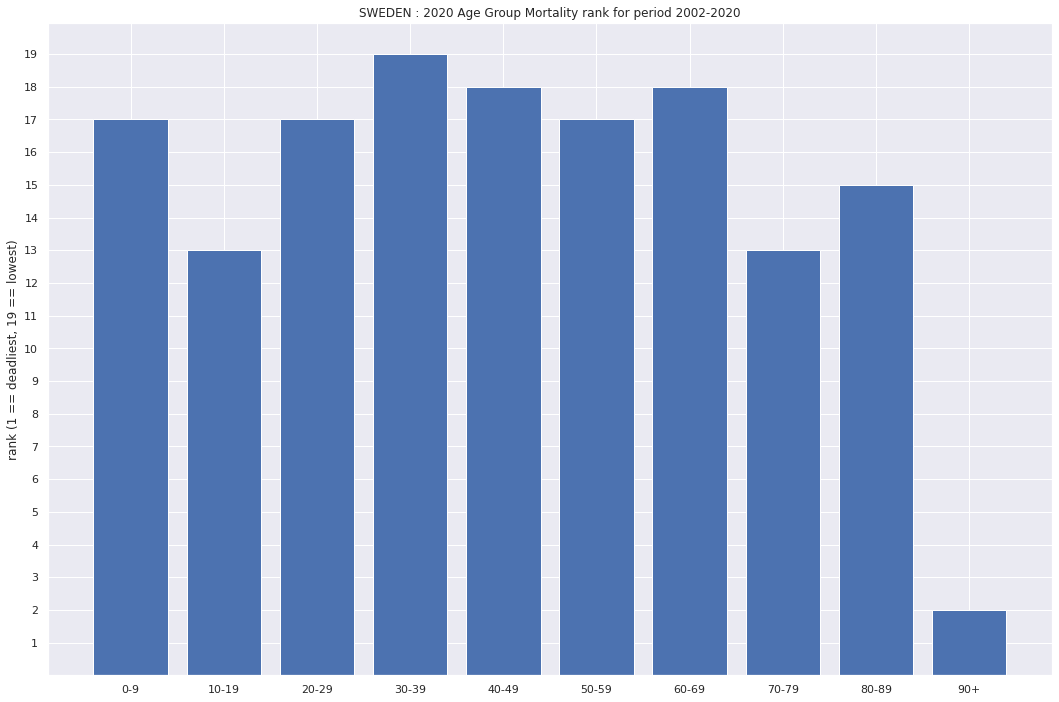

In [989]:
plt.figure(figsize=(18,12))
plt.title('SWEDEN : 2020 Age Group Mortality rank for period 2002-2020')
plt.bar(odds_unstacked.columns,mortality_ranking_2020)
plt.ylabel('rank (1 == deadliest, 19 == lowest)')
_= plt.yticks(range(1,len(odds_unstacked) + 1))

In [990]:
odds_unstacked.rank()

10_y_bin  0-9    10-19  20-29  30-39  40-49  50-59  60-69  70-79  80-89  90+  
year                                                                          
2002        2.0    4.0    5.0    1.0    2.0    1.0    1.0    1.0    1.0    1.0
2003        1.0    2.0   10.0    2.0    1.0    4.0    2.0    2.0    2.0    5.0
2004        3.0    5.0    1.0    6.0    3.0    3.0    4.0    3.0    6.0   11.0
2005        5.0   10.0    7.0    5.0    4.0    2.0    3.0    4.0    4.0    6.0
2006        4.0    6.0   13.0    4.0    6.0    5.0    5.0    5.0    7.0    7.0
2007        7.0    1.0    8.0   12.0    5.0    6.0    6.0    6.0    3.0    3.0
2008        9.0    3.0    3.0    9.0    7.0    7.0    7.0    7.0    5.0    4.0
2009        6.0    7.0   16.0    7.0    8.0    8.0    9.0    8.0    8.0   10.0
2010        8.0    9.0   11.0   18.0    9.0    9.0    8.0    9.0    9.0   16.0
2011       14.0    8.0   15.0   15.0   10.0   10.0   12.0   10.0   11.0   17.0
2012       10.0   11.0   18.0   13.0   11.0   11.0   11.0   11.0   10.0    8.0
2013       11.0   15.0    9.0   11.0   13.0   12.0   10.0   12.0   12.0   14.0
2014       16.0   17.0   14.0   10.0   12.0   13.0   13.0   15.0   14.0   18.0
2015       13.0   14.0    2.0   16.0   16.0   14.0   14.0   14.0   13.0   15.0
2016       12.0   19.0   19.0    3.0   14.0   15.0   15.0   16.0   17.0   12.0
2017       15.0   16.0    4.0    8.0   15.0   16.0   17.0   18.0   16.0    9.0
2018       18.0   12.0    6.0   14.0   17.0   18.0   16.0   17.0   18.0   13.0
2019       19.0   18.0   12.0   17.0   19.0   19.0   19.0   19.0   19.0   19.0
2020       17.0   13.0   17.0   19.0   18.0   17.0   18.0   13.0   15.0    2.0

In [991]:
odds_unstacked.loc['2015':].rank().astype(int)


10_y_bin  0-9    10-19  20-29  30-39  40-49  50-59  60-69  70-79  80-89  90+  
year                                                                          
2015          2      3      1      4      3      1      1      2      1      5
2016          1      6      6      1      1      2      2      3      4      3
2017          3      4      2      2      2      3      4      5      3      2
2018          5      1      3      3      4      5      3      4      5      4
2019          6      5      4      5      6      6      6      6      6      6
2020          4      2      5      6      5      4      5      1      2      1

In [992]:
mortality_2002_2020 = (dead_bin_10 / pop_bin_10).unstack()
mortality_2002_2020

10_y_bin     0-9       10-19     20-29     30-39     40-49     50-59  \
year                                                                   
2002      0.000429  0.000208  0.000491  0.000641  0.001578  0.004305   
2003      0.000444  0.000212  0.000478  0.000629  0.001600  0.004160   
2004      0.000426  0.000205  0.000517  0.000594  0.001497  0.004181   
2005      0.000398  0.000180  0.000484  0.000603  0.001438  0.004191   
2006      0.000425  0.000205  0.000464  0.000608  0.001375  0.004034   
2007      0.000383  0.000212  0.000483  0.000584  0.001394  0.003887   
2008      0.000355  0.000210  0.000499  0.000589  0.001339  0.003824   
2009      0.000397  0.000203  0.000454  0.000592  0.001325  0.003766   
2010      0.000370  0.000194  0.000471  0.000539  0.001234  0.003545   
2011      0.000316  0.000199  0.000457  0.000576  0.001230  0.003491   
2012      0.000352  0.000179  0.000446  0.000583  0.001228  0.003383   
2013      0.000351  0.000166  0.000483  0.000587  0.001194  0.003322   
2014      0.000302  0.000159  0.000463  0.000589  0.001215  0.003185   
2015      0.000328  0.000170  0.000505  0.000576  0.001113  0.003145   
2016      0.000341  0.000137  0.000442  0.000608  0.001168  0.002962   
2017      0.000305  0.000161  0.000496  0.000589  0.001144  0.002861   
2018      0.000279  0.000176  0.000491  0.000577  0.001078  0.002837   
2019      0.000271  0.000149  0.000466  0.000554  0.001028  0.002709   
2020      0.000294  0.000170  0.000446  0.000533  0.001030  0.002842   

10_y_bin     60-69     70-79     80-89     90+    
year                                              
2002      0.010705  0.031648  0.092014  0.242810  
2003      0.010388  0.030834  0.089277  0.231547  
2004      0.009971  0.029402  0.085865  0.222825  
2005      0.009985  0.029105  0.086357  0.229101  
2006      0.009597  0.028247  0.085737  0.228341  
2007      0.009558  0.027295  0.086511  0.232604  
2008      0.009487  0.026354  0.085905  0.232355  
2009      0.009134  0.025740  0.084310  0.223789  
2010      0.009279  0.025656  0.083360  0.218603  
2011      0.009036  0.024620  0.082073  0.217216  
2012      0.009065  0.024263  0.083093  0.227864  
2013      0.009103  0.023253  0.080028  0.222045  
2014      0.008975  0.022320  0.077480  0.215420  
2015      0.008874  0.022364  0.078093  0.221373  
2016      0.008776  0.022162  0.075700  0.222263  
2017      0.008496  0.021797  0.076037  0.226129  
2018      0.008549  0.021880  0.074139  0.222186  
2019      0.007963  0.021011  0.069221  0.210232  
2020      0.008279  0.022863  0.076659  0.233598

In [993]:
print ('highest mortality : ',mortality_2002_2020.idxmax())
print ('lowest mortality : ', mortality_2002_2020.idxmin())

highest mortality :  10_y_bin
0-9      2003
10-19    2007
20-29    2004
30-39    2002
40-49    2003
50-59    2002
60-69    2002
70-79    2002
80-89    2002
90+      2002
dtype: object
lowest mortality :  10_y_bin
0-9      2019
10-19    2016
20-29    2016
30-39    2020
40-49    2019
50-59    2019
60-69    2019
70-79    2019
80-89    2019
90+      2019
dtype: object


In [994]:
# ranking : deadliest year # 
mortality_2002_2020.rank(ascending=False).astype(int)

10_y_bin  0-9    10-19  20-29  30-39  40-49  50-59  60-69  70-79  80-89  90+  
year                                                                          
2002          2      4      5      1      2      1      1      1      1      1
2003          1      2     10      2      1      4      2      2      2      5
2004          3      5      1      6      3      3      4      3      6     11
2005          5     10      7      5      4      2      3      4      4      6
2006          4      6     13      4      6      5      5      5      7      7
2007          7      1      8     12      5      6      6      6      3      3
2008          9      3      3      9      7      7      7      7      5      4
2009          6      7     16      7      8      8      9      8      8     10
2010          8      9     11     18      9      9      8      9      9     16
2011         14      8     15     15     10     10     12     10     11     17
2012         10     11     18     13     11     11     11     11     10      8
2013         11     15      9     11     13     12     10     12     12     14
2014         16     17     14     10     12     13     13     15     14     18
2015         13     14      2     16     16     14     14     14     13     15
2016         12     19     19      3     14     15     15     16     17     12
2017         15     16      4      8     15     16     17     18     16      9
2018         18     12      6     14     17     18     16     17     18     13
2019         19     18     12     17     19     19     19     19     19     19
2020         17     13     17     19     18     17     18     13     15      2

/usr/local/lib64/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


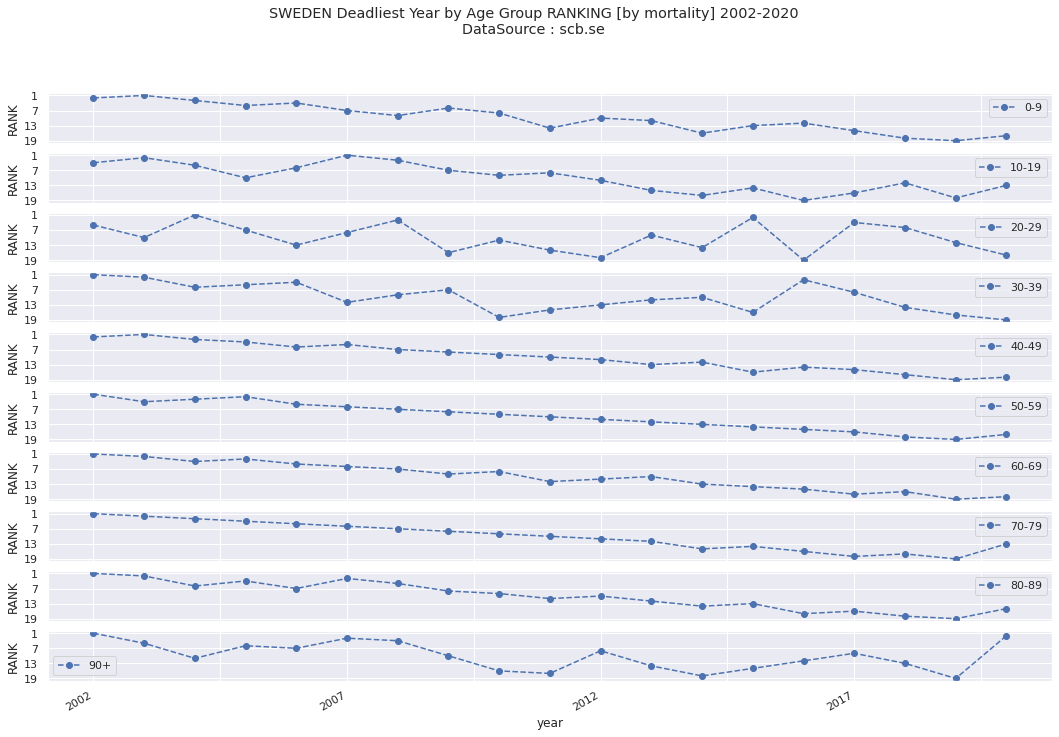

In [995]:
title = 'SWEDEN Deadliest Year by Age Group RANKING [by mortality] 2002-2020\nDataSource : scb.se'
axes = mortality_2002_2020.rank(ascending=False).astype(int).plot(figsize=(18,12),
                                                                  subplots=True,style='o--',title=title)

for a in axes:
    a.invert_yaxis()
    a.set_ylabel('RANK')
    a.set_yticks(np.arange(1,21,6))
    
plt.savefig('SCB_excess_deadliest_year_RANKING.jpg',format='jpg')

/usr/local/lib64/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


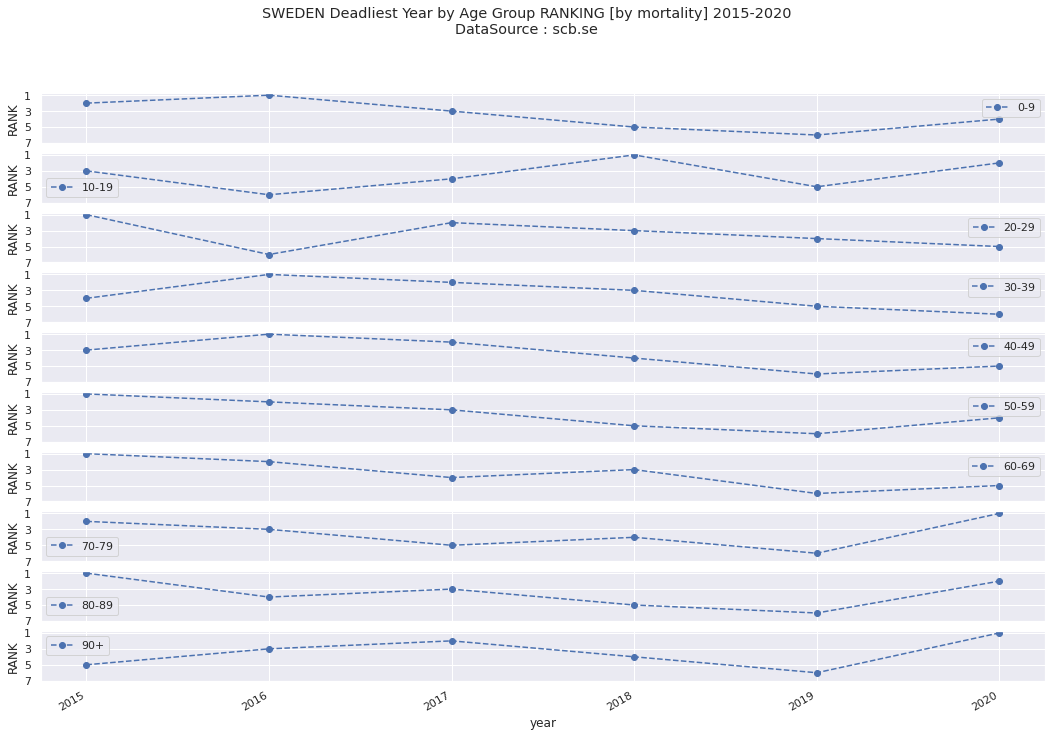

In [996]:
title = 'SWEDEN Deadliest Year by Age Group RANKING [by mortality] 2015-2020\nDataSource : scb.se'
axes = mortality_2002_2020.loc['2015':].rank(ascending=False).astype(int).plot(figsize=(18,12),
                                                                  subplots=True,style='o--',title=title)

for a in axes:
    a.invert_yaxis()
    a.set_ylabel('RANK')
    a.set_yticks(np.arange(1,8,2))
    
plt.savefig('SCB_excess_deadliest_year_RANKING_15_20.jpg',format='jpg')

In [997]:
mortality_2002_2020.loc['2015':].T.rank(ascending=False).astype(int)

year      2015  2016  2017  2018  2019  2020
10_y_bin                                    
0-9          9     9     9     9     9     9
10-19       10    10    10    10    10    10
20-29        8     8     8     8     8     8
30-39        7     7     7     7     7     7
40-49        6     6     6     6     6     6
50-59        5     5     5     5     5     5
60-69        4     4     4     4     4     4
70-79        3     3     3     3     3     3
80-89        2     2     2     2     2     2
90+          1     1     1     1     1     1

In [998]:
baseline_15_18_mort

10_y_bin
0-9      0.000313
10-19    0.000161
20-29    0.000483
30-39    0.000587
40-49    0.001126
50-59    0.002949
60-69    0.008675
70-79    0.022042
80-89    0.075971
90+      0.222991
dtype: float64

In [999]:
odds_dying.unstack().agg(['argmin','argmax'])

0-9  10-19  20-29  30-39  40-49  50-59  60-69  70-79  80-89  90+
argmin    1      5      2      0      1      0      0      0      0    0
argmax   17     14     14     18     17     17     17     17     17   17

In [1000]:
odds_dying.unstack().agg(['argmax'])

0-9  10-19  20-29  30-39  40-49  50-59  60-69  70-79  80-89  90+
argmax   17     14     14     18     17     17     17     17     17   17

In [1001]:
print ('least deadly year ', odds_dying.unstack().idxmax())
print ('most deadly year ', odds_dying.unstack().idxmin())

least deadly year  10_y_bin
0-9      2019
10-19    2016
20-29    2016
30-39    2020
40-49    2019
50-59    2019
60-69    2019
70-79    2019
80-89    2019
90+      2019
dtype: object
most deadly year  10_y_bin
0-9      2003
10-19    2007
20-29    2004
30-39    2002
40-49    2003
50-59    2002
60-69    2002
70-79    2002
80-89    2002
90+      2002
dtype: object


In [1002]:
prop_impacted_YTD_adj['covid_add_on_mortality'] = prop_impacted_YTD_adj['Totalt_antal_avlidna'] +\
prop_impacted_YTD_adj['baseline_15_18_all_cause_mortality']
prop_impacted_YTD_adj['baseline_odds'] = 1 / prop_impacted_YTD_adj['baseline_15_18_all_cause_mortality']
prop_impacted_YTD_adj['covid_add_on_odds'] = 1 / prop_impacted_YTD_adj['covid_add_on_mortality']
 
prop_impacted_YTD_adj.to_pickle('covid_prop_impacted_adj.pkl')

prop_impacted_YTD_adj

Totalt_antal_fall  Totalt_antal_intensivvårdade  \
10_year_bin                                                    
0-9                   0.016179                      0.000017   
10-19                 0.077435                      0.000026   
20-29                 0.094271                      0.000097   
30-39                 0.089171                      0.000156   
40-49                 0.099034                      0.000400   
50-59                 0.085733                      0.000809   
60-69                 0.051254                      0.001276   
70-79                 0.025514                      0.001209   
80-89                 0.034927                      0.000605   
90+                   0.067812                      0.000062   

             Totalt_antal_avlidna   bin_mid       CFR  \
10_year_bin                                             
0-9                      0.000005  0.000003  0.000299   
10-19                    0.000003  0.000008  0.000042   
20-29                    0.000011  0.000012  0.000116   
30-39                    0.000022  0.000016  0.000243   
40-49                    0.000057  0.000022  0.000579   
50-59                    0.000183  0.000027  0.002137   
60-69                    0.000600  0.000038  0.011703   
70-79                    0.002085  0.000048  0.081733   
80-89                    0.008514  0.000121  0.243768   
90+                      0.023534  0.000588  0.347052   

             baseline_15_18_all_cause_mortality  covid_add_on_mortality  \
10_year_bin                                                               
0-9                                    0.000313                0.000318   
10-19                                  0.000161                0.000164   
20-29                                  0.000483                0.000494   
30-39                                  0.000587                0.000609   
40-49                                  0.001126                0.001183   
50-59                                  0.002949                0.003132   
60-69                                  0.008675                0.009275   
70-79                                  0.022042                0.024127   
80-89                                  0.075971                0.084485   
90+                                    0.222991                0.246525   

             baseline_odds  covid_add_on_odds  
10_year_bin                                    
0-9            3195.372721        3146.797259  
10-19          6209.905899        6088.064596  
20-29          2069.233025        2023.465437  
30-39          1702.882392        1642.361191  
40-49           888.302694         845.226151  
50-59           339.063570         319.236666  
60-69           115.269911         107.815497  
70-79            45.368486          41.447221  
80-89            13.162871          11.836379  
90+               4.484480           4.056377

In [1003]:
1 / odds_dying.loc['2020']

10_y_bin
0-9      0.000294
10-19    0.000170
20-29    0.000446
30-39    0.000533
40-49    0.001030
50-59    0.002842
60-69    0.008279
70-79    0.022863
80-89    0.076659
90+      0.233598
dtype: float64

In [1004]:
# actual mortality greater than baseline mortality #
mort_vs_baseline = 1 / (odds_dying.unstack()) > prop_impacted_YTD_adj['baseline_15_18_all_cause_mortality']
mort_vs_baseline

10_y_bin  0-9    10-19  20-29  30-39  40-49  50-59  60-69  70-79  80-89  90+  
year                                                                          
2002       True   True   True   True   True   True   True   True   True   True
2003       True   True  False   True   True   True   True   True   True   True
2004       True   True   True   True   True   True   True   True   True  False
2005       True   True   True   True   True   True   True   True   True   True
2006       True   True  False   True   True   True   True   True   True   True
2007       True   True  False  False   True   True   True   True   True   True
2008       True   True   True   True   True   True   True   True   True   True
2009       True   True  False   True   True   True   True   True   True   True
2010       True   True  False  False   True   True   True   True   True  False
2011       True   True  False  False   True   True   True   True   True  False
2012       True   True  False  False   True   True   True   True   True   True
2013       True   True  False   True   True   True   True   True   True  False
2014      False  False  False   True   True   True   True   True   True  False
2015       True   True   True  False  False   True   True   True   True  False
2016       True  False  False   True   True   True   True   True  False  False
2017      False  False   True   True   True  False  False  False   True   True
2018      False   True   True  False  False  False  False  False  False  False
2019      False  False  False  False  False  False  False  False  False  False
2020      False   True  False  False  False  False  False   True   True   True

/usr/local/lib64/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


array([<AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>,
       <AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>,
       <AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>,
       <AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>,
       <AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>],
      dtype=object)

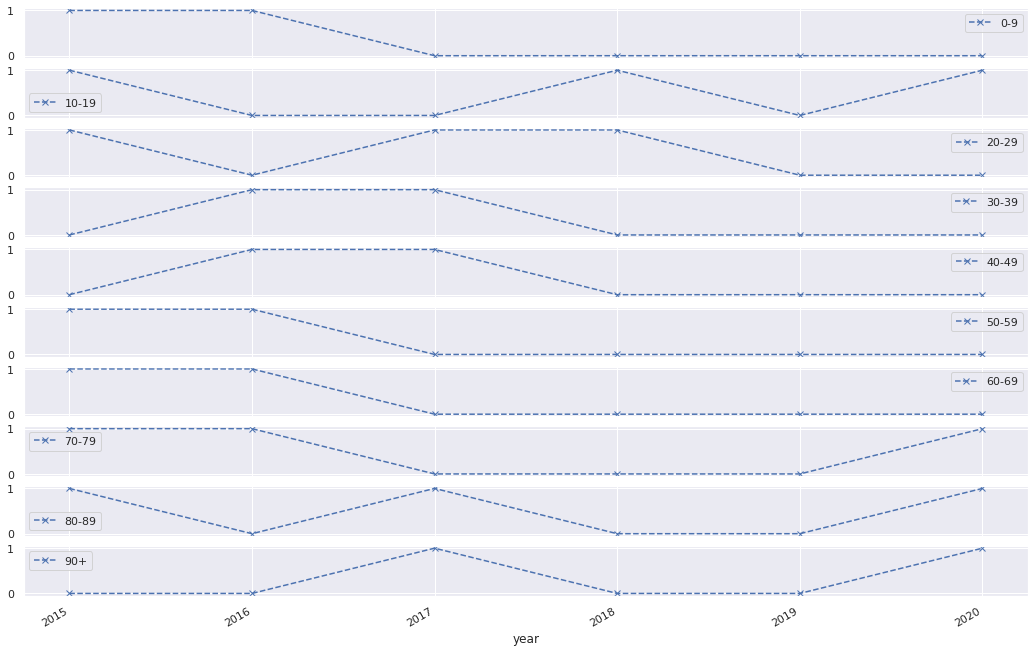

In [1005]:
mort_vs_baseline.loc['2015':].astype(int).plot(figsize=(18,12),style='x--',subplots=True)

In [1006]:
# actual mortality greater than baseline + covid induced mortality
mort_vs_baseline_and_covid = 1 / (odds_dying.unstack()) > prop_impacted_YTD_adj['Totalt_antal_avlidna'] + prop_impacted_YTD_adj['baseline_15_18_all_cause_mortality']
mort_vs_baseline_and_covid

10_y_bin  0-9    10-19  20-29  30-39  40-49  50-59  60-69  70-79  80-89  90+  
year                                                                          
2002       True   True  False   True   True   True   True   True   True  False
2003       True   True  False   True   True   True   True   True   True  False
2004       True   True   True  False   True   True   True   True   True  False
2005       True   True  False  False   True   True   True   True   True  False
2006       True   True  False  False   True   True   True   True   True  False
2007       True   True  False  False   True   True   True   True   True  False
2008       True   True   True  False   True   True   True   True   True  False
2009       True   True  False  False   True   True  False   True  False  False
2010       True   True  False  False   True   True   True   True  False  False
2011      False   True  False  False   True   True  False   True  False  False
2012       True   True  False  False   True   True  False   True  False  False
2013       True   True  False  False   True   True  False  False  False  False
2014      False  False  False  False   True   True  False  False  False  False
2015       True   True   True  False  False   True  False  False  False  False
2016       True  False  False  False  False  False  False  False  False  False
2017      False  False   True  False  False  False  False  False  False  False
2018      False   True  False  False  False  False  False  False  False  False
2019      False  False  False  False  False  False  False  False  False  False
2020      False   True  False  False  False  False  False  False  False  False

In [1007]:
mort_vs_baseline.sum(axis=1)

year
2002    10
2003     9
2004     9
2005    10
2006     9
2007     8
2008    10
2009     9
2010     7
2011     7
2012     8
2013     8
2014     6
2015     7
2016     6
2017     5
2018     2
2019     0
2020     4
dtype: int64

In [1008]:
mort_vs_baseline_and_covid.sum(axis=1)

year
2002    8
2003    8
2004    8
2005    7
2006    7
2007    7
2008    8
2009    5
2010    6
2011    4
2012    5
2013    4
2014    2
2015    4
2016    1
2017    1
2018    1
2019    0
2020    1
dtype: int64

In [1009]:
baseline_15_18_mort

10_y_bin
0-9      0.000313
10-19    0.000161
20-29    0.000483
30-39    0.000587
40-49    0.001126
50-59    0.002949
60-69    0.008675
70-79    0.022042
80-89    0.075971
90+      0.222991
dtype: float64

In [1010]:
1 / (odds_dying.unstack())

10_y_bin     0-9       10-19     20-29     30-39     40-49     50-59  \
year                                                                   
2002      0.000429  0.000208  0.000491  0.000641  0.001578  0.004305   
2003      0.000444  0.000212  0.000478  0.000629  0.001600  0.004160   
2004      0.000426  0.000205  0.000517  0.000594  0.001497  0.004181   
2005      0.000398  0.000180  0.000484  0.000603  0.001438  0.004191   
2006      0.000425  0.000205  0.000464  0.000608  0.001375  0.004034   
2007      0.000383  0.000212  0.000483  0.000584  0.001394  0.003887   
2008      0.000355  0.000210  0.000499  0.000589  0.001339  0.003824   
2009      0.000397  0.000203  0.000454  0.000592  0.001325  0.003766   
2010      0.000370  0.000194  0.000471  0.000539  0.001234  0.003545   
2011      0.000316  0.000199  0.000457  0.000576  0.001230  0.003491   
2012      0.000352  0.000179  0.000446  0.000583  0.001228  0.003383   
2013      0.000351  0.000166  0.000483  0.000587  0.001194  0.003322   
2014      0.000302  0.000159  0.000463  0.000589  0.001215  0.003185   
2015      0.000328  0.000170  0.000505  0.000576  0.001113  0.003145   
2016      0.000341  0.000137  0.000442  0.000608  0.001168  0.002962   
2017      0.000305  0.000161  0.000496  0.000589  0.001144  0.002861   
2018      0.000279  0.000176  0.000491  0.000577  0.001078  0.002837   
2019      0.000271  0.000149  0.000466  0.000554  0.001028  0.002709   
2020      0.000294  0.000170  0.000446  0.000533  0.001030  0.002842   

10_y_bin     60-69     70-79     80-89     90+    
year                                              
2002      0.010705  0.031648  0.092014  0.242810  
2003      0.010388  0.030834  0.089277  0.231547  
2004      0.009971  0.029402  0.085865  0.222825  
2005      0.009985  0.029105  0.086357  0.229101  
2006      0.009597  0.028247  0.085737  0.228341  
2007      0.009558  0.027295  0.086511  0.232604  
2008      0.009487  0.026354  0.085905  0.232355  
2009      0.009134  0.025740  0.084310  0.223789  
2010      0.009279  0.025656  0.083360  0.218603  
2011      0.009036  0.024620  0.082073  0.217216  
2012      0.009065  0.024263  0.083093  0.227864  
2013      0.009103  0.023253  0.080028  0.222045  
2014      0.008975  0.022320  0.077480  0.215420  
2015      0.008874  0.022364  0.078093  0.221373  
2016      0.008776  0.022162  0.075700  0.222263  
2017      0.008496  0.021797  0.076037  0.226129  
2018      0.008549  0.021880  0.074139  0.222186  
2019      0.007963  0.021011  0.069221  0.210232  
2020      0.008279  0.022863  0.076659  0.233598

In [1011]:
### SECTION ###
season_age_grp_deaths = grp_daily_corrected_monthly.loc['2015-10':]
season_age_grp_deaths['season'] = pd.cut(season_age_grp_deaths.index,
                                         [pd.to_datetime('2015-09-30'),pd.to_datetime('2016-09-30'),
                                    pd.to_datetime('2017-09-30'),pd.to_datetime('2018-09-30'),
                                   pd.to_datetime('2019-09-30'),pd.to_datetime('2020-09-30'),
                                   pd.to_datetime('2021-09-30')],labels=['2015/2016','2016/2017',
                                                                        '2017/2018','2018/2019',
                                                                        '2019/2020','2020/2021'])

season_last_date = grp_daily_corrected.index[-1].date()

season_age_grp_deaths

<ipython-input-1011-618c0c0a9f2a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  season_age_grp_deaths['season'] = pd.cut(season_age_grp_deaths.index,


-64        65-79        80-89          90+     season
date                                                                     
2015-10-31   871.830310  2070.572444  2620.196723  1661.222473  2015/2016
2015-11-30   851.097128  2120.331174  2524.789024  1799.490689  2015/2016
2015-12-31   910.186697  2215.786696  2817.037872  1960.803607  2015/2016
2016-01-31  1025.877063  2442.111961  3063.704300  2201.927291  2015/2016
2016-02-29   949.607669  2214.002602  2735.414192  1941.991480  2015/2016
...                 ...          ...          ...          ...        ...
2021-03-31   891.096897  2477.360772  2659.012837  1775.888638  2020/2021
2021-04-30   902.193994  2370.011946  2433.123365  1641.214571  2020/2021
2021-05-31   915.510511  2285.591995  2438.188152  1627.144146  2020/2021
2021-06-30   796.771572  2112.583207  2193.052492  1431.163226  2020/2021
2021-07-31   306.279880   748.315117   785.041885   595.983001  2020/2021

[70 rows x 5 columns]

array([<AxesSubplot:title={'center':'-64'}, xlabel='date'>,
       <AxesSubplot:title={'center':'65-79'}, xlabel='date'>,
       <AxesSubplot:title={'center':'80-89'}, xlabel='date'>,
       <AxesSubplot:title={'center':'90+'}, xlabel='date'>], dtype=object)

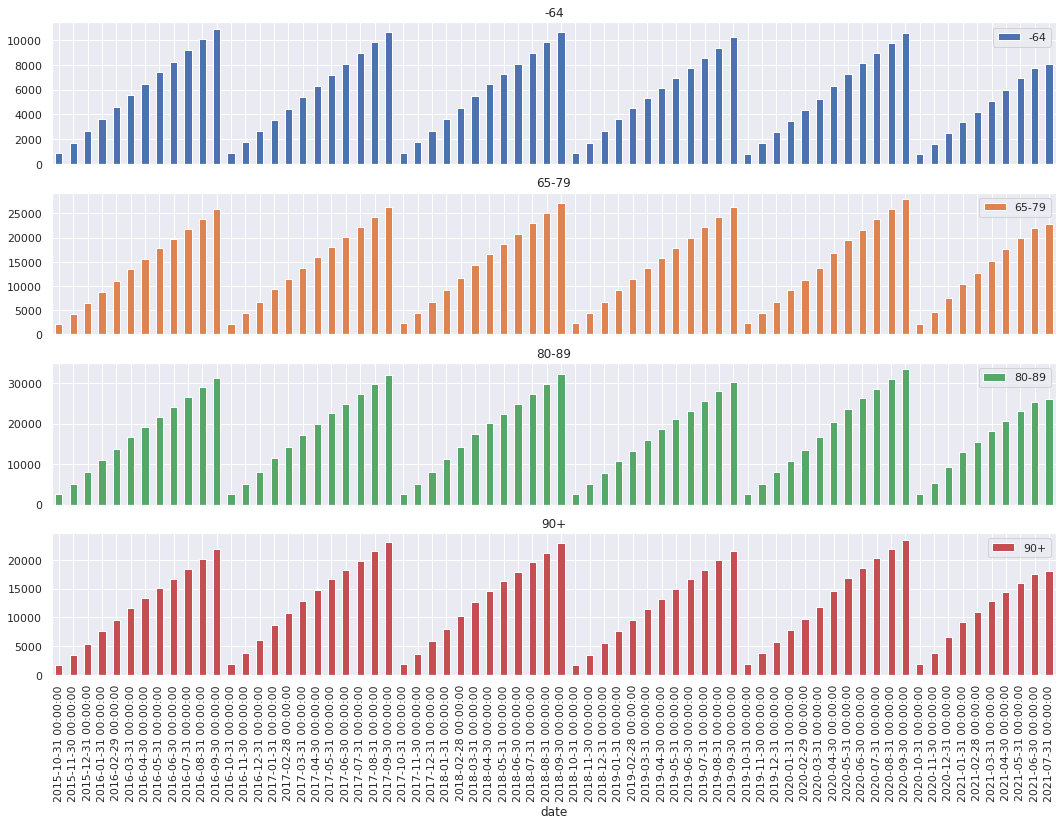

In [1012]:
season_age_grp_deaths.groupby('season').cumsum().plot(figsize=(18,12),kind='bar',subplots=True)

In [1013]:
### ASSUME 2021 POPULATION IS SAME AS 2020 - MAKE MORTALITY WORSTCASE ###

season_pop = pop_age_df.groupby(['year','scb_prel_age_bin']).sum().loc['2015':]

season_20_21 = season_pop.loc['2020']
season_20_21.index = pd.MultiIndex.from_arrays([['2021'] * 4,['-64','65-79','80-89','90+']])
season_pop = season_pop.append(season_20_21)

season_age_grp_pop = ((season_pop.unstack() + season_pop.unstack().shift()) / 2).dropna()
season_age_grp_pop.index = ['2015/2016','2016/2017','2017/2018','2018/2019','2019/2020','2020/2021']
season_age_grp_pop = season_age_grp_pop.droplevel(0,axis=1)
season_age_grp_pop

scb_prel_age_bin      -64        65-79     80-89     90+  
2015/2016         7927438.5  1462037.5  412871.0  100680.5
2016/2017         8030524.5  1486097.5  417948.5  101266.0
2017/2018         8125321.0  1507882.5  424807.5  101661.5
2018/2019         8203549.0  1525646.5  435448.5  102747.0
2019/2020         8257190.5  1541546.0  446491.0  103750.5
2020/2021         8273794.0  1549655.0  451009.0  104025.0

In [1014]:
season_months_idx = season_age_grp_deaths.index

In [1015]:
last_good_date.date()

datetime.date(2021, 6, 30)

/usr/local/lib64/python3.8/site-packages/pandas/plotting/_matplotlib/__init__.py:61: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes
  plot_obj.generate()


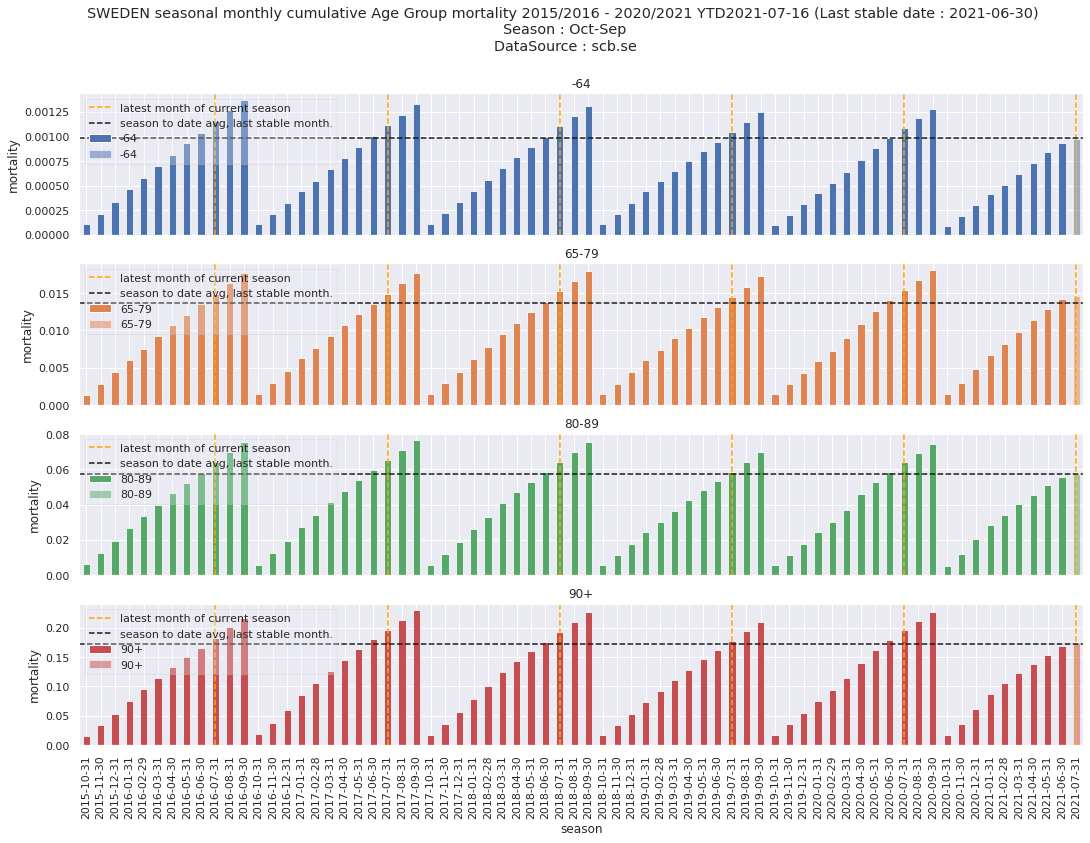

In [1016]:
title = 'SWEDEN seasonal monthly cumulative Age Group mortality 2015/2016 - 2020/2021 YTD{} (Last stable date : {}) \nSeason : Oct-Sep\nDataSource : scb.se'.format(
season_last_date,last_good_date.date())

season_age_grp_monthly_mort = season_age_grp_deaths.set_index('season') / season_age_grp_pop
season_age_grp_monthly_mort['idx'] = season_months_idx

axes = season_age_grp_monthly_mort.reset_index().set_index('idx').groupby('index').cumsum()[:-1].plot(
    figsize=(18,12),kind='bar',subplots=True,sharex=True,title=title)

season_age_grp_monthly_mort.reset_index().set_index('idx').groupby('index').cumsum().plot(
    kind='bar',subplots=True,sharex=True,ax=axes,alpha=0.5)

foo = season_age_grp_monthly_mort.groupby(season_age_grp_monthly_mort.index).cumsum().reset_index()
foo.index = season_months_idx
grp_means_by_last_month = foo.loc[foo.index.month==last_seasonal_month - 1].mean()


for k,a in enumerate(axes):
    
    label = 'latest month of current season'
    for i in range(len(seasonal_monthly_mortality)):
        if seasonal_monthly_mortality.index[i].month == last_seasonal_month:
            a.axvline(i,color='orange',ls='dashed',label=label)
            label=None
            
    a.axhline(grp_means_by_last_month[k],color='k',ls='dashed',label='season to date avg, last stable month.')

    a.legend(loc='upper left',framealpha=0.3)
    a.set_ylabel('mortality')
    
 
plt.xlabel('season')
_=plt.xticks(range(len(season_months_idx)),season_months_idx.date)

plt.savefig('season_age_grp_cumulative_mort.jpg',format='jpg')

In [1017]:
season_age_grp_monthly_mort

-64     65-79     80-89       90+        idx
2015/2016  0.000110  0.001416  0.006346  0.016500 2015-10-31
2015/2016  0.000107  0.001450  0.006115  0.017873 2015-11-30
2015/2016  0.000115  0.001516  0.006823  0.019476 2015-12-31
2015/2016  0.000129  0.001670  0.007420  0.021870 2016-01-31
2015/2016  0.000120  0.001514  0.006625  0.019289 2016-02-29
...             ...       ...       ...       ...        ...
2020/2021  0.000108  0.001599  0.005896  0.017072 2021-03-31
2020/2021  0.000109  0.001529  0.005395  0.015777 2021-04-30
2020/2021  0.000111  0.001475  0.005406  0.015642 2021-05-31
2020/2021  0.000096  0.001363  0.004863  0.013758 2021-06-30
2020/2021  0.000037  0.000483  0.001741  0.005729 2021-07-31

[70 rows x 5 columns]

In [1018]:
season_avg_mort = season_age_grp_monthly_mort.loc['2015/2016' : '2017/2018']

season_avg_mort_year = season_avg_mort.groupby(season_avg_mort.index).sum().mean()
season_avg_mort_year

-64      0.001336
65-79    0.017801
80-89    0.076018
90+      0.223946
dtype: float64

In [1019]:
season_expectation = season_age_grp_pop * season_avg_mort_year
season_expectation_tot = season_expectation.sum(axis=1)
season_expectation_tot

2015/2016    90551.835209
2016/2017    91634.984124
2017/2018    92759.434688
2018/2019    94232.189293
2019/2020    95651.056683
2020/2021    96222.515256
dtype: float64

In [1020]:
season_excess_grp = season_age_grp_deaths.groupby('season').sum() - season_expectation
season_excess_grp

-64        65-79        80-89          90+
season                                                       
2015/2016   276.838823  -155.569379   -90.755801  -705.342084
2016/2017   -61.976887  -175.397801   239.161019   524.013368
2017/2018  -221.040702   338.416549  -149.706278   186.154790
2018/2019  -745.173989  -850.102970 -2733.282611 -1471.808289
2019/2020  -475.690037   467.038760  -586.976521   296.701563
2020/2021 -3029.685047 -4831.644924 -8299.700716 -5224.141250

-64        65-79        80-89          90+     season
date                                                                     
2015-10-31   871.830310  2070.572444  2620.196723  1661.222473  2015/2016
2015-11-30   851.097128  2120.331174  2524.789024  1799.490689  2015/2016
2015-12-31   910.186697  2215.786696  2817.037872  1960.803607  2015/2016
2016-01-31  1025.877063  2442.111961  3063.704300  2201.927291  2015/2016
2016-02-29   949.607669  2214.002602  2735.414192  1941.991480  2015/2016
...                 ...          ...          ...          ...        ...
2021-03-31   891.096897  2477.360772  2659.012837  1775.888638  2020/2021
2021-04-30   902.193994  2370.011946  2433.123365  1641.214571  2020/2021
2021-05-31   915.510511  2285.591995  2438.188152  1627.144146  2020/2021
2021-06-30   796.771572  2112.583207  2193.052492  1431.163226  2020/2021
2021-07-31   306.279880   748.315117   785.041885   595.983001  2020/2021

[70 rows x 5 columns]

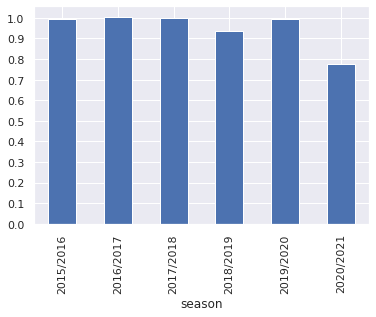

In [1021]:
(season_age_grp_deaths.groupby('season').sum().sum(axis=1) / season_expectation_tot).plot(kind='bar')
_=plt.yticks(np.arange(0,1.1,0.10))

season_age_grp_deaths

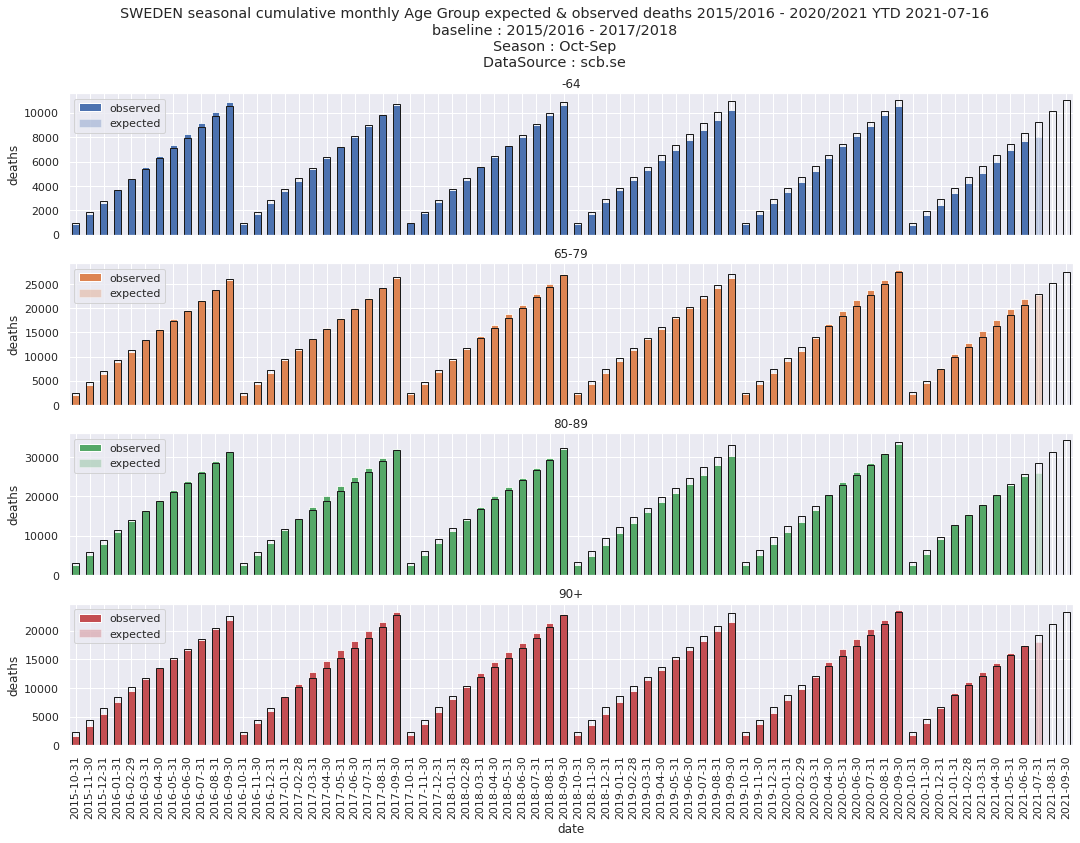

In [1022]:
### 2 DO - verify and beautify ###
### seasonal cumulative monthly expected and observed deaths ### 

title = 'SWEDEN seasonal cumulative monthly Age Group expected & observed deaths 2015/2016 - 2020/2021 YTD {}\nbaseline : 2015/2016 - 2017/2018\nSeason : Oct-Sep\nDataSource : scb.se'.format(
season_last_date)
axes = season_age_grp_deaths.groupby('season').cumsum()[:-1].plot(figsize=(18,12),subplots=True,kind='bar',title=title)
season_age_grp_deaths.groupby('season').cumsum().plot(ax=axes,subplots=True,kind='bar',alpha=0.3)

baseline_monthly_avg_mort = season_age_grp_monthly_mort.loc['2015/2016' :'2017/2018'].set_index('idx')
baseline_monthly_avg_cum_mort = baseline_monthly_avg_mort.groupby(
    baseline_monthly_avg_mort.index.month).mean().cumsum()

all_seasons_baseline = pd.concat([baseline_monthly_avg_cum_mort] * 6)

season_idx_base = ['2015/2016'] * 12 + ['2016/2017'] * 12 + ['2017/2018'] * 12 + ['2018/2019'] * 12 +\
['2019/2020'] * 12 + ['2020/2021'] * 12

all_seasons_baseline.index = season_idx_base
age_grp_expected_monthly_deaths = all_seasons_baseline * season_age_grp_pop
age_grp_expected_monthly_deaths.index = pd.date_range('2015-10-01','2021-09-30',freq='M')

age_grp_expected_monthly_deaths.plot(ax=axes,figsize=(18,12),kind='bar',subplots=True,color='none',edgecolor='k')

for a in axes:
    a.set_ylabel('deaths')
    a.legend(['observed','expected'])

_=plt.xticks(range(len(age_grp_expected_monthly_deaths.index)),age_grp_expected_monthly_deaths.index.date)

age_grp_expected_monthly_deaths.sum(axis=1)

plt.savefig('seasonal_monthly_cum_age_grp_expected_observed_deaths.jpg',format='jpg')

/usr/local/lib64/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


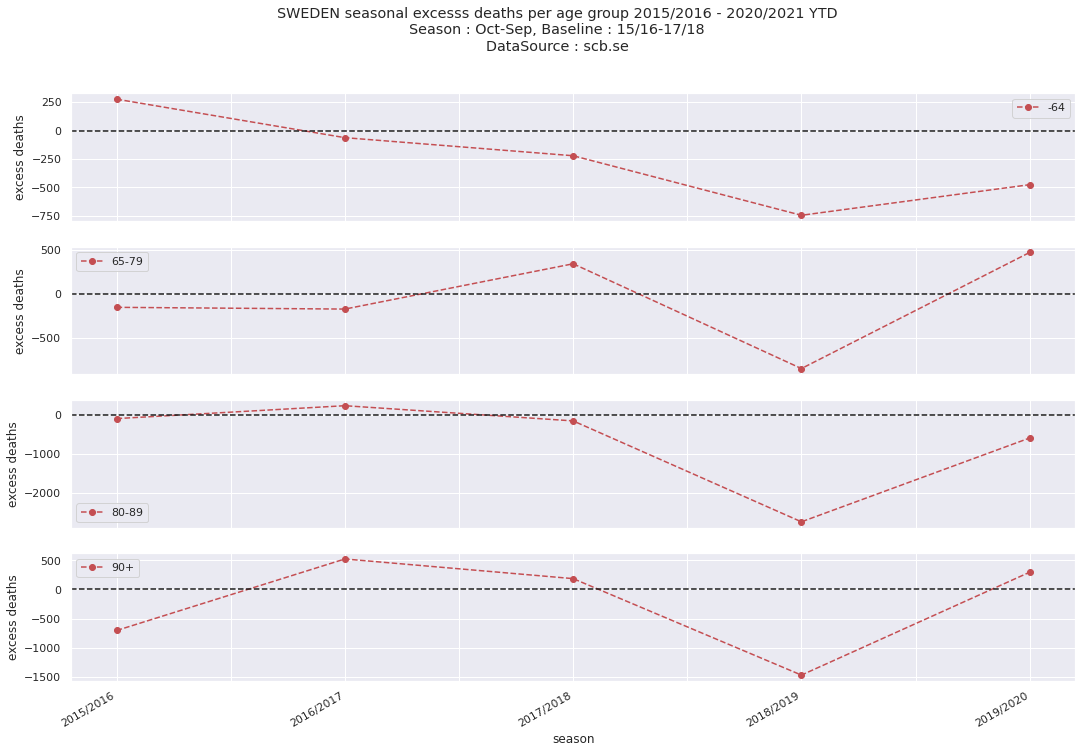

In [1023]:
title = 'SWEDEN seasonal excesss deaths per age group 2015/2016 - 2020/2021 YTD\nSeason : Oct-Sep, Baseline : 15/16-17/18\nDataSource : scb.se'

axes = season_excess_grp[:-1].plot(figsize=(18,12),subplots=True,style='ro--',title=title)

for a in axes:
    a.axhline(0,color='k',ls='dashed')
    a.set_ylabel('excess deaths')
    
plt.savefig('seasonal_excess_age_grp.jpg',format='jpg')

In [1024]:
season_excess_grp.sum(axis=1)

season
2015/2016     -674.828442
2016/2017      525.799700
2017/2018      153.824359
2018/2019    -5800.367859
2019/2020     -298.926236
2020/2021   -21385.171937
dtype: float64

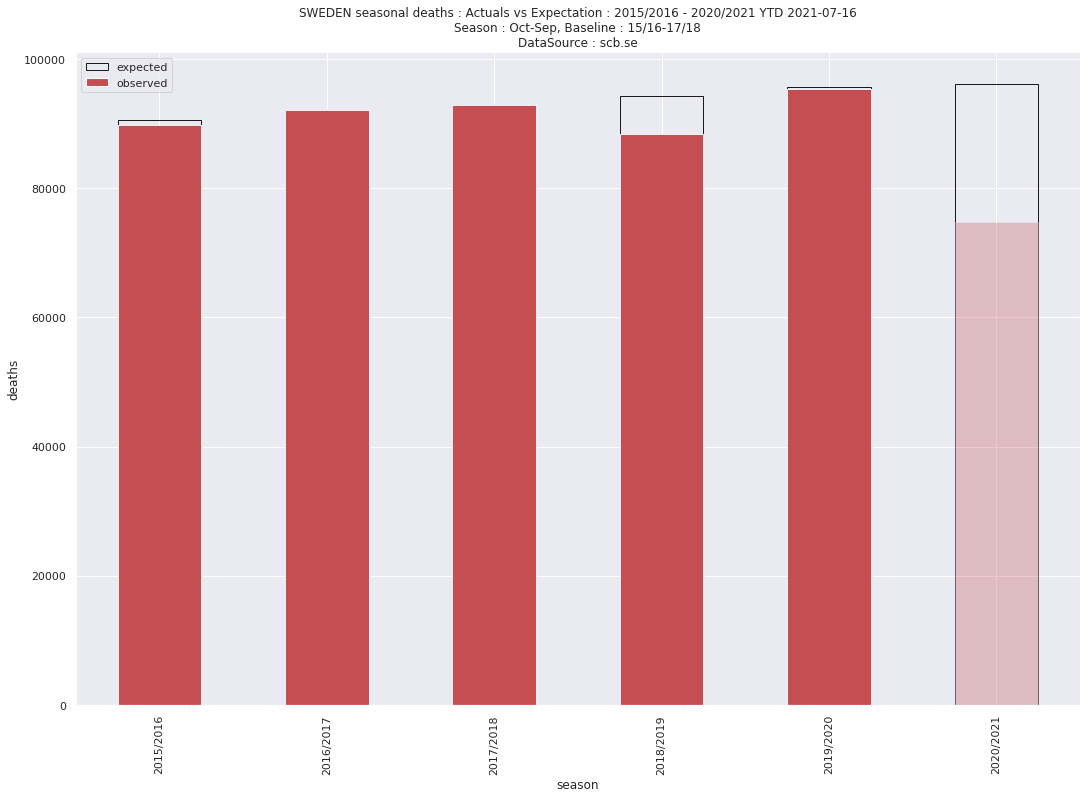

In [1025]:
title = 'SWEDEN seasonal deaths : Actuals vs Expectation : 2015/2016 - 2020/2021 YTD {}\nSeason : Oct-Sep, Baseline : 15/16-17/18\nDataSource : scb.se'.format(
season_last_date)

ax = season_expectation_tot.plot(figsize=(18,12),kind='bar',edgecolor='k',color='none',
                                 title=title,label='observed')
season_actuals_tot = season_age_grp_deaths.groupby('season').sum().sum(axis=1)
season_actuals_tot[:-1].plot(kind='bar',ax=ax,color='r',label='expected')
season_actuals_tot.plot(ax=ax,kind='bar',color='r',alpha=0.3)

plt.legend(['expected','observed'],loc='upper left')
plt.ylabel('deaths')
plt.savefig('seasonal_actuals_vs_expected.jpg',format='jpg')

In [1026]:
### section ###
no_bins['mortality']
no_bins.to_pickle('pop_death_data.pkl')

In [1027]:
### pattern ###

old_lim = 80

old_pop_grps = pop_age_df.loc[pd.IndexSlice[:,old_lim:],:]
old_pop = old_pop_grps.groupby('year').sum()
print (old_pop_grps.loc['2020'])
old_pop

           pop scb_prel_age_bin 10_y_bin
num_age                                 
80       65572            80-89    80-89
81       62822            80-89    80-89
82       57538            80-89    80-89
83       51316            80-89    80-89
84       46865            80-89    80-89
85       41245            80-89    80-89
86       36589            80-89    80-89
87       32840            80-89    80-89
88       29941            80-89    80-89
89       26281            80-89    80-89
90       22854              90+      90+
91       18604              90+      90+
92       15717              90+      90+
93       12488              90+      90+
94        9806              90+      90+
95        7538              90+      90+
96        5709              90+      90+
97        3972              90+      90+
98        2707              90+      90+
99        1915              90+      90+
100       2715              90+      90+


pop
year        
2002  479241
2003  485149
2004  491575
2005  496135
2006  499645
2007  500447
2008  502715
2009  503446
2010  506568
2011  507591
2012  507687
2013  506807
2014  508608
2015  510670
2016  516433
2017  521996
2018  530942
2019  545449
2020  555034

In [1028]:
all_pop = pop_age_df.groupby('year').sum()
all_pop

pop
year          
2002   8939367
2003   8973472
2004   9008883
2005   9042663
2006   9107935
2007   9174464
2008   9248976
2009   9331619
2010   9408320
2011   9476105
2012   9546448
2013   9633589
2014   9737559
2015   9838418
2016   9967637
2017  10104036
2018  10215309
2019  10319473
2020  10378483

In [1029]:
prop_old_pop = old_pop / all_pop
prop_old_pop

pop
year          
2002  0.053610
2003  0.054065
2004  0.054566
2005  0.054866
2006  0.054858
2007  0.054548
2008  0.054354
2009  0.053951
2010  0.053843
2011  0.053565
2012  0.053181
2013  0.052608
2014  0.052232
2015  0.051906
2016  0.051811
2017  0.051662
2018  0.051975
2019  0.052856
2020  0.053479

<AxesSubplot:xlabel='year'>

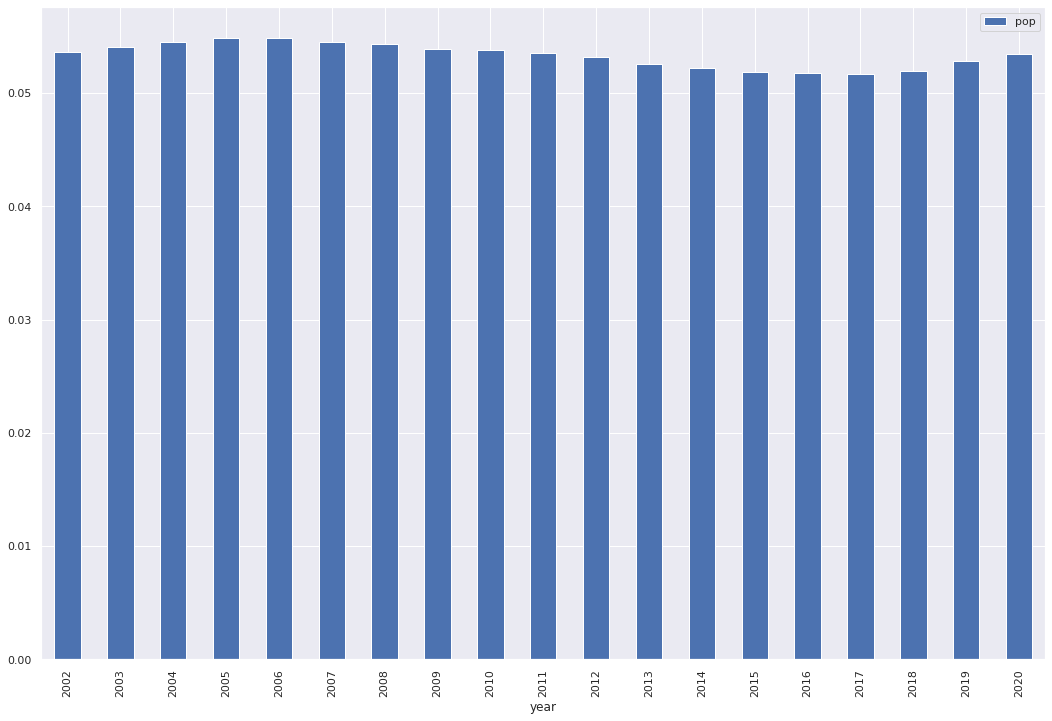

In [1030]:
prop_old_pop.plot(kind='bar',figsize=(18,12))

0.36202520914397895 -0.009712096071166425


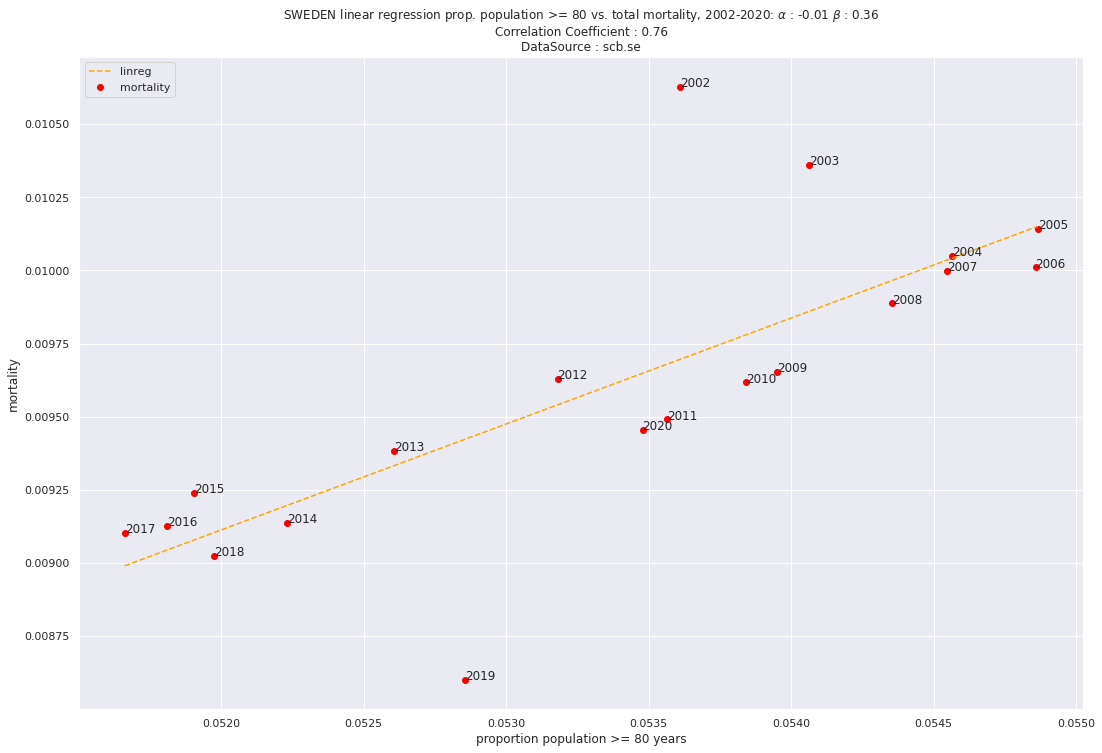

In [1031]:
import scipy.stats as sps

slope,intercept,_,_,_ = sps.linregress(prop_old_pop['pop'],no_bins['mortality'])

print (slope,intercept)
corr_coef = np.corrcoef(prop_old_pop['pop'],no_bins['mortality'])

X_vals = np.linspace(prop_old_pop['pop'].min(),prop_old_pop['pop'].max(),100)
Y_vals = slope * X_vals + intercept

plt.figure(figsize=(18,12))
title = 'SWEDEN linear regression prop. population >= {} vs. total mortality, 2002-2020'.format(old_lim)+\
r': $\alpha$ : {:.2f} $\beta$ : {:.2f}'.format(
    intercept,slope) + '\nCorrelation Coefficient : {:.2f}\nDataSource : scb.se'.format(corr_coef[0,1]) 

plt.scatter(prop_old_pop,no_bins['mortality'],label='mortality',color='red')
plt.plot(X_vals,Y_vals,ls='dashed',color='orange',label='linreg')

annotate_xy = list(zip(prop_old_pop['pop'],no_bins['mortality']))

for i in range(len(prop_old_pop)):
    plt.annotate(prop_old_pop.index[i],annotate_xy[i])

plt.title(title)
plt.ylabel('mortality')
plt.xlabel('proportion population >= {} years'.format(old_lim))
_= plt.legend(loc='upper left')
plt.savefig('scb_excess_prop_old_linreg_mort.jpg',format='jpg')

<BarContainer object of 19 artists>

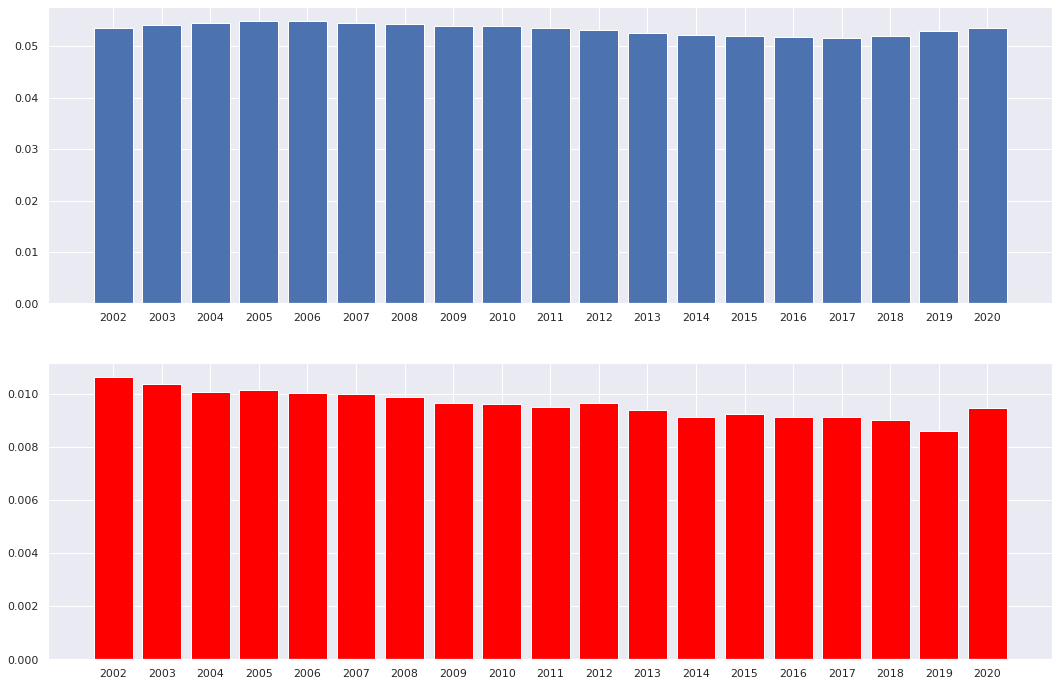

In [1032]:

fig,axes = plt.subplots(2,figsize=(18,12))

axes[0].bar(prop_old_pop.index,prop_old_pop['pop'])
axes[1].bar(no_bins.index,no_bins['mortality'],color='red')

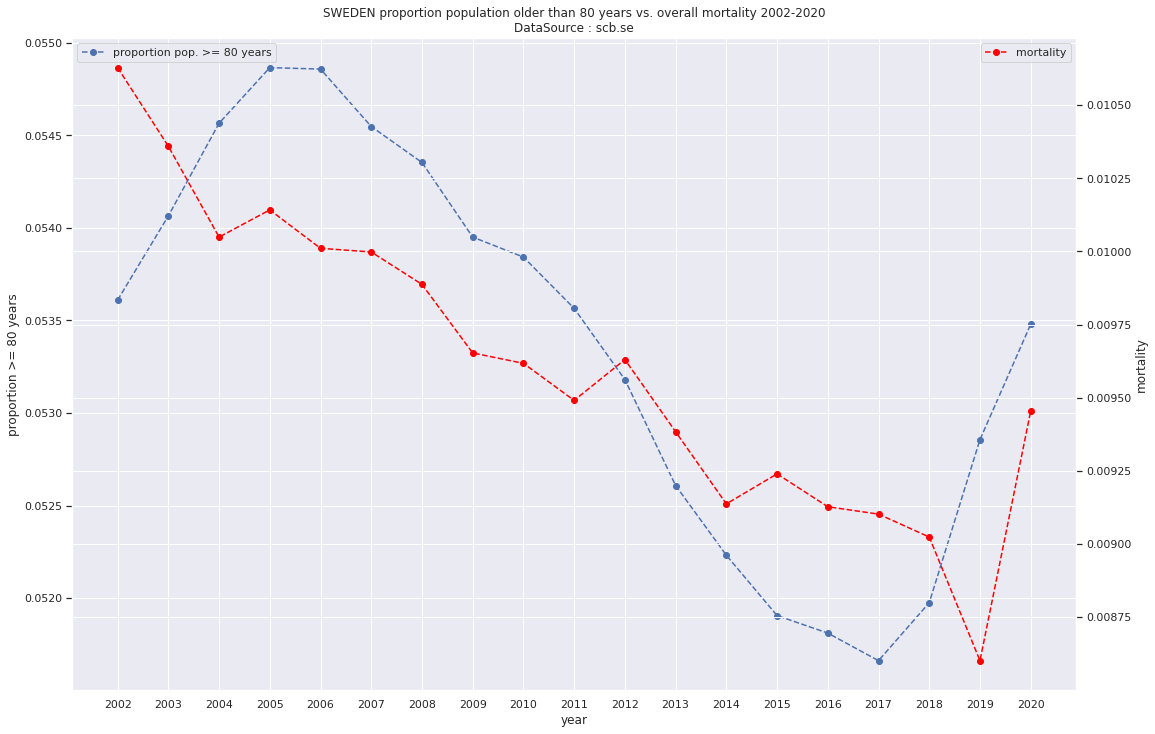

In [1033]:
plt.figure(figsize=(18,12))
title = 'SWEDEN proportion population older than {} years vs. overall mortality 2002-2020\nDataSource : scb.se'.format(
old_lim)

plt.title(title)

ax = plt.gca()
ax2 = plt.twinx()

ax.plot(prop_old_pop['pop'],'o--',label='proportion pop. >= 80 years')
ax2.plot(no_bins['mortality'],'o--',color='red',label='mortality')

ax.legend(loc='upper left')
ax2.legend(loc='upper right')

ax.set_ylabel('proportion >= {} years'.format(old_lim))
ax2.set_ylabel('mortality')

ax.set_xlabel('year')
plt.savefig('scb_excess_prop_old_vs_mort.jpg',format='jpg')

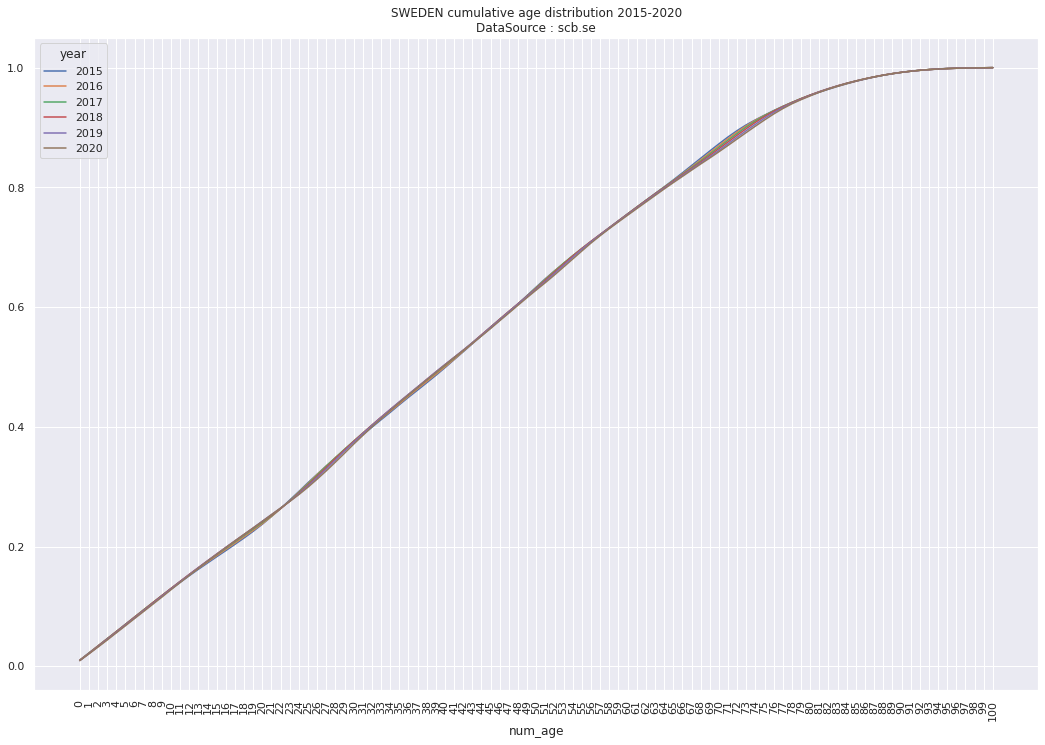

In [1034]:
title = 'SWEDEN cumulative age distribution 2015-2020\nDataSource : scb.se'
age_proportions = pop_age_df.groupby('year').cumsum() / pop_age_df.groupby('year').sum()
ax = age_proportions.unstack().droplevel(level=0,axis=1).loc['2015' : '2020'].T.plot(figsize=(18,12),
                                                                                    title=title)
_=ax.set_xticks(range(101))
_= ax.set_xticklabels(range(101),rotation=90)

<AxesSubplot:xlabel='num_age'>

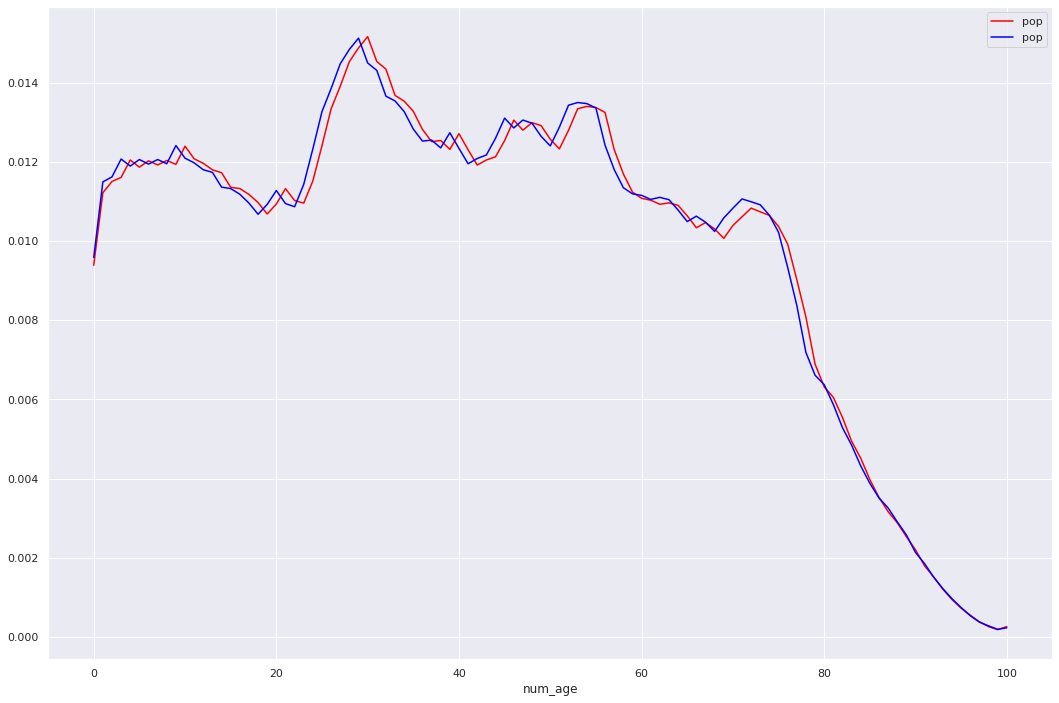

In [1035]:
age_grp_prop_pop = pop_age_df.groupby('year').transform(lambda x : x / x.sum())
ax = age_grp_prop_pop.loc['2020'].plot(color='red',figsize=(18,12))
age_grp_prop_pop.loc['2019'].plot(ax=ax,color='blue')


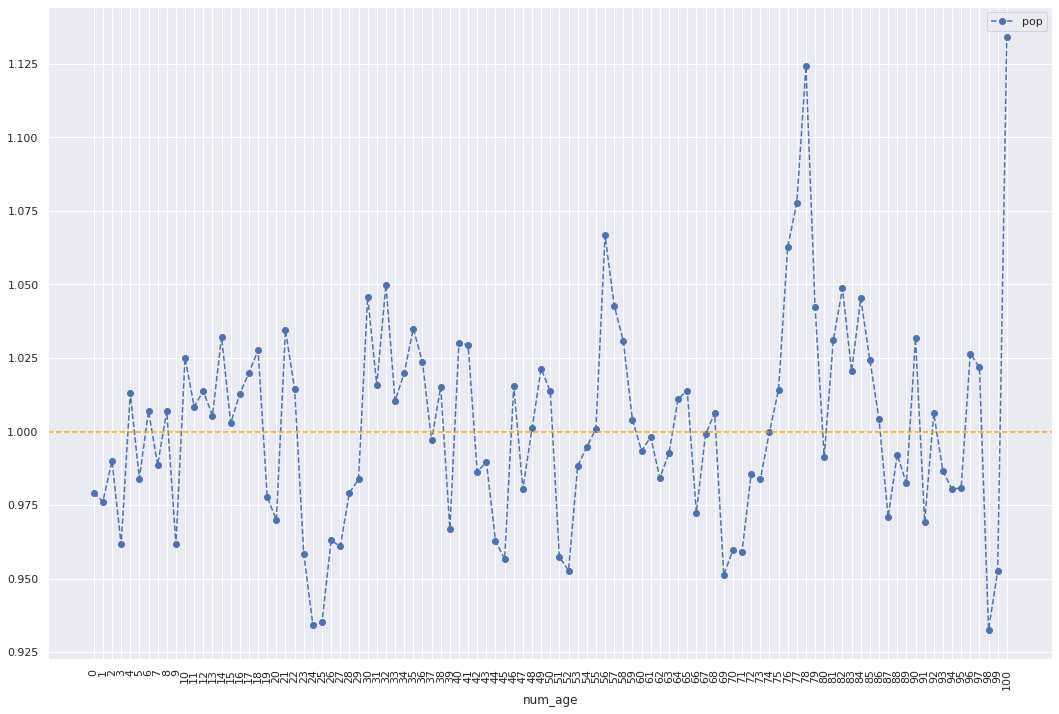

In [1036]:
age_grp_2020_rel_2019 = age_grp_prop_pop.loc['2020'] / age_grp_prop_pop.loc['2019']
ax = age_grp_2020_rel_2019.plot(figsize=(18,12),style='o--')

_= ax.set_xticks(age_grp_2020_rel_2019.index)
_= ax.set_xticklabels(age_grp_2020_rel_2019.index,rotation=90)

ax.axhline(1,ls='dashed',color='orange')

In [1037]:
monthly_mortality.to_pickle('monthly_mort_2015_2021.pkl')

In [1038]:
pop_age_df

pop scb_prel_age_bin 10_y_bin
year num_age                                 
2002 0        82336              -64      0-9
     1        92580              -64      0-9
     2        92138              -64      0-9
     3        90251              -64      0-9
     4        91214              -64      0-9
...             ...              ...      ...
2020 96        5709              90+      90+
     97        3972              90+      90+
     98        2707              90+      90+
     99        1915              90+      90+
     100       2715              90+      90+

[1919 rows x 3 columns]

In [1039]:
pop_age_df_scb_prel = pop_age_df.groupby(['year','scb_prel_age_bin']).sum()
pop_age_df_scb_prel.loc['2020'] / pop_age_df_scb_prel.loc['2019']

pop
scb_prel_age_bin          
-64               1.004030
65-79             1.010576
80-89             1.020445
90+               1.005306

In [1040]:
### days of studying covid ###
pd.date_range('2020-02-13','2021-06-15')

DatetimeIndex(['2020-02-13', '2020-02-14', '2020-02-15', '2020-02-16',
               '2020-02-17', '2020-02-18', '2020-02-19', '2020-02-20',
               '2020-02-21', '2020-02-22',
               ...
               '2021-06-06', '2021-06-07', '2021-06-08', '2021-06-09',
               '2021-06-10', '2021-06-11', '2021-06-12', '2021-06-13',
               '2021-06-14', '2021-06-15'],
              dtype='datetime64[ns]', length=489, freq='D')

In [1041]:
pd.to_datetime('2020-06-01') - MonthEnd(1)

Timestamp('2020-05-31 00:00:00')

In [1042]:
pd.date_range('2019-10','2020-10',freq='M')[0].month_name()

'October'

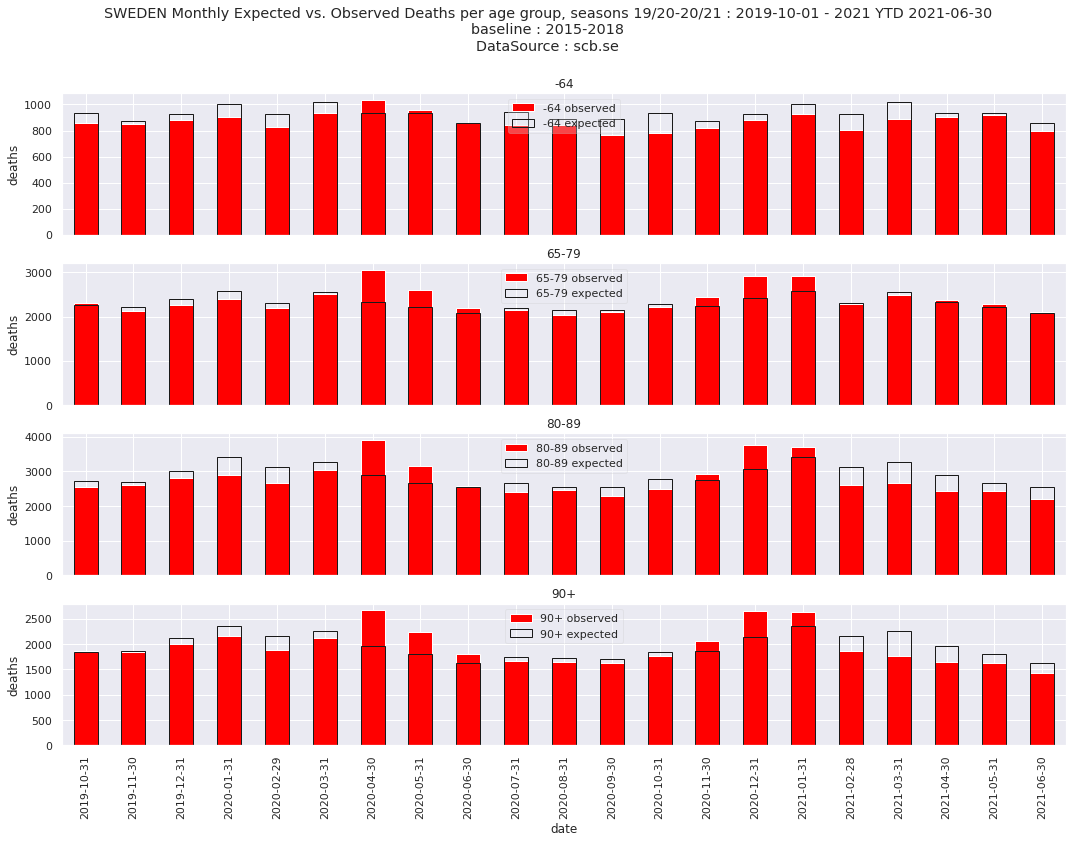

In [1043]:
### All Deaths since first week of Covid deaths 2020-03-15 ###
### or all deaths since season 19/20 started ###

season_pre_pandemic_start = '2019-10'
pandemic_start = '2020-03'

### PARAM ###
start = season_pre_pandemic_start
###       ###

pre_pandemic_title = 'SWEDEN Monthly Expected vs. Observed Deaths per age group, Mar 2020 - {}\nbaseline : 2015-2018\nDataSource : scb.se'.format(
last_good_date.date())

season_title = 'SWEDEN Monthly Expected vs. Observed Deaths per age group, seasons 19/20-20/21 : {} - 2021 YTD {}\nbaseline : 2015-2018\nDataSource : scb.se'.format(
pd.to_datetime(start).date(),last_good_date.date())

if start == pandemic_start:
    title = pre_pandemic_title
else:
    title = season_title
    
covid_period_monthly_expected_deaths = monthly_expected_deaths.loc[start : last_good_date ]
covid_period_monthly_deaths = grp_daily_corrected_monthly.loc[start : last_good_date]

ax = covid_period_monthly_deaths.plot(figsize=(18,12),kind='bar',subplots=True,
                                         color='red',label='expected',sharex=True,title=title)

covid_period_monthly_expected_deaths.plot(ax=ax,kind='bar',subplots=True,facecolor='none',edgecolor='k')
_= ax[-1].set_xticklabels(covid_period_monthly_deaths.index.date)

for i,a in enumerate(ax):
    a.set_ylabel('deaths')
    a.legend([covid_period_monthly_deaths.columns[i] +' observed',
              covid_period_monthly_deaths.columns[i] + ' expected'],framealpha=0.3,loc='upper center')


plt.savefig('scb_excess_' + start + '_expected_vs_excess.jpg',format='jpg' )

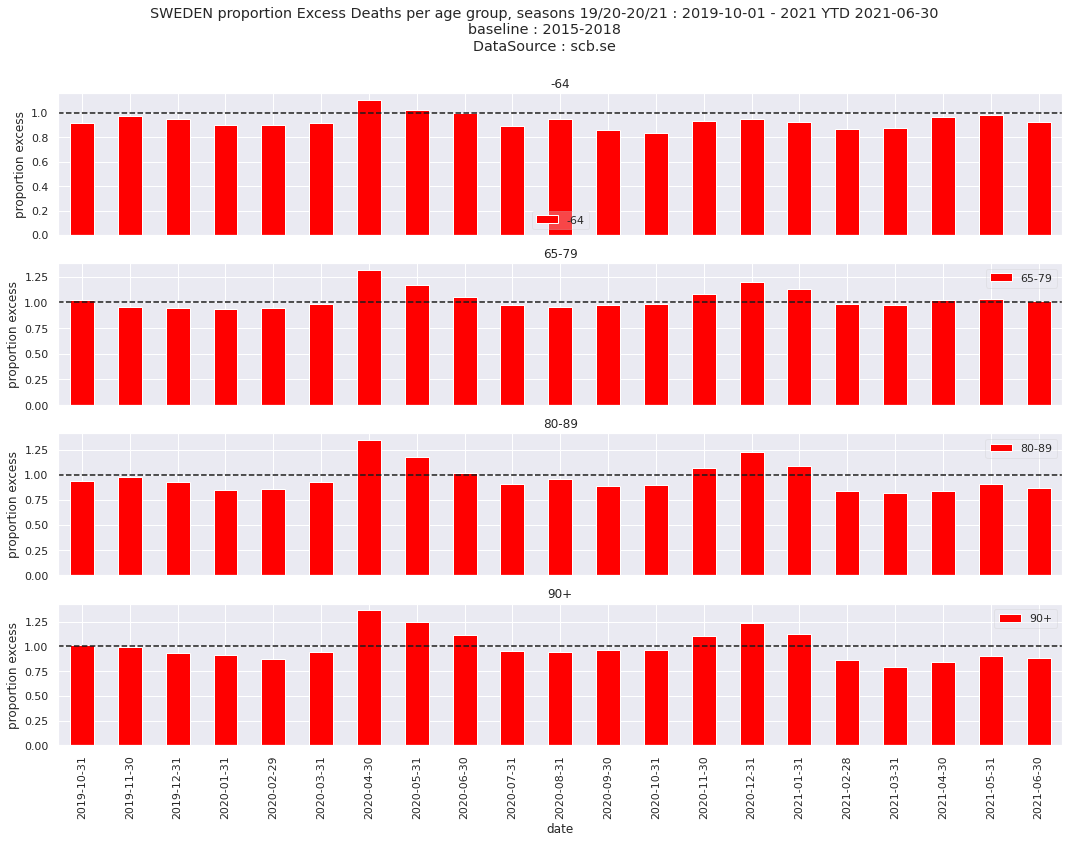

In [1044]:
prop_obs_vs_exp = covid_period_monthly_deaths / covid_period_monthly_expected_deaths

pre_pandemic_title = 'SWEDEN proportion Excess Deaths per age group, Mar 2020 - {}\nbaseline : 2015-2018\nDataSource : scb.se'.format(
last_good_date.date())

season_title = 'SWEDEN proportion Excess Deaths per age group, seasons 19/20-20/21 : {} - 2021 YTD {}\nbaseline : 2015-2018\nDataSource : scb.se'.format(
pd.to_datetime(start).date(),last_good_date.date())

if start == pandemic_start:
    title = pre_pandemic_title
else:
    title = season_title

axes = prop_obs_vs_exp.plot(kind='bar',subplots=True,figsize=(18,12),color='red',title=title)

for a in axes:
    a.axhline(1,color='k',ls='dashed')
    a.set_ylabel('proportion excess')
    a.legend(framealpha=0.3)
    
_=axes[-1].set_xticklabels(prop_obs_vs_exp.index.date)

plt.savefig('scb_excess_proportion' + start + '_expected_vs_excess.jpg',format='jpg' )

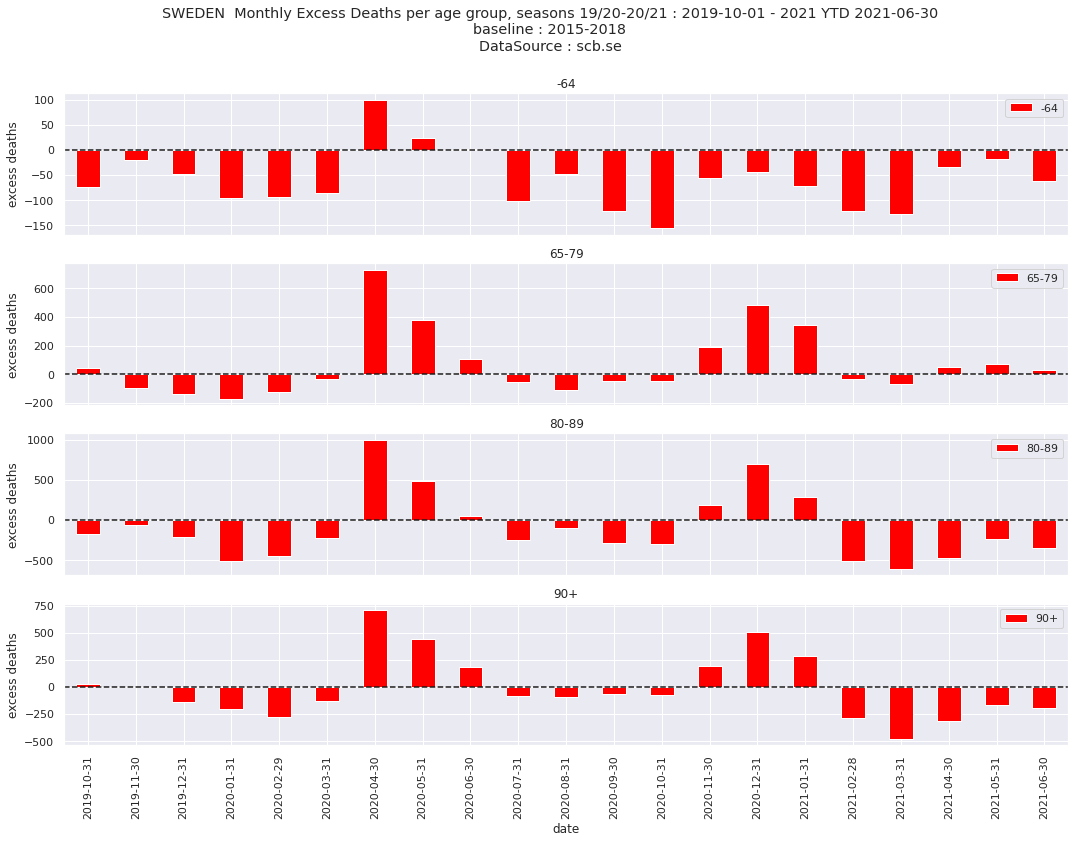

In [1045]:
covid_period_excess = covid_period_monthly_deaths - covid_period_monthly_expected_deaths

pre_pandemic_title = 'SWEDEN Monthly Excess Deaths per age group, Mar 2020 - {}\nbaseline : 2015-2018\nDataSource : scb.se'.format(
last_good_date.date())

season_title = 'SWEDEN  Monthly Excess Deaths per age group, seasons 19/20-20/21 : {} - 2021 YTD {}\nbaseline : 2015-2018\nDataSource : scb.se'.format(
pd.to_datetime(start).date(),last_good_date.date())

if start == pandemic_start:
    title = pre_pandemic_title
else:
    title = season_title

ax = covid_period_excess.plot(figsize=(18,12),kind='bar',subplots=True,sharex=True,color='red',title=title)
_= ax[-1].set_xticklabels(covid_period_excess.index.date)

for a in ax:
    a.set_ylabel('excess deaths')
    a.axhline(0,ls='dashed',color='k')
    
plt.savefig('scb_excess_' + start + '_excess_age_grp.jpg',format='jpg' )

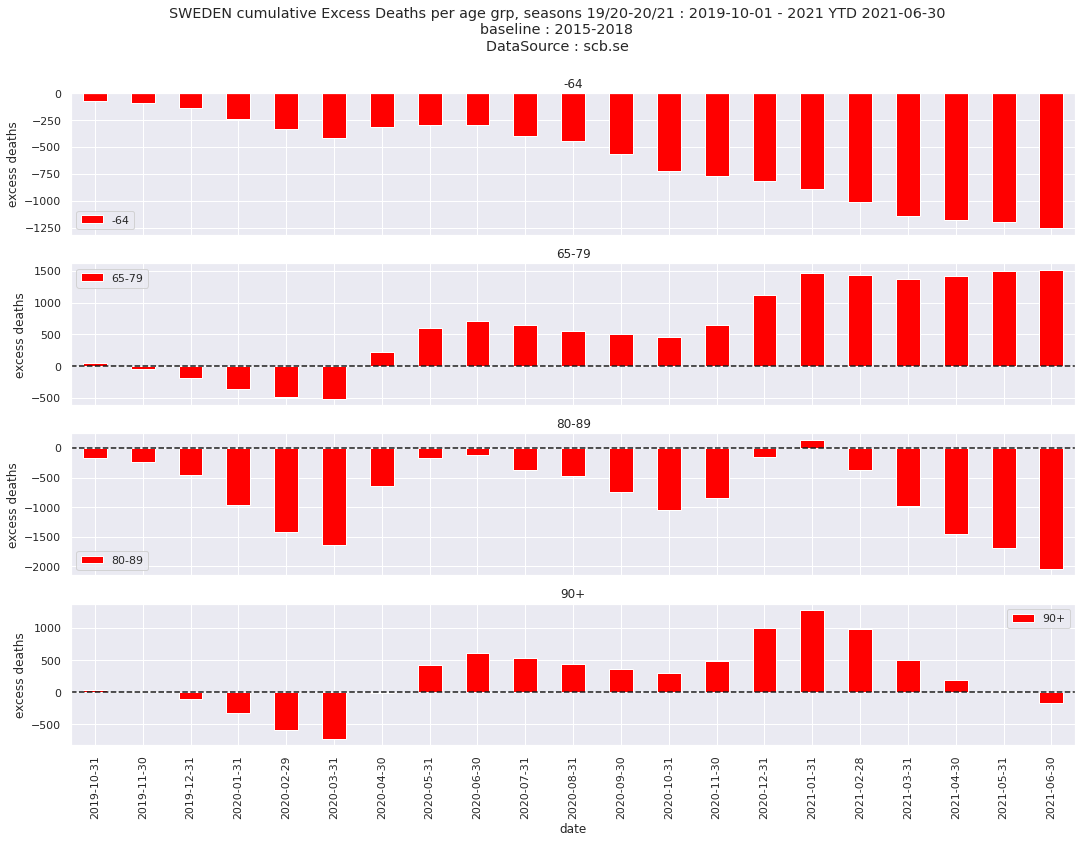

In [1046]:
pre_pandemic_title = 'SWEDEN cumulative Excess Deaths per age grp, Mar 2020 - {}\nbaseline : 2015-2018\nDataSource : scb.se'.format(
last_good_date.date())

season_title = 'SWEDEN cumulative Excess Deaths per age grp, seasons 19/20-20/21 : {} - 2021 YTD {}\nbaseline : 2015-2018\nDataSource : scb.se'.format(
pd.to_datetime(start).date(),last_good_date.date())

if start == pandemic_start:
    title = pre_pandemic_title
else:
    title = season_title


ax = covid_period_excess.cumsum().plot(kind='bar',subplots=True,figsize=(18,12),color='red',title=title)
_= ax[-1].set_xticklabels(covid_period_excess.index.date)

for a in ax:
    a.set_ylabel('excess deaths')
    a.axhline(0,ls='dashed',color='k')
    
    
plt.savefig('scb_excess_' + start + '_cum_excess_grp.jpg',format='jpg' )

In [1047]:
covid_period_monthly_excess = covid_period_excess.sum(axis=1)
covid_period_monthly_excess

date
2019-10-31    -175.028398
2019-11-30    -182.994689
2019-12-31    -534.050593
2020-01-31    -986.463500
2020-02-29    -939.350973
2020-03-31    -481.246287
2020-04-30    2536.353998
2020-05-31    1327.484384
2020-06-30     349.352545
2020-07-31    -499.813528
2020-08-31    -343.116089
2020-09-30    -516.997669
2020-10-31    -569.290120
2020-11-30     516.560459
2020-12-31    1645.982176
2021-01-31     841.996587
2021-02-28    -959.564336
2021-03-31   -1283.341442
2021-04-30    -771.875430
2021-05-31    -355.153478
2021-06-30    -567.044062
Freq: M, dtype: float64

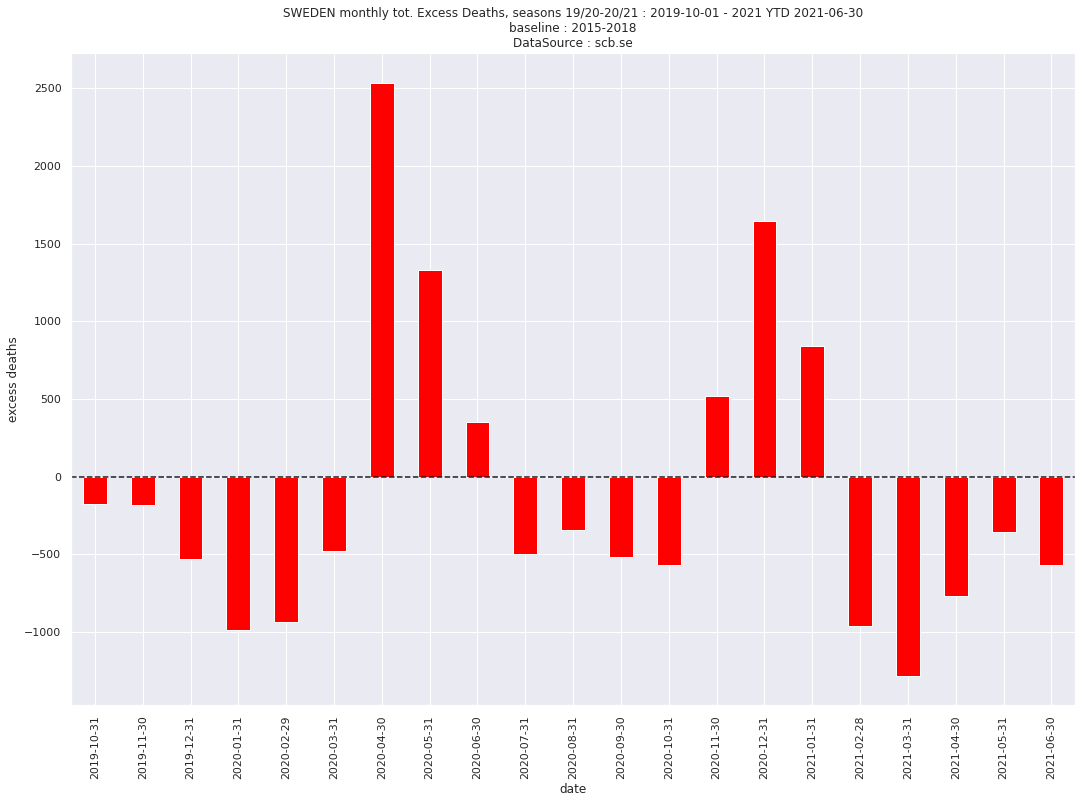

In [1048]:
pre_pandemic_title = 'SWEDEN monthly tot. Excess Deaths, Mar 2020 - {}\nbaseline : 2015-2018\nDataSource : scb.se'.format(
last_good_date.date())

season_title = 'SWEDEN monthly tot. Excess Deaths, seasons 19/20-20/21 : {} - 2021 YTD {}\nbaseline : 2015-2018\nDataSource : scb.se'.format(
pd.to_datetime(start).date(),last_good_date.date())

if start == pandemic_start:
    title = pre_pandemic_title
else:
    title = season_title

ax = covid_period_monthly_excess.plot(figsize=(18,12),kind='bar',color='red',title=title)
_= ax.set_xticklabels(covid_period_monthly_excess.index.date)

ax.set_ylabel('excess deaths')
ax.axhline(0,ls='dashed',color='k')

plt.savefig('scb_excess_' + start + '_total_excess_monthly.jpg',format='jpg' )

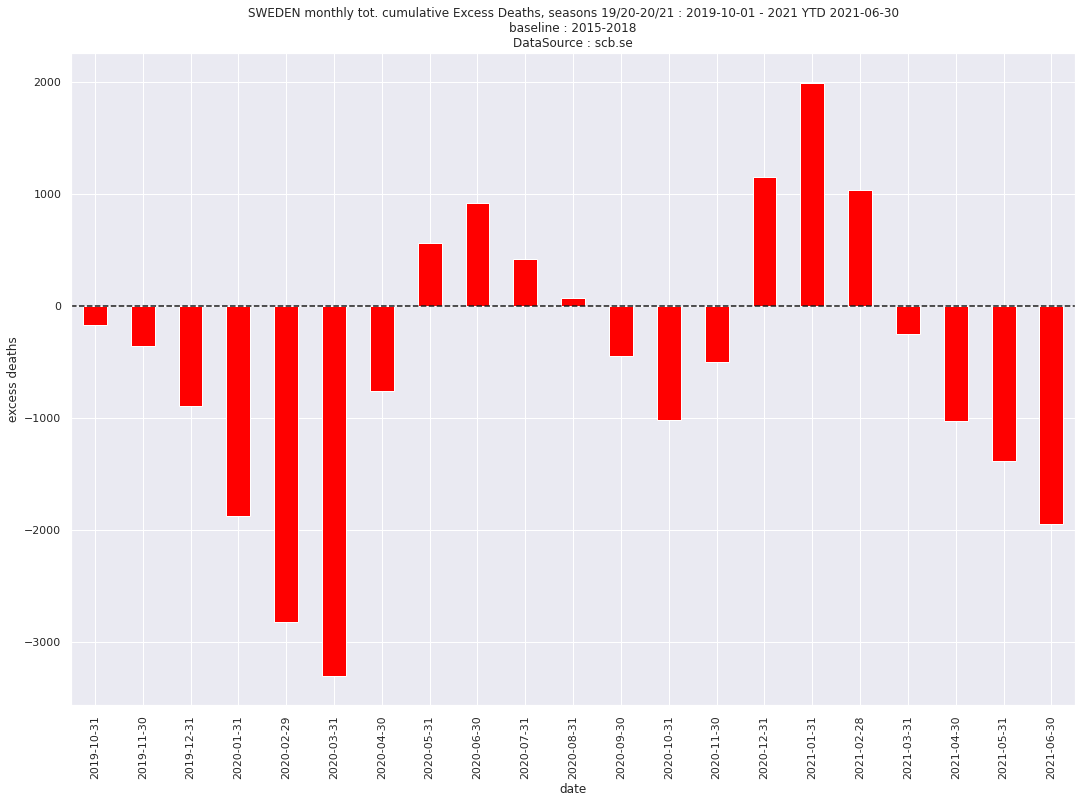

In [1049]:
covid_period_cum_excess = covid_period_excess.sum(axis=1).cumsum()

pre_pandemic_title = 'SWEDEN monthly tot. cumulative Excess Deaths, Mar 2020 - {}\nbaseline : 2015-2018\nDataSource : scb.se'.format(
last_good_date.date())

season_title = 'SWEDEN monthly tot. cumulative Excess Deaths, seasons 19/20-20/21 : {} - 2021 YTD {}\nbaseline : 2015-2018\nDataSource : scb.se'.format(
pd.to_datetime(start).date(),last_good_date.date())

if start == pandemic_start:
    title = pre_pandemic_title
else:
    title = season_title

ax = covid_period_cum_excess.plot(kind='bar',figsize=(18,12),color='red',title=title)
_= ax.set_xticklabels(covid_period_cum_excess.index.date)

ax.set_ylabel('excess deaths')
ax.axhline(0,ls='dashed',color='k')

plt.savefig('scb_excess_' + start + '_tot_cum_excess.jpg',format='jpg' )


In [1050]:

def func(*args,**kwargs):
    print ('args : ',args)
    print ('kwargs : ', kwargs)
    

func(1,2,a=3,b=4,c=5)

args :  (1, 2)
kwargs :  {'a': 3, 'b': 4, 'c': 5}


In [1051]:
monthly_excess.loc['2020':].sum(axis=1).cumsum()

2020-01-31    -986.463500
2020-02-29   -2172.526025
2020-03-31   -2625.611755
2020-04-30     -63.079418
2020-05-31    1276.382159
2020-06-30    1622.691225
2020-07-31    1112.420511
2020-08-31     767.917780
2020-09-30     265.261926
2020-10-31    -319.973320
2020-11-30     183.735548
2020-12-31    1805.983277
2021-01-31    2647.979865
2021-02-28    1754.116515
2021-03-31     498.935630
2021-04-30    -246.761461
2021-05-31    -589.937746
2021-06-30   -1160.025288
2021-07-31   -2620.526877
Freq: M, dtype: float64

In [1052]:
monthly_excess.loc['2019-10':].sum(axis=1).cumsum()

2019-10-31    -190.708228
2019-11-30    -386.424147
2019-12-31    -943.926564
2020-01-31   -1930.390065
2020-02-29   -3116.452589
2020-03-31   -3569.538320
2020-04-30   -1007.005982
2020-05-31     332.455595
2020-06-30     678.764660
2020-07-31     168.493946
2020-08-31    -176.008784
2020-09-30    -678.664638
2020-10-31   -1263.899885
2020-11-30    -760.191017
2020-12-31     862.056713
2021-01-31    1704.053300
2021-02-28     810.189951
2021-03-31    -444.990935
2021-04-30   -1190.688026
2021-05-31   -1533.864310
2021-06-30   -2103.951853
2021-07-31   -3564.453442
Freq: M, dtype: float64

In [1053]:
dead_df.loc['2020'] / dead_df.loc['2015' : '2019'].mean()

dead    1.078731
dtype: float64